In [1]:
import git

In [2]:
# !git clone https://github.com/PhonePe/pulse.git

In [3]:
import os
import json as js
import pandas as pd


## Aggregated_transaction_DataFrame

In [5]:
Agg_Trans_path="C:/Users/lap/Jupiter Notebook/pulse/data/aggregated/transaction/country/india/state/"
Agg_state_list=os.listdir(Agg_Trans_path)

Aggregated_transaction = {"State":[],"Year":[],"Quarter":[],"Transaction_type":[],"Transaction_count":[],"Transaction_amount":[]}

for i in Agg_state_list:
    p_i = Agg_Trans_path+i+"/"
    Agg_yr=os.listdir(p_i)
    for j in Agg_yr:
        p_j=p_i+j+"/"
        Agg_yr_list=os.listdir(p_j)
        for k in Agg_yr_list:
            p_k=p_j+k
            Data=open(p_k,"r")
            D=js.load(Data)
            transaction_Data = D.get("data",{}).get("transactionData",[])
            if not transaction_Data:
                Aggregated_transaction["Transaction_type"].append(None)
                Aggregated_transaction["Transaction_count"].append(None)
                Aggregated_transaction["Transaction_amount"].append(None)
                Aggregated_transaction["State"].append(i)
                Aggregated_transaction["Year"].append(j)
                Aggregated_transaction["Quarter"].append(int(k.strip('.json')))
                
            else:
                for z in transaction_Data:
                    try:
                        Name=z["name"]
                        count=z["paymentInstruments"][0]["count"]
                        amount=z["paymentInstruments"][0]["amount"]
                        Aggregated_transaction["Transaction_type"].append(Name)
                        Aggregated_transaction["Transaction_count"].append(count)
                        Aggregated_transaction["Transaction_amount"].append(amount)
                        Aggregated_transaction["State"].append(i)
                        Aggregated_transaction["Year"].append(j)
                        Aggregated_transaction["Quarter"].append(int(k.strip(".json")))
                    except Exception as e:
                        print(f"Error processing entry: {e}") 
                        
Agg_Trans = pd.DataFrame(Aggregated_transaction)
            

In [6]:
Agg_Trans

State  Year  Quarter          Transaction_type  \
0     andaman-&-nicobar-islands  2018        1  Recharge & bill payments   
1     andaman-&-nicobar-islands  2018        1     Peer-to-peer payments   
2     andaman-&-nicobar-islands  2018        1         Merchant payments   
3     andaman-&-nicobar-islands  2018        1        Financial Services   
4     andaman-&-nicobar-islands  2018        1                    Others   
...                         ...   ...      ...                       ...   
5029                west-bengal  2024        4         Merchant payments   
5030                west-bengal  2024        4     Peer-to-peer payments   
5031                west-bengal  2024        4  Recharge & bill payments   
5032                west-bengal  2024        4        Financial Services   
5033                west-bengal  2024        4                    Others   

      Transaction_count  Transaction_amount  
0                  4200        1.845307e+06  
1                  1871        1.213866e+07  
2                   298        4.525072e+05  
3                    33        1.060142e+04  
4                   256        1.846899e+05  
...                 ...                 ...  
5029          655100809        3.892862e+11  
5030          493217788        1.361927e+12  
5031           76043195        5.753406e+10  
5032            2352084        8.472965e+08  
5033             421806        5.053641e+08  

[5034 rows x 6 columns]

## Aggregated_User_DataFrame

In [8]:
Agg_User_path="C:/Users/lap/Jupiter Notebook/pulse/data/aggregated/user/country/india/state/"
Agg_state_list=os.listdir(Agg_User_path)

Aggregated_User = {"State":[],"Year":[],"Quarter":[],"Brand":[],"User_Count":[],"Percentage":[]}

for i in Agg_state_list:
    p_i=Agg_User_path+i+"/"
    Agg_yr = os.listdir(p_i)
    for j in Agg_yr:
        p_j=p_i+j+"/"
        Agg_yr_list=os.listdir(p_j)
        for k in Agg_yr_list:
            p_k=p_j+k
            Data=open(p_k,"r")
            D=js.load(Data)
            users_by_device = D.get("data",{}).get("usersByDevice",[])
            if not users_by_device:
                Aggregated_User["Brand"].append(None)
                Aggregated_User["User_Count"].append(None)
                Aggregated_User["Percentage"].append(None)
                Aggregated_User["State"].append(i)
                Aggregated_User["Year"].append(j)
                Aggregated_User["Quarter"].append(int(k.strip('.json')))
                
            else:
                for z in users_by_device:
                    try:  
                        Brand=z.get('brand')
                        User_Count=z.get('count')
                        Percentage=z.get('percentage')
                        Aggregated_User["Brand"].append(Brand)
                        Aggregated_User["User_Count"].append(User_Count)
                        Aggregated_User["Percentage"].append(Percentage)
                        Aggregated_User["State"].append(i)
                        Aggregated_User["Year"].append(j)
                        Aggregated_User["Quarter"].append(int(k.strip('.json')))
                    except Exception as e:
                        print(f"Error processing entry: {e}") 
                    
                    
Agg_User=pd.DataFrame(Aggregated_User)

In [9]:
Agg_User

State  Year  Quarter    Brand  User_Count  \
0     andaman-&-nicobar-islands  2018        1   Xiaomi      1665.0   
1     andaman-&-nicobar-islands  2018        1  Samsung      1445.0   
2     andaman-&-nicobar-islands  2018        1     Vivo       982.0   
3     andaman-&-nicobar-islands  2018        1     Oppo       501.0   
4     andaman-&-nicobar-islands  2018        1  OnePlus       332.0   
...                         ...   ...      ...      ...         ...   
7123                west-bengal  2023        4     None         NaN   
7124                west-bengal  2024        1     None         NaN   
7125                west-bengal  2024        2     None         NaN   
7126                west-bengal  2024        3     None         NaN   
7127                west-bengal  2024        4     None         NaN   

      Percentage  
0       0.247033  
1       0.214392  
2       0.145697  
3       0.074332  
4       0.049258  
...          ...  
7123         NaN  
7124         NaN  
7125         NaN  
7126         NaN  
7127         NaN  

[7128 rows x 6 columns]

## Aggregated_insurance_DataFrame

In [11]:
Agg_ins_path="C:/Users/lap/Jupiter Notebook/pulse/data/aggregated/insurance/country/india/state/"
Agg_state_list=os.listdir(Agg_ins_path)

Aggregated_Insurance = {"State":[],"Year":[],"Quarter":[],"Name":[],"Insurance_Count":[],"Insurance_Amount":[]}

for i in Agg_state_list:
    p_i=Agg_ins_path+i+"/"
    Agg_yr = os.listdir(p_i)
    for j in Agg_yr:
        p_j=p_i+j+"/"
        Agg_yr_list=os.listdir(p_j)
        for k in Agg_yr_list:
            p_k=p_j+k
            Data=open(p_k,"r")
            D=js.load(Data)
            transaction_Data = D.get("data",{}).get("transactionData",[])
            if not transaction_Data:
                Aggregated_Insurance["Name"].append(None)
                Aggregated_Insurance["Insurance_Count"].append(None)
                Aggregated_Insurance["Insurance_Amount"].append(None)
                Aggregated_Insurance["State"].append(i)
                Aggregated_Insurance["Year"].append(j)
                Aggregated_Insurance["Quarter"].append(int(k.strip('.json')))
                
            else:
                for z in transaction_Data:
                    try:  
                        Name=z['name']
                        Insurance_Count=z['paymentInstruments'][0]["count"]
                        Insurance_Amount=z['paymentInstruments'][0]["amount"]
                        Aggregated_Insurance["Name"].append(Name)
                        Aggregated_Insurance["Insurance_Count"].append(Insurance_Count)
                        Aggregated_Insurance["Insurance_Amount"].append(Insurance_Amount)
                        Aggregated_Insurance["State"].append(i)
                        Aggregated_Insurance["Year"].append(j)
                        Aggregated_Insurance["Quarter"].append(int(k.strip('.json')))
                    except Exception as e:
                        print(f"Error processing entry: {e}") 
                    
                    
Agg_Insurance=pd.DataFrame(Aggregated_Insurance)

In [12]:
Agg_Insurance

State  Year  Quarter       Name  Insurance_Count  \
0    andaman-&-nicobar-islands  2020        2  Insurance              6.0   
1    andaman-&-nicobar-islands  2020        3  Insurance             41.0   
2    andaman-&-nicobar-islands  2020        4  Insurance            124.0   
3    andaman-&-nicobar-islands  2021        1  Insurance            225.0   
4    andaman-&-nicobar-islands  2021        2  Insurance            137.0   
..                         ...   ...      ...        ...              ...   
679                west-bengal  2023        4  Insurance          72712.0   
680                west-bengal  2024        1  Insurance          79576.0   
681                west-bengal  2024        2  Insurance          67048.0   
682                west-bengal  2024        3  Insurance          77158.0   
683                west-bengal  2024        4  Insurance          91719.0   

     Insurance_Amount  
0              1360.0  
1             15380.0  
2            157975.0  
3            244266.0  
4            181504.0  
..                ...  
679       100365562.0  
680       104987909.0  
681        89476633.0  
682       107451766.0  
683       120602777.0  

[684 rows x 6 columns]

## Map_Transaction_DataFrame

In [14]:
Map_Trans_path="C:/Users/lap/Jupiter Notebook/pulse/data/map/transaction/hover/country/india/state/"
Map_state_list=os.listdir(Map_Trans_path)

Map_transaction = {"State":[],"Year":[],"Quarter":[],"Transaction_District":[],"Transaction_count":[],"Transaction_amount":[]}

for i in Map_state_list:
    p_i = Map_Trans_path+i+"/"
    Map_yr=os.listdir(p_i)
    for j in Map_yr:
        p_j=p_i+j+"/"
        Map_yr_list=os.listdir(p_j)
        for k in Map_yr_list:
            p_k=p_j+k
            Data=open(p_k,"r")
            D=js.load(Data)
            hover_Data_List = D.get("data",{}).get("hoverDataList",[])
            if not hover_Data_List:
                Map_transaction["Transaction_type"].append(None)
                Map_transaction["Transaction_count"].append(None)
                Map_transaction["Transaction_amount"].append(None)
                Map_transaction["State"].append(i)
                Map_transaction["Year"].append(j)
                Map_transaction["Quarter"].append(int(k.strip('.json')))
                
            else:
                for z in hover_Data_List:
                    try:
                        Name=z["name"]
                        count=z["metric"][0]["count"]
                        amount=z["metric"][0]["amount"]
                        Map_transaction["Transaction_District"].append(Name)
                        Map_transaction["Transaction_count"].append(count)
                        Map_transaction["Transaction_amount"].append(amount)
                        Map_transaction["State"].append(i)
                        Map_transaction["Year"].append(j)
                        Map_transaction["Quarter"].append(int(k.strip(".json")))
                    except Exception as e:
                        print(f"Error processing entry: {e}") 
                        
Map_Trans = pd.DataFrame(Map_transaction)
            

In [15]:
Map_Trans

State  Year  Quarter  \
0      andaman-&-nicobar-islands  2018        1   
1      andaman-&-nicobar-islands  2018        1   
2      andaman-&-nicobar-islands  2018        1   
3      andaman-&-nicobar-islands  2018        2   
4      andaman-&-nicobar-islands  2018        2   
...                          ...   ...      ...   
20599                west-bengal  2024        4   
20600                west-bengal  2024        4   
20601                west-bengal  2024        4   
20602                west-bengal  2024        4   
20603                west-bengal  2024        4   

                    Transaction_District  Transaction_count  \
0      north and middle andaman district                442   
1                 south andaman district               5688   
2                      nicobars district                528   
3      north and middle andaman district                825   
4                 south andaman district               9395   
...                                  ...                ...   
20599                alipurduar district           15875637   
20600         paschim bardhaman district           56616799   
20601                     nadia district           65274337   
20602                   birbhum district           36905213   
20603           purba medinipur district           67833775   

       Transaction_amount  
0            9.316631e+05  
1            1.256025e+07  
2            1.139849e+06  
3            1.317863e+06  
4            2.394824e+07  
...                   ...  
20599        2.099251e+10  
20600        6.968735e+10  
20601        1.079320e+11  
20602        5.778701e+10  
20603        1.142771e+11  

[20604 rows x 6 columns]

## Map_User_DataFrame

In [17]:
Map_User_path="C:/Users/lap/Jupiter Notebook/pulse/data/map/user/hover/country/india/state/"
Map_state_list=os.listdir(Map_Trans_path)

Map_User = {"State":[],"Year":[],"Quarter":[],"District":[],"registeredUsers":[]}

for i in Map_state_list:
    p_i=Map_User_path+i+"/"
    Map_yr = os.listdir(p_i)
    for j in Map_yr:
        p_j=p_i+j+"/"
        Map_yr_list=os.listdir(p_j)
        for k in Map_yr_list:
            p_k=p_j+k
            Data=open(p_k,"r")
            D=js.load(Data)
            hover_Data = D.get("data",{}).get("hoverData",[])
            # print(hover_Data)
            if not hover_Data:
                Map_User["District"].append(None)
                Map_User["registeredUsers"].append(None)
                Map_User["State"].append(i)
                Map_User["Year"].append(j)
                Map_User["Quarter"].append(int(k.strip('.json')))
                
            else:
                for district,details in hover_Data.items():
                    try:  
                        registeredUsers=details.get('registeredUsers',0)
                        Map_User["District"].append(district)
                        Map_User["registeredUsers"].append(registeredUsers)
                        Map_User["State"].append(i)
                        Map_User["Year"].append(j)
                        Map_User["Quarter"].append(int(k.strip('.json')))
                    except Exception as e:
                        print(f"Error processing entry: {e}") 
                    
                    
map_User=pd.DataFrame(Map_User)

In [18]:
map_User

State  Year  Quarter  \
0      andaman-&-nicobar-islands  2018        1   
1      andaman-&-nicobar-islands  2018        1   
2      andaman-&-nicobar-islands  2018        1   
3      andaman-&-nicobar-islands  2018        2   
4      andaman-&-nicobar-islands  2018        2   
...                          ...   ...      ...   
20603                west-bengal  2024        4   
20604                west-bengal  2024        4   
20605                west-bengal  2024        4   
20606                west-bengal  2024        4   
20607                west-bengal  2024        4   

                                District  registeredUsers  
0      north and middle andaman district              632  
1                 south andaman district             5846  
2                      nicobars district              262  
3      north and middle andaman district              911  
4                 south andaman district             8143  
...                                  ...              ...  
20603                alipurduar district           475688  
20604         paschim bardhaman district          1468252  
20605                     nadia district          1861738  
20606                   birbhum district          1114220  
20607           purba medinipur district          1717074  

[20608 rows x 5 columns]

## Map_insurance_DataFrame

In [20]:
map_ins_path="C:/Users/lap/Jupiter Notebook/pulse/data/map/insurance/hover/country/india/state/"
map_state_list=os.listdir(map_ins_path)

Map_Insurance = {"State":[],"Year":[],"Quarter":[],"District":[],"Insurance_Count":[],"Insurance_Amount":[]}

for i in map_state_list:
    p_i=map_ins_path+i+"/"
    map_yr = os.listdir(p_i)
    for j in map_yr:
        p_j=p_i+j+"/"
        map_yr_list=os.listdir(p_j)
        for k in map_yr_list:
            p_k=p_j+k
            Data=open(p_k,"r")
            D=js.load(Data)
            hover_Data_List = D.get("data",{}).get("hoverDataList",[])
            if not hover_Data_List:
                Map_Insurance["District"].append(None)
                Map_Insurance["Insurance_Count"].append(None)
                Map_Insurance["Insurance_Amount"].append(None)
                Map_Insurance["State"].append(i)
                Map_Insurance["Year"].append(j)
                Map_Insurance["Quarter"].append(int(k.strip('.json')))
                
            else:
                for z in hover_Data_List:
                    try:  
                        District=z['name']
                        Insruance_Count=z['metric'][0]["count"]
                        Insruance_Amount=z['metric'][0]["amount"]
                        Map_Insurance["District"].append(District)
                        Map_Insurance["Insurance_Count"].append(Insurance_Count)
                        Map_Insurance["Insurance_Amount"].append(Insurance_Amount)
                        Map_Insurance["State"].append(i)
                        Map_Insurance["Year"].append(j)
                        Map_Insurance["Quarter"].append(int(k.strip('.json')))
                    except Exception as e:
                        print(f"Error processing entry: {e}") 
                    
                    
map_Insurance=pd.DataFrame(Map_Insurance)

In [21]:
map_Insurance

State  Year  Quarter  \
0      andaman-&-nicobar-islands  2020        2   
1      andaman-&-nicobar-islands  2020        2   
2      andaman-&-nicobar-islands  2020        3   
3      andaman-&-nicobar-islands  2020        3   
4      andaman-&-nicobar-islands  2020        3   
...                          ...   ...      ...   
13873                west-bengal  2024        4   
13874                west-bengal  2024        4   
13875                west-bengal  2024        4   
13876                west-bengal  2024        4   
13877                west-bengal  2024        4   

                                District  Insurance_Count  Insurance_Amount  
0                 south andaman district          91719.0       120602777.0  
1                      nicobars district          91719.0       120602777.0  
2      north and middle andaman district          91719.0       120602777.0  
3                 south andaman district          91719.0       120602777.0  
4                      nicobars district          91719.0       120602777.0  
...                                  ...              ...               ...  
13873                alipurduar district          91719.0       120602777.0  
13874         paschim bardhaman district          91719.0       120602777.0  
13875                     nadia district          91719.0       120602777.0  
13876                   birbhum district          91719.0       120602777.0  
13877           purba medinipur district          91719.0       120602777.0  

[13878 rows x 6 columns]

## Top_pincode_transaction_DataFrame

In [23]:
Top_Trans_path="C:/Users/lap/Jupiter Notebook/pulse/data/top/transaction/country/india/state/"
Top_state_list=os.listdir(Top_Trans_path)

Top_transaction = {"State":[],"Year":[],"Quarter":[],"Pincode":[],"Transaction_count":[],"Transaction_amount":[]}

for i in Top_state_list:
    p_i = Top_Trans_path+i+"/"
    Top_yr=os.listdir(p_i)
    for j in Top_yr:
        p_j=p_i+j+"/"
        Top_yr_list=os.listdir(p_j)
        for k in Top_yr_list:
            p_k=p_j+k
            Data=open(p_k,"r")
            D=js.load(Data)                    
            pincode_Data = D.get("data",{}).get("pincodes",[])
            if not pincode_Data:
                Top_transaction["Pincode"].append(None)
                Top_transaction["Transaction_count"].append(None)
                Top_transaction["Transaction_amount"].append(None)
                Top_transaction["State"].append(i)
                Top_transaction["Year"].append(j)
                Top_transaction["Quarter"].append(int(k.strip('.json')))
                
            else:
                for z in pincode_Data:
                    # print(z)
                    try:
                        Pincode=z["entityName"]
                        count=z.get("metric").get("count")
                        amount=z.get("metric").get("amount")
                        Top_transaction["Pincode"].append(Pincode)
                        Top_transaction["Transaction_count"].append(count)
                        Top_transaction["Transaction_amount"].append(int(amount))
                        Top_transaction["State"].append(i)
                        Top_transaction["Year"].append(j)
                        Top_transaction["Quarter"].append(int(k.strip(".json")))
                    except Exception as e:
                        print(f"Error processing entry: {e}") 
                        
top_pincode_Trans = pd.DataFrame(Top_transaction)
            

In [24]:
top_pincode_Trans

State  Year  Quarter Pincode  Transaction_count  \
0     andaman-&-nicobar-islands  2018        1  744101               1622   
1     andaman-&-nicobar-islands  2018        1  744103               1223   
2     andaman-&-nicobar-islands  2018        1  744102                969   
3     andaman-&-nicobar-islands  2018        1  744105                685   
4     andaman-&-nicobar-islands  2018        1  744104                340   
...                         ...   ...      ...     ...                ...   
9994                west-bengal  2024        4  711101            6753348   
9995                west-bengal  2024        4  700059            6662715   
9996                west-bengal  2024        4  700039            6575693   
9997                west-bengal  2024        4  734001            6432082   
9998                west-bengal  2024        4  733134            6313560   

      Transaction_amount  
0                2769297  
1                2238041  
2                3519059  
3                1298560  
4                1039715  
...                  ...  
9994         10494826024  
9995          8009476497  
9996          9018748395  
9997          8996529284  
9998         10502594688  

[9999 rows x 6 columns]

## Top_District_transaction_DataFrame

In [26]:
Top_Trans_path="C:/Users/lap/Jupiter Notebook/pulse/data/top/transaction/country/india/state/"
Top_state_list=os.listdir(Top_Trans_path)

Top_transaction = {"State":[],"Year":[],"Quarter":[],"District":[],"Transaction_count":[],"Transaction_amount":[]}

for i in Top_state_list:
    p_i = Top_Trans_path+i+"/"
    Top_yr=os.listdir(p_i)
    for j in Top_yr:
        p_j=p_i+j+"/"
        Top_yr_list=os.listdir(p_j)
        for k in Top_yr_list:
            p_k=p_j+k
            Data=open(p_k,"r")
            D=js.load(Data)
            district_Data = D.get("data",{}).get("districts",[])
            if not district_Data:
                Top_transaction["District"].append(None)
                Top_transaction["Transaction_count"].append(None)
                Top_transaction["Transaction_amount"].append(None)
                Top_transaction["State"].append(i)
                Top_transaction["Year"].append(j)
                Top_transaction["Quarter"].append(int(k.strip('.json')))
                
            else:
                for z in district_Data:
                    try:
                        District=z["entityName"]
                        count=z.get("metric").get("count")
                        amount=z.get("metric").get("amount")
                        Top_transaction["District"].append(District)
                        Top_transaction["Transaction_count"].append(count)
                        Top_transaction["Transaction_amount"].append(amount)
                        Top_transaction["State"].append(i)
                        Top_transaction["Year"].append(j)
                        Top_transaction["Quarter"].append(int(k.strip(".json")))
                    except Exception as e:
                        print(f"Error processing entry: {e}") 

top_district_Trans = pd.DataFrame(Top_transaction)

In [27]:
top_district_Trans

State  Year  Quarter                  District  \
0     andaman-&-nicobar-islands  2018        1             south andaman   
1     andaman-&-nicobar-islands  2018        1                  nicobars   
2     andaman-&-nicobar-islands  2018        1  north and middle andaman   
3     andaman-&-nicobar-islands  2018        2             south andaman   
4     andaman-&-nicobar-islands  2018        2                  nicobars   
...                         ...   ...      ...                       ...   
8291                west-bengal  2024        4                    howrah   
8292                west-bengal  2024        4                     nadia   
8293                west-bengal  2024        4                     malda   
8294                west-bengal  2024        4                   hooghly   
8295                west-bengal  2024        4         paschim medinipur   

      Transaction_count  Transaction_amount  
0                  5688        1.256025e+07  
1                   528        1.139849e+06  
2                   442        9.316631e+05  
3                  9395        2.394824e+07  
4                  1120        3.072437e+06  
...                 ...                 ...  
8291           67496284        1.025764e+11  
8292           65274337        1.079320e+11  
8293           63424613        1.024212e+11  
8294           59676576        9.071383e+10  
8295           58238212        8.431774e+10  

[8296 rows x 6 columns]

## Top_pincode_user_DataFrame

In [29]:
Top_user_path="C:/Users/lap/Jupiter Notebook/pulse/data/top/user/country/india/state/"
Top_state_list=os.listdir(Top_user_path)

Top_User = {"State":[],"Year":[],"Quarter":[],"Pincode":[],"registeredUsers":[]}

for i in Top_state_list:
    p_i = Top_user_path+i+"/"
    Top_yr=os.listdir(p_i)
    for j in Top_yr:
        p_j=p_i+j+"/"
        Top_yr_list=os.listdir(p_j)
        for k in Top_yr_list:
            p_k=p_j+k
            Data=open(p_k,"r")
            D=js.load(Data)                    
            pincode_Data = D.get("data",{}).get("pincodes",[])
            if not pincode_Data:
                Top_User["Pincode"].append(None)
                Top_User["registeredUsers"].append(None)
                Top_User["State"].append(i)
                Top_User["Year"].append(j)
                Top_User["Quarter"].append(int(k.strip('.json')))
                
            else:
                for z in pincode_Data:
                    # print(z)
                    try:
                        Pincode=z["name"]
                        registeredUsers=z["registeredUsers"]
                        Top_User["Pincode"].append(Pincode)
                        Top_User["registeredUsers"].append(registeredUsers)
                        Top_User["State"].append(i)
                        Top_User["Year"].append(j)
                        Top_User["Quarter"].append(int(k.strip(".json")))
                    except Exception as e:
                        print(f"Error processing entry: {e}") 
                        
top_pincode_Users = pd.DataFrame(Top_User)
            

In [30]:
top_pincode_Users

State  Year  Quarter Pincode  registeredUsers
0     andaman-&-nicobar-islands  2018        1  744103             1608
1     andaman-&-nicobar-islands  2018        1  744101             1108
2     andaman-&-nicobar-islands  2018        1  744105             1075
3     andaman-&-nicobar-islands  2018        1  744102             1006
4     andaman-&-nicobar-islands  2018        1  744104              272
...                         ...   ...      ...     ...              ...
9995                west-bengal  2024        4  733134           169596
9996                west-bengal  2024        4  700059           169448
9997                west-bengal  2024        4  711302           146034
9998                west-bengal  2024        4  700150           142151
9999                west-bengal  2024        4  711106           142077

[10000 rows x 5 columns]

## Top_district_user_DataFrame

In [32]:
Top_user_path="C:/Users/lap/Jupiter Notebook/pulse/data/top/user/country/india/state/"
Top_state_list=os.listdir(Top_user_path)

Top_User = {"State":[],"Year":[],"Quarter":[],"District":[],"registeredUsers":[]}

for i in Top_state_list:
    p_i = Top_user_path+i+"/"
    Top_yr=os.listdir(p_i)
    for j in Top_yr:
        p_j=p_i+j+"/"
        Top_yr_list=os.listdir(p_j)
        for k in Top_yr_list:
            p_k=p_j+k
            Data=open(p_k,"r")
            D=js.load(Data)                    
            district_Data = D.get("data",{}).get("districts",[])
            if not district_Data:
                Top_User["District"].append(None)
                Top_User["registeredUsers"].append(None)
                Top_User["State"].append(i)
                Top_User["Year"].append(j)
                Top_User["Quarter"].append(int(k.strip('.json')))
                
            else:
                for z in district_Data:
                    # print(z)
                    try:
                        District=z["name"]
                        registeredUsers=z["registeredUsers"]
                        Top_User["District"].append(District)
                        Top_User["registeredUsers"].append(registeredUsers)
                        Top_User["State"].append(i)
                        Top_User["Year"].append(j)
                        Top_User["Quarter"].append(int(k.strip(".json")))
                    except Exception as e:
                        print(f"Error processing entry: {e}") 
                        
top_district_Users = pd.DataFrame(Top_User)
            

In [33]:
top_district_Users

State  Year  Quarter                  District  \
0     andaman-&-nicobar-islands  2018        1             south andaman   
1     andaman-&-nicobar-islands  2018        1  north and middle andaman   
2     andaman-&-nicobar-islands  2018        1                  nicobars   
3     andaman-&-nicobar-islands  2018        2             south andaman   
4     andaman-&-nicobar-islands  2018        2  north and middle andaman   
...                         ...   ...      ...                       ...   
8291                west-bengal  2024        4                   hooghly   
8292                west-bengal  2024        4                     nadia   
8293                west-bengal  2024        4           purba medinipur   
8294                west-bengal  2024        4         paschim medinipur   
8295                west-bengal  2024        4         paschim bardhaman   

      registeredUsers  
0                5846  
1                 632  
2                 262  
3                8143  
4                 911  
...               ...  
8291          1957356  
8292          1861738  
8293          1717074  
8294          1522845  
8295          1468252  

[8296 rows x 5 columns]

## Top_pincode_insurance_DataFrame

In [35]:
Top_insurance_path="C:/Users/lap/Jupiter Notebook/pulse/data/top/insurance/country/india/state/"
Top_state_list=os.listdir(Top_insurance_path)

Top_Insurance = {"State":[],"Year":[],"Quarter":[],"Pincode":[],"Transaction_count":[],"Transaction_amount":[]}

for i in Top_state_list:
    p_i = Top_insurance_path+i+"/"
    Top_yr=os.listdir(p_i)
    for j in Top_yr:
        p_j=p_i+j+"/"
        Top_yr_list=os.listdir(p_j)
        for k in Top_yr_list:
            p_k=p_j+k
            Data=open(p_k,"r")
            D=js.load(Data)                    
            pincode_Data = D.get("data",{}).get("pincodes",[])
            if not pincode_Data:
                Top_Insurance["Pincode"].append(None)
                Top_Insurance["Transaction_count"].append(None)
                Top_Insurance["Transaction_amount"].append(None)
                Top_Insurance["State"].append(i)
                Top_Insurance["Year"].append(j)
                Top_Insurance["Quarter"].append(int(k.strip('.json')))
                
            else:
                for z in pincode_Data:
                    # print(z)
                    try:
                        Pincode=z["entityName"]
                        count=z.get("metric").get("count")
                        amount=z.get("metric").get("amount")
                        Top_Insurance["Pincode"].append(Pincode)
                        Top_Insurance["Transaction_count"].append(count)
                        Top_Insurance["Transaction_amount"].append(int(amount))
                        Top_Insurance["State"].append(i)
                        Top_Insurance["Year"].append(j)
                        Top_Insurance["Quarter"].append(int(k.strip(".json")))
                    except Exception as e:
                        print(f"Error processing entry: {e}") 
                        
top_pincode_Insurance = pd.DataFrame(Top_Insurance)
            

In [36]:
top_pincode_Insurance

State  Year  Quarter Pincode  Transaction_count  \
0     andaman-&-nicobar-islands  2020        2  744301                3.0   
1     andaman-&-nicobar-islands  2020        2  744104                2.0   
2     andaman-&-nicobar-islands  2020        2  744101                1.0   
3     andaman-&-nicobar-islands  2020        3  744112                9.0   
4     andaman-&-nicobar-islands  2020        3  744105                7.0   
...                         ...   ...      ...     ...                ...   
6665                west-bengal  2024        4  711101              713.0   
6666                west-bengal  2024        4  700091              642.0   
6667                west-bengal  2024        4  700150              627.0   
6668                west-bengal  2024        4  700039              619.0   
6669                west-bengal  2024        4  700156              574.0   

      Transaction_amount  
0                  565.0  
1                  513.0  
2                  282.0  
3                 3432.0  
4                 3948.0  
...                  ...  
6665            750354.0  
6666            969634.0  
6667            761501.0  
6668            787836.0  
6669            888613.0  

[6670 rows x 6 columns]

## Top_district_insurance_DataFrame

In [38]:
Top_insurance_path="C:/Users/lap/Jupiter Notebook/pulse/data/top/insurance/country/india/state/"
Top_state_list=os.listdir(Top_insurance_path)

Top_Insurance = {"State":[],"Year":[],"Quarter":[],"District":[],"Transaction_count":[],"Transaction_amount":[]}

for i in Top_state_list:
    p_i = Top_insurance_path+i+"/"
    Top_yr=os.listdir(p_i)
    for j in Top_yr:
        p_j=p_i+j+"/"
        Top_yr_list=os.listdir(p_j)
        for k in Top_yr_list:
            p_k=p_j+k
            Data=open(p_k,"r")
            D=js.load(Data)                    
            district_Data = D.get("data",{}).get("districts",[])
            if not district_Data:
                Top_Insurance["District"].append(None)
                Top_Insurance["Transaction_count"].append(None)
                Top_Insurance["Transaction_amount"].append(None)
                Top_Insurance["State"].append(i)
                Top_Insurance["Year"].append(j)
                Top_Insurance["Quarter"].append(int(k.strip('.json')))
                
            else:
                for z in district_Data:
                    # print(z)
                    try:
                        District=z["entityName"]
                        count=z.get("metric").get("count")
                        amount=z.get("metric").get("amount")
                        Top_Insurance["District"].append(District)
                        Top_Insurance["Transaction_count"].append(count)
                        Top_Insurance["Transaction_amount"].append(int(amount))
                        Top_Insurance["State"].append(i)
                        Top_Insurance["Year"].append(j)
                        Top_Insurance["Quarter"].append(int(k.strip(".json")))
                    except Exception as e:
                        print(f"Error processing entry: {e}") 
                        
top_district_Insurance = pd.DataFrame(Top_Insurance)
            

In [39]:
top_district_Insurance

State  Year  Quarter                  District  \
0     andaman-&-nicobar-islands  2020        2                  nicobars   
1     andaman-&-nicobar-islands  2020        2             south andaman   
2     andaman-&-nicobar-islands  2020        3             south andaman   
3     andaman-&-nicobar-islands  2020        3                  nicobars   
4     andaman-&-nicobar-islands  2020        3  north and middle andaman   
...                         ...   ...      ...                       ...   
5605                west-bengal  2024        4         paschim bardhaman   
5606                west-bengal  2024        4         paschim medinipur   
5607                west-bengal  2024        4                     malda   
5608                west-bengal  2024        4                     nadia   
5609                west-bengal  2024        4           purba bardhaman   

      Transaction_count  Transaction_amount  
0                   3.0               565.0  
1                   3.0               795.0  
2                  35.0             13651.0  
3                   5.0              1448.0  
4                   1.0               281.0  
...                 ...                 ...  
5605             4945.0           7005851.0  
5606             4155.0           5405054.0  
5607             4042.0           4902098.0  
5608             3807.0           5031294.0  
5609             3595.0           4482879.0  

[5610 rows x 6 columns]

# Creating Table for all above mentioned DataFrame

In [41]:
import mysql.connector as db
import pandas as pd

In [42]:
user = "ShopEasy"
passcode="Visva1610@"
host="localhost"
db_name = "phonepe"

In [43]:
# Connection
db_connection = db.connect(
    host=host,
    user=user,
    password=passcode,
    database=db_name
)

In [44]:
#defining cursor

curr = db_connection.cursor()

# Aggregated Transaction Table

In [46]:
# # 1. Aggregated Transaction

# sql = """
#         CREATE TABLE IF NOT EXISTS aggregated_transaction (
#             TransID INT AUTO_INCREMENT PRIMARY KEY,
#             State VARCHAR(255) NOT NULL,
#             Year INT NOT NULL,
#             Quarter INT NOT NULL,
#             TransactionType VARCHAR(255) NOT NULL,
#             TransactionCount BIGINT,
#             TransactionAmount DOUBLE,
#             UNIQUE KEY unique_trans (State, Year, Quarter, TransactionType)
#         )
#         """
# curr.execute(sql)

In [47]:
# for index, row in Agg_Trans.iterrows():
#             curr.execute("""
#                 INSERT INTO aggregated_transaction
#                 (State, Year, Quarter, TransactionType, TransactionCount, TransactionAmount)
#                 VALUES (%s,%s,%s,%s,%s,%s)
#                 """, (row["State"], row["Year"], row["Quarter"],row["Transaction_type"], row["Transaction_count"], row["Transaction_amount"]))
# db_connection.commit()

In [48]:
# sql = """
#        select * from aggregated_transaction
#         """
# curr.execute(sql)
# rows =curr.fetchall()
# print(len(rows))

In [49]:
# print(len(Agg_Trans))

# Aggregated User Table

In [51]:
# sql = """
#         CREATE TABLE IF NOT EXISTS aggregated_user (
#             UserID INT AUTO_INCREMENT PRIMARY KEY,
#             State VARCHAR(255) NOT NULL,
#             Year INT NOT NULL,
#             Quarter INT NOT NULL,
#             Brand VARCHAR(255),
#             UserCount BIGINT,
#             Percentage FLOAT,
#             UNIQUE KEY unique_user (State, Year, Quarter, Brand)
#         )
#         """
# curr.execute(sql)

In [52]:
# for index, row in Agg_User.iterrows():
#             curr.execute("""
#                 INSERT INTO aggregated_user
#                 (State, Year, Quarter, Brand, UserCount, Percentage)
#                 VALUES (%s,%s,%s,%s,%s,%s)
#                 """, (row["State"], row["Year"], row["Quarter"],row["Brand"], row["User_Count"], row["Percentage"]))
# db_connection.commit()

# Aggregated Insurance Table

In [54]:
# sql = """
# CREATE TABLE IF NOT EXISTS aggregated_insurance (
#     InsuranceID INT AUTO_INCREMENT PRIMARY KEY,
#     State VARCHAR(255),
#     Year INT,
#     Quarter INT,
#     Name VARCHAR(255),
#     InsuranceCount BIGINT,
#     InsuranceAmount DOUBLE,
#     UNIQUE KEY unique_insurance (State, Year, Quarter, Name)
# )
# """
# curr.execute(sql)


In [55]:
# for index, row in Agg_Insurance.iterrows():
#             sql = """
#             INSERT INTO aggregated_insurance(State, Year, Quarter, Name, InsuranceCount, InsuranceAmount) 
#             VALUES (%s,%s,%s,%s,%s,%s)
#             """
#             values = (row["State"], row["Year"], row["Quarter"], row["Name"],row["Insurance_Count"], row["Insurance_Amount"])
#             curr.execute(sql, values)
# db_connection.commit()

# Map_Transaction 

In [57]:
# sql = """
#         CREATE TABLE IF NOT EXISTS map_transaction (
#             MapTransID INT AUTO_INCREMENT PRIMARY KEY,
#             State VARCHAR(255) NOT NULL,
#             Year INT NOT NULL,
#             Quarter INT NOT NULL,
#             District VARCHAR(255) NOT NULL,
#             TransactionCount BIGINT,
#             TransactionAmount DOUBLE,
#             UNIQUE KEY unique_maptrans (State, Year, Quarter, District)
#         )
#         """
# curr.execute(sql)

In [58]:
# for index, row in Map_Trans.iterrows():
#             curr.execute("""
#                 INSERT INTO map_transaction
#                 (State, Year, Quarter, District, TransactionCount, TransactionAmount)
#                 VALUES (%s,%s,%s,%s,%s,%s)
#                 """, (row["State"], row["Year"], row["Quarter"],row["Transaction_District"], row["Transaction_count"], row["Transaction_amount"]))
# db_connection.commit()

In [59]:
# sql = """
#        select * from map_transaction
#         """
# curr.execute(sql)
# rows =curr.fetchall()
# print(len(rows))

In [60]:
# print(len(Map_Trans))

# Map User Table

In [62]:
# sql = """
#         CREATE TABLE IF NOT EXISTS map_user (
#             MapUserID INT AUTO_INCREMENT PRIMARY KEY,
#             State VARCHAR(255),
#             Year INT,
#             Quarter INT,
#             District VARCHAR(255),
#             RegisteredUsers BIGINT,
#             UNIQUE KEY (State, Year, Quarter, District)
            
#         )
#         """
# curr.execute(sql)

In [63]:

# for index, row in map_User.iterrows():
#             sql = """
#             INSERT INTO map_user(State, Year, Quarter, District, RegisteredUsers) 
#             VALUES (%s,%s,%s,%s,%s)
#             """
#             values = (row["State"], row["Year"], row["Quarter"], row["District"], 
#                      row["registeredUsers"])
#             curr.execute(sql, values)
            
# db_connection.commit()

In [64]:
# sql = """
#        select * from map_user
#         """
# curr.execute(sql)
# rows =curr.fetchall()
# print(len(rows))

In [65]:
# print(len(map_User))

# Map Insurance Table

In [67]:
# sql = """
#         CREATE TABLE IF NOT EXISTS map_insurance (
#             MapInsID INT AUTO_INCREMENT PRIMARY KEY,
#             State VARCHAR(255),
#             Year INT,
#             Quarter INT,
#             District VARCHAR(255),
#             InsuranceCount BIGINT,
#             InsuranceAmount DOUBLE,
#             UNIQUE KEY (State, Year, Quarter, District)
#         )
#         """
# curr.execute(sql)

In [68]:
# for index, row in map_Insurance.iterrows():
#             sql = """INSERT INTO map_insurance(State, Year, Quarter, District, InsuranceCount, InsuranceAmount) VALUES (%s,%s,%s,%s,%s,%s)"""
#             values = (row["State"], row["Year"], row["Quarter"], row["District"], 
#                      row["Insurance_Count"], row["Insurance_Amount"])
#             curr.execute(sql, values)
#             db_connection.commit()

In [69]:
# sql = """
#        select * from map_insurance
#         """
# curr.execute(sql)
# rows =curr.fetchall()
# print(len(rows))

In [70]:
# print(len(map_Insurance))

# Top Pincode Transaction Table

In [72]:
# sql = """
#         CREATE TABLE IF NOT EXISTS top_pincode_transaction (
#             TopPincodeTransID INT AUTO_INCREMENT PRIMARY KEY,
#             State VARCHAR(255),
#             Year INT,
#             Quarter INT,
#             Pincode VARCHAR(255),
#             TransactionCount BIGINT,
#             TransactionAmount DOUBLE,
#             UNIQUE KEY (State, Year, Quarter, Pincode)
#         )
#         """
# curr.execute(sql)

In [73]:
# for index, row in top_pincode_Trans.iterrows():
#             sql = """
#             INSERT INTO top_pincode_transaction(State, Year, Quarter, Pincode, TransactionCount, TransactionAmount) 
#             VALUES (%s,%s,%s,%s,%s,%s)
#             """
#             values = (row["State"], row["Year"], row["Quarter"], row["Pincode"], 
#                      row["Transaction_count"], row["Transaction_amount"])
#             curr.execute(sql, values)
#             db_connection.commit()

In [74]:
# sql = """
#        select * from top_pincode_transaction
#         """
# curr.execute(sql)
# rows =curr.fetchall()
# print(len(rows))

In [75]:
# print(len(top_pincode_Trans))

In [76]:
# top_pincode_Trans.columns

# Top District Transaction Table

In [78]:
# top_district_Trans.columns

In [79]:
# sql = """
# create table IF NOT EXISTS top_district_trans(
# TopDistrictTransID INT AUTO_INCREMENT PRIMARY KEY,
# State Varchar(225),
# Year INT,
# Quarter INT,
# District Varchar(225),
# Transaction_count BIGINT,
# Transaction_amount BIGINT,
# UNIQUE KEY(State, Year, Quarter, District)
# )
# """
# curr.execute(sql)

In [80]:
# for index,row in top_district_Trans.iterrows():
#     sql="insert into top_district_trans (State,Year, Quarter, District,Transaction_count,Transaction_amount) values(%s,%s,%s,%s,%s,%s)"
#     values=(row["State"],row["Year"],row["Quarter"],row["District"],row["Transaction_count"],row["Transaction_amount"])
#     curr.execute(sql,values)
# db_connection.commit()

In [81]:
# sql=""" select * from top_district_trans"""
# curr.execute(sql)
# rows=curr.fetchall()
# print(len(rows))

In [82]:
# print(len(top_district_Trans))

# Top Pincode User Table

In [84]:
# top_pincode_Users.columns

In [85]:
# top_district_Users.columns

In [86]:
# top_pincode_Users

In [87]:
# top_district_Users

In [88]:
# top_pincode_Users.isnull().sum()

In [89]:
# sql = """
# create table IF NOT EXISTS top_pincode_user(
# TopPincodeUserID INT AUTO_INCREMENT PRIMARY KEY,
# State Varchar(255),
# Year INT,
# Quarter INT,
# Pincode BIGINT,
# registeredUsers BIGINT,
# UNIQUE KEY(State,Year,Quarter,Pincode)

# )
# """
# curr.execute(sql)

In [90]:
# for index,row in top_pincode_Users.iterrows():
#     sql= """ insert into top_pincode_user(State,Year,Quarter,Pincode,registeredUsers) values(%s,%s,%s,%s,%s)"""
#     values=(row["State"],row["Year"],row["Quarter"],row["Pincode"],row["registeredUsers"])
#     curr.execute(sql,values)
# db_connection.commit()

In [91]:
# sql="""select * from top_pincode_user"""
# curr.execute(sql)
# rows=curr.fetchall()
# print(len(rows))

In [92]:
# print(len(top_pincode_Users))

# Top District User Table

In [94]:
# sql = """
# create table IF NOT EXISTS top_district_user(
# TopPincodeUserID INT AUTO_INCREMENT PRIMARY KEY,
# State Varchar(255),
# Year INT,
# Quarter INT,
# District Varchar(255),
# registeredUsers BIGINT,
# UNIQUE KEY(State,Year,Quarter,District)

# )
# """
# curr.execute(sql)

In [95]:
# top_district_Users.columns

In [96]:
# for index,row in top_district_Users.iterrows():
#     sql= """ insert into top_district_user(State,Year,Quarter,District,registeredUsers) values(%s,%s,%s,%s,%s)"""
#     values=(row["State"],row["Year"],row["Quarter"],row["District"],row["registeredUsers"])
#     curr.execute(sql,values)
# db_connection.commit()

In [97]:
# sql="""select * from top_district_user"""
# curr.execute(sql)
# rows=curr.fetchall()
# print(len(rows))

In [98]:
# print(len(top_district_Users))

# Top Pincode Insurance Table

In [100]:
# top_pincode_Insurance.columns

In [101]:
# top_pincode_Insurance.isnull().sum()

In [102]:
# sql = """
# create table IF NOT EXISTS top_pincode_insurance(
# TopPincodeInsuranceID INT AUTO_INCREMENT PRIMARY KEY,
# State Varchar(255),
# Year INT,
# Quarter INT,
# Pincode BIGINT,
# Transaction_count BIGINT,
# Transaction_amount BIGINT,
# UNIQUE KEY(State,Year,Quarter,Pincode)

# )
# """
# curr.execute(sql)

In [103]:
# for index,row in top_pincode_Insurance.iterrows():
#     sql= """ insert into top_pincode_insurance(State,Year,Quarter,Pincode,Transaction_count,Transaction_amount) values(%s,%s,%s,%s,%s,%s)"""
#     values=(row["State"],row["Year"],row["Quarter"],row["Pincode"],row["Transaction_count"],row["Transaction_amount"])
#     curr.execute(sql,values)
# db_connection.commit()

# Top District Insurance Table

In [105]:
# top_district_Insurance.columns

In [106]:
# top_district_Insurance.isnull().sum()

In [107]:
# sql = """
# create table IF NOT EXISTS top_district_insurance(
# TopDistrictInsuranceID INT AUTO_INCREMENT PRIMARY KEY,
# State Varchar(255),
# Year INT,
# Quarter INT,
# District Varchar(255),
# Transaction_count BIGINT,
# Transaction_amount BIGINT,
# UNIQUE KEY(State,Year,Quarter,District)

# )
# """
# curr.execute(sql)

In [108]:
# for index,row in top_district_Insurance.iterrows():
#     sql= """ insert into top_district_insurance(State,Year,Quarter,District,Transaction_count,Transaction_amount) values(%s,%s,%s,%s,%s,%s)"""
#     values=(row["State"],row["Year"],row["Quarter"],row["District"],row["Transaction_count"],row["Transaction_amount"])
#     curr.execute(sql,values)
# db_connection.commit()

## Data Pre-Processing

In [110]:
# Agg_User.to_csv("Agg_User.csv", index=False)

## Aggregated User Table Null Filling

In [112]:
Agg_User.isnull().mean()*100

State         0.000000
Year          0.000000
Quarter       0.000000
Brand         5.555556
User_Count    5.555556
Percentage    5.555556
dtype: float64

In [113]:
Agg_User.dtypes

State          object
Year           object
Quarter         int64
Brand          object
User_Count    float64
Percentage    float64
dtype: object

In [114]:
# Filling User_Count

Agg_User['User_Count'] = Agg_User['User_Count'].fillna(0.0)

In [115]:
# Filling Percentage

Agg_User['Percentage'] = Agg_User['Percentage'].fillna(0.0)

In [116]:
# Filling Brand

Agg_User['Brand'] = Agg_User['Brand'].fillna("None")

## Agg_Insurance Table Null Filling

In [118]:
Agg_Insurance.dtypes

State                object
Year                 object
Quarter               int64
Name                 object
Insurance_Count     float64
Insurance_Amount    float64
dtype: object

In [119]:
Agg_Insurance

State  Year  Quarter       Name  Insurance_Count  \
0    andaman-&-nicobar-islands  2020        2  Insurance              6.0   
1    andaman-&-nicobar-islands  2020        3  Insurance             41.0   
2    andaman-&-nicobar-islands  2020        4  Insurance            124.0   
3    andaman-&-nicobar-islands  2021        1  Insurance            225.0   
4    andaman-&-nicobar-islands  2021        2  Insurance            137.0   
..                         ...   ...      ...        ...              ...   
679                west-bengal  2023        4  Insurance          72712.0   
680                west-bengal  2024        1  Insurance          79576.0   
681                west-bengal  2024        2  Insurance          67048.0   
682                west-bengal  2024        3  Insurance          77158.0   
683                west-bengal  2024        4  Insurance          91719.0   

     Insurance_Amount  
0              1360.0  
1             15380.0  
2            157975.0  
3            244266.0  
4            181504.0  
..                ...  
679       100365562.0  
680       104987909.0  
681        89476633.0  
682       107451766.0  
683       120602777.0  

[684 rows x 6 columns]

In [120]:
Agg_Insurance.isnull().mean()*100

State               0.000000
Year                0.000000
Quarter             0.000000
Name                0.292398
Insurance_Count     0.292398
Insurance_Amount    0.292398
dtype: float64

In [121]:
# Filling Name Column

Agg_Insurance.loc[Agg_Insurance['Name'].isnull(),"Name"] = "Unknown"

In [122]:
# Filling Insurance_Count Column

Agg_Insurance.loc[Agg_Insurance['Insurance_Count'].isnull(),"Insurance_Count"] = 0.0

In [123]:
# Filling Insurance_Amount Column

Agg_Insurance.loc[Agg_Insurance['Insurance_Amount'].isnull(),"Insurance_Amount"] = 0.0

## map_Insurance Table Null filling

In [125]:
# Filling District
map_Insurance.loc[map_Insurance['District'].isnull(),"District"] = "Unknown"

In [126]:
# Filling Insurance_Count

map_Insurance.loc[map_Insurance['Insurance_Count'].isnull(),"Insurance_Count"] = 0.0

In [127]:
# Filling Insurance_Amount
map_Insurance.loc[map_Insurance['Insurance_Amount'].isnull(),"Insurance_Amount"] = 0.0

In [128]:
map_Insurance.dtypes

State                object
Year                 object
Quarter               int64
District             object
Insurance_Count     float64
Insurance_Amount    float64
dtype: object

In [129]:
map_Insurance.isnull().mean()*100

State               0.0
Year                0.0
Quarter             0.0
District            0.0
Insurance_Count     0.0
Insurance_Amount    0.0
dtype: float64

## top_pincode_Insurance Table Null filling

In [131]:
top_pincode_Insurance

State  Year  Quarter Pincode  Transaction_count  \
0     andaman-&-nicobar-islands  2020        2  744301                3.0   
1     andaman-&-nicobar-islands  2020        2  744104                2.0   
2     andaman-&-nicobar-islands  2020        2  744101                1.0   
3     andaman-&-nicobar-islands  2020        3  744112                9.0   
4     andaman-&-nicobar-islands  2020        3  744105                7.0   
...                         ...   ...      ...     ...                ...   
6665                west-bengal  2024        4  711101              713.0   
6666                west-bengal  2024        4  700091              642.0   
6667                west-bengal  2024        4  700150              627.0   
6668                west-bengal  2024        4  700039              619.0   
6669                west-bengal  2024        4  700156              574.0   

      Transaction_amount  
0                  565.0  
1                  513.0  
2                  282.0  
3                 3432.0  
4                 3948.0  
...                  ...  
6665            750354.0  
6666            969634.0  
6667            761501.0  
6668            787836.0  
6669            888613.0  

[6670 rows x 6 columns]

In [132]:
top_pincode_Insurance.isnull().mean()*100

State                 0.000000
Year                  0.000000
Quarter               0.000000
Pincode               0.074963
Transaction_count     0.029985
Transaction_amount    0.029985
dtype: float64

In [133]:
top_pincode_Insurance.dtypes

State                  object
Year                   object
Quarter                 int64
Pincode                object
Transaction_count     float64
Transaction_amount    float64
dtype: object

In [134]:
# Filling Pincode Column

top_pincode_Insurance.loc[top_pincode_Insurance['Pincode'].isnull(),'Pincode'] = "None"

In [135]:
# Filling Transaction_count Column

top_pincode_Insurance.loc[top_pincode_Insurance['Transaction_count'].isnull(),'Transaction_count'] = 0.0

In [136]:
# Filling Transaction_amount Column

top_pincode_Insurance.loc[top_pincode_Insurance['Transaction_amount'].isnull(),'Transaction_amount'] = 0.0

## top_pincode_Trans Table Null filling

In [138]:
top_pincode_Trans

State  Year  Quarter Pincode  Transaction_count  \
0     andaman-&-nicobar-islands  2018        1  744101               1622   
1     andaman-&-nicobar-islands  2018        1  744103               1223   
2     andaman-&-nicobar-islands  2018        1  744102                969   
3     andaman-&-nicobar-islands  2018        1  744105                685   
4     andaman-&-nicobar-islands  2018        1  744104                340   
...                         ...   ...      ...     ...                ...   
9994                west-bengal  2024        4  711101            6753348   
9995                west-bengal  2024        4  700059            6662715   
9996                west-bengal  2024        4  700039            6575693   
9997                west-bengal  2024        4  734001            6432082   
9998                west-bengal  2024        4  733134            6313560   

      Transaction_amount  
0                2769297  
1                2238041  
2                3519059  
3                1298560  
4                1039715  
...                  ...  
9994         10494826024  
9995          8009476497  
9996          9018748395  
9997          8996529284  
9998         10502594688  

[9999 rows x 6 columns]

In [139]:
top_pincode_Trans.isnull().mean()*100

State                 0.000000
Year                  0.000000
Quarter               0.000000
Pincode               0.020002
Transaction_count     0.000000
Transaction_amount    0.000000
dtype: float64

In [140]:
top_pincode_Trans.dtypes

State                 object
Year                  object
Quarter                int64
Pincode               object
Transaction_count      int64
Transaction_amount     int64
dtype: object

In [141]:
# Filling Pincode Column

top_pincode_Trans.loc[top_pincode_Trans['Pincode'].isnull(),'Pincode'] = "None"

In [142]:
# Filling Transaction_count Column

top_pincode_Trans.loc[top_pincode_Trans['Transaction_count'].isnull(),'Transaction_count'] = 0

In [143]:
# Filling Transaction_amount Column

top_pincode_Trans.loc[top_pincode_Trans['Transaction_amount'].isnull(),'Transaction_amount'] = 0

## top_district_Insurance Null Filling

In [145]:
top_district_Insurance

State  Year  Quarter                  District  \
0     andaman-&-nicobar-islands  2020        2                  nicobars   
1     andaman-&-nicobar-islands  2020        2             south andaman   
2     andaman-&-nicobar-islands  2020        3             south andaman   
3     andaman-&-nicobar-islands  2020        3                  nicobars   
4     andaman-&-nicobar-islands  2020        3  north and middle andaman   
...                         ...   ...      ...                       ...   
5605                west-bengal  2024        4         paschim bardhaman   
5606                west-bengal  2024        4         paschim medinipur   
5607                west-bengal  2024        4                     malda   
5608                west-bengal  2024        4                     nadia   
5609                west-bengal  2024        4           purba bardhaman   

      Transaction_count  Transaction_amount  
0                   3.0               565.0  
1                   3.0               795.0  
2                  35.0             13651.0  
3                   5.0              1448.0  
4                   1.0               281.0  
...                 ...                 ...  
5605             4945.0           7005851.0  
5606             4155.0           5405054.0  
5607             4042.0           4902098.0  
5608             3807.0           5031294.0  
5609             3595.0           4482879.0  

[5610 rows x 6 columns]

In [146]:
top_district_Insurance.isnull().mean()*100

State                 0.000000
Year                  0.000000
Quarter               0.000000
District              0.035651
Transaction_count     0.035651
Transaction_amount    0.035651
dtype: float64

In [147]:
top_district_Insurance.dtypes

State                  object
Year                   object
Quarter                 int64
District               object
Transaction_count     float64
Transaction_amount    float64
dtype: object

In [148]:
# Filling District Column

top_district_Insurance.loc[top_district_Insurance['District'].isnull(),'District'] = "None"

In [149]:
# Filling Transaction_count Column

top_district_Insurance.loc[top_district_Insurance['Transaction_count'].isnull(),'Transaction_count'] = 0.0

In [150]:
# Filling Transaction_amount Column

top_district_Insurance.loc[top_district_Insurance['Transaction_amount'].isnull(),'Transaction_amount'] = 0.0

In [151]:
# # Assuming these are your predefined DataFrames:
# dataframes = {
#     "Agg_Trans": Agg_Trans,
#     "Agg_User": Agg_User,
#     "Agg_Insurance": Agg_Insurance,
#     "Map_Trans": Map_Trans,
#     "map_User": map_User,
#     "map_Insurance": map_Insurance,
#     "top_pincode_Trans": top_pincode_Trans,
#     "top_district_Trans": top_district_Trans,
#     "top_pincode_Users": top_pincode_Users,
#     "top_district_Users": top_district_Users,
#     "top_pincode_Insurance": top_pincode_Insurance,
#     "top_district_Insurance": top_district_Insurance
# }

# # Calculate and print null percentages
# for name, df in dataframes.items():
#     null_percentage = df.isnull().mean() * 100
#     print(f"\n{name} - Null Percentage:")
#     print(null_percentage)

# Analysis Begins

In [153]:
sql = """
SELECT 
    State,
    Year,
    Quarter,
    TransactionType,
    SUM(TransactionCount) AS total_transaction_Count,
    SUM(TransactionAmount) AS total_transaction_Amount
FROM aggregated_transaction
GROUP BY State, Year, Quarter,TransactionType
ORDER BY State, Year, Quarter;

"""
curr.execute(sql)

In [154]:
StateWiseTransactionGrowth = pd.DataFrame(curr.fetchall(),columns=['State','Year','Quarter','TransactionType','total_transaction_Count','total_transaction_Amount'])

In [155]:
StateWiseTransactionGrowth

State  Year  Quarter           TransactionType  \
0     andaman-&-nicobar-islands  2018        1        Financial Services   
1     andaman-&-nicobar-islands  2018        1         Merchant payments   
2     andaman-&-nicobar-islands  2018        1                    Others   
3     andaman-&-nicobar-islands  2018        1     Peer-to-peer payments   
4     andaman-&-nicobar-islands  2018        1  Recharge & bill payments   
...                         ...   ...      ...                       ...   
5029                west-bengal  2024        4        Financial Services   
5030                west-bengal  2024        4         Merchant payments   
5031                west-bengal  2024        4                    Others   
5032                west-bengal  2024        4     Peer-to-peer payments   
5033                west-bengal  2024        4  Recharge & bill payments   

     total_transaction_Count  total_transaction_Amount  
0                         33              1.060142e+04  
1                        298              4.525072e+05  
2                        256              1.846899e+05  
3                       1871              1.213866e+07  
4                       4200              1.845307e+06  
...                      ...                       ...  
5029                 2352084              8.472965e+08  
5030               655100809              3.892862e+11  
5031                  421806              5.053641e+08  
5032               493217788              1.361927e+12  
5033                76043195              5.753406e+10  

[5034 rows x 6 columns]

In [156]:
# Agg_Trans

In [157]:
TopSatesTransactionGrowth = StateWiseTransactionGrowth.sort_values(by='total_transaction_Count', ascending=False).head(10)

In [158]:
TopSatesTransactionGrowth

State  Year  Quarter    TransactionType total_transaction_Count  \
2930  maharashtra  2024        4  Merchant payments              2393917535   
2236    karnataka  2024        4  Merchant payments              2266169258   
2925  maharashtra  2024        3  Merchant payments              2136665237   
2231    karnataka  2024        3  Merchant payments              2128123870   
2920  maharashtra  2024        2  Merchant payments              2008664821   
2226    karnataka  2024        2  Merchant payments              1981595688   
2915  maharashtra  2024        1  Merchant payments              1821471481   
4470    telangana  2024        4  Merchant payments              1807552234   
2221    karnataka  2024        1  Merchant payments              1799287261   
4465    telangana  2024        3  Merchant payments              1664638136   

      total_transaction_Amount  
2930              1.009302e+12  
2236              9.350529e+11  
2925              8.750574e+11  
2231              8.726717e+11  
2920              8.320443e+11  
2226              8.348311e+11  
2915              7.540445e+11  
4470              7.466073e+11  
2221              7.316438e+11  
4465              6.842007e+11

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
# plt.figure(figsize=(10,5))
# sns.histplot(data=StateWiseTransactionGrowth, x='State' )
# plt.show()

In [161]:
# fig,axes = plt.subplots(2,2,figsize=(15,9))
# sns.histplot(data=TopSatesTransactionGrowth, x="State",color="red",kde=True,ax=axes[0,0])
# sns.histplot(data=TopSatesTransactionGrowth,x="Year",color="orange",kde=True,ax=axes[1,1])
# sns.histplot(data=TopSatesTransactionGrowth,x="Quarter",color="Green",kde=True,ax=axes[0,1])
# plt.show()

## Plot for TopSatesTransactionGrowth Trends

C:\Users\lap\AppData\Local\Temp\ipykernel_12928\33694283.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=TopSatesTransactionGrowth, x='State', y='total_transaction_Count', palette='viridis',ax=axes[0],ci=None)
C:\Users\lap\AppData\Local\Temp\ipykernel_12928\33694283.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=TopSatesTransactionGrowth, x='State', y='total_transaction_Count', palette='viridis',ax=axes[0],ci=None)
C:\Users\lap\AppData\Local\Temp\ipykernel_12928\33694283.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=TopSatesTransactionGrowth, x='State', y='total_transaction_Amount', palette='magma',ax=axes[1],ci=None)
C:\Users\lap\AppData\Local\Temp\ipykernel_12928\33694283.py:3: FutureWa

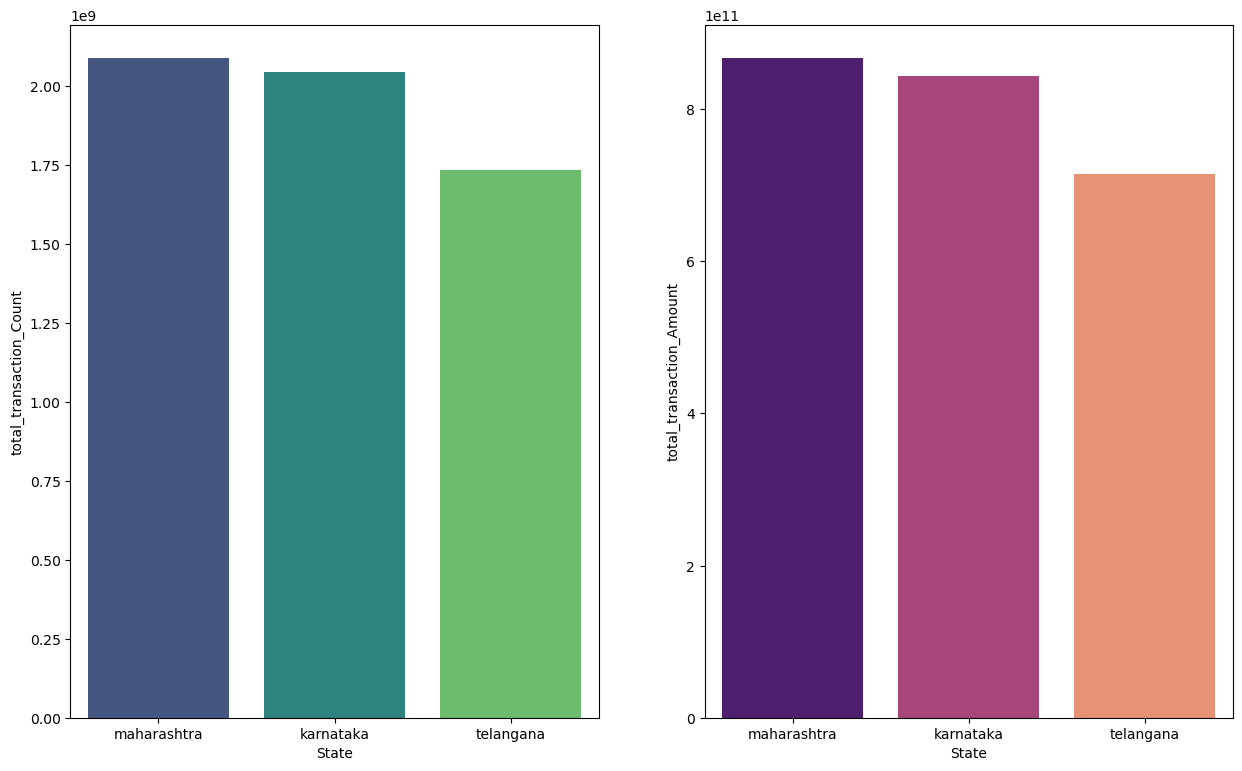

In [163]:
fig,axes = plt.subplots(1,2,figsize=(15,9))
sns.barplot(data=TopSatesTransactionGrowth, x='State', y='total_transaction_Count', palette='viridis',ax=axes[0],ci=None)
sns.barplot(data=TopSatesTransactionGrowth, x='State', y='total_transaction_Amount', palette='magma',ax=axes[1],ci=None)
plt.show()

## Calculate Quarter-over-Quarter Growth (%) in Transaction Count

In [165]:
sql = """WITH state_quarterly AS (
    SELECT 
        State,
        Year,
        Quarter,
        SUM(TransactionCount) AS total_transaction_count
    FROM aggregated_transaction
    GROUP BY State, Year, Quarter
),
growth_calc AS (
    SELECT 
        State,
        Year,
        Quarter,
        total_transaction_count,
        LAG(total_transaction_count) OVER (PARTITION BY State ORDER BY Year, Quarter) AS prev_transaction_count
    FROM state_quarterly
)
SELECT 
    State,
    Year,
    Quarter,
    total_transaction_count,
    prev_transaction_count,
    ROUND(
        CASE 
            WHEN prev_transaction_count IS NULL OR prev_transaction_count = 0 THEN NULL
            ELSE ((total_transaction_count - prev_transaction_count) * 100.0 / prev_transaction_count)
        END, 2
    ) AS percentage_growth
FROM growth_calc
ORDER BY State, Year, Quarter;

"""

curr.execute(sql)

In [166]:
QuarterGrowth = pd.DataFrame(curr.fetchall(),columns=['State','Year','Quarter','total_transaction_count','prev_transaction_count','percentage_growth'])

In [167]:
QuarterGrowth

State  Year  Quarter total_transaction_count  \
0     andaman-&-nicobar-islands  2018        1                    6658   
1     andaman-&-nicobar-islands  2018        2                   11340   
2     andaman-&-nicobar-islands  2018        3                   16265   
3     andaman-&-nicobar-islands  2018        4                   23758   
4     andaman-&-nicobar-islands  2019        1                   30486   
...                         ...   ...      ...                     ...   
1003                west-bengal  2023        4               737953238   
1004                west-bengal  2024        1               836408587   
1005                west-bengal  2024        2               980480707   
1006                west-bengal  2024        3              1084916445   
1007                west-bengal  2024        4              1227135682   

     prev_transaction_count percentage_growth  
0                      None              None  
1                      6658             70.32  
2                     11340             43.43  
3                     16265             46.07  
4                     23758             28.32  
...                     ...               ...  
1003              632093191             16.75  
1004              737953238             13.34  
1005              836408587             17.23  
1006              980480707             10.65  
1007             1084916445             13.11  

[1008 rows x 6 columns]

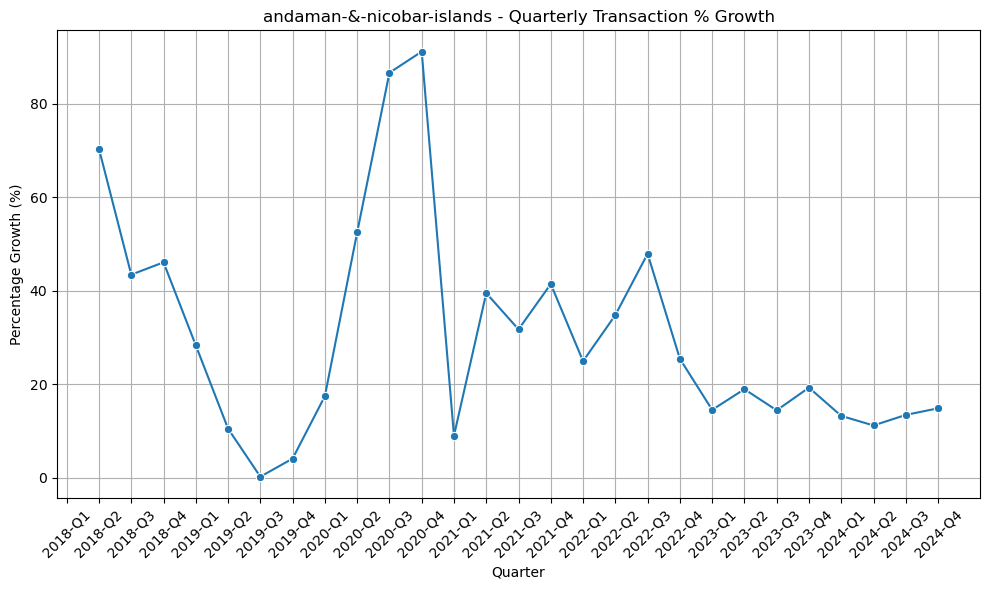

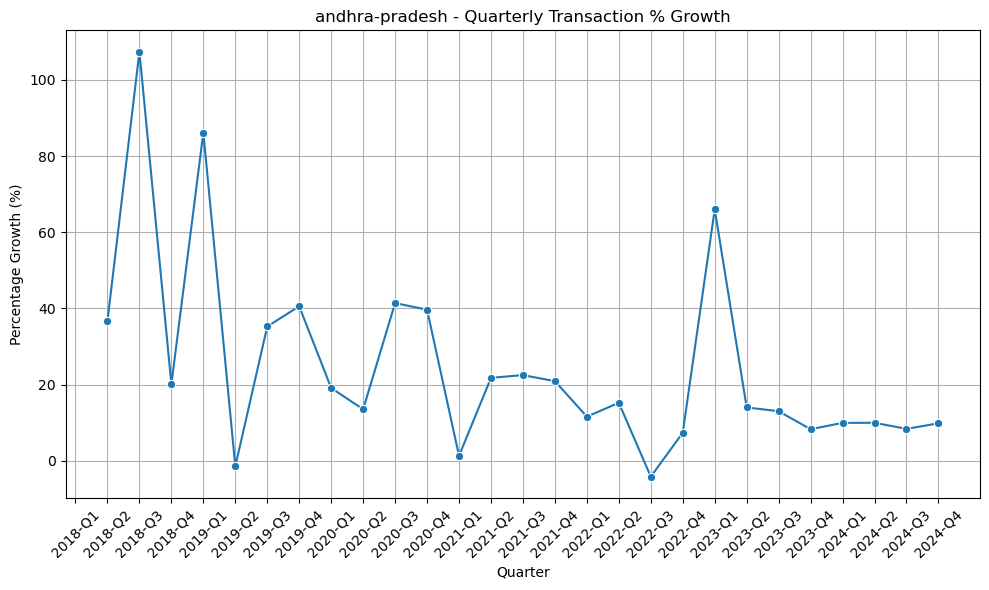

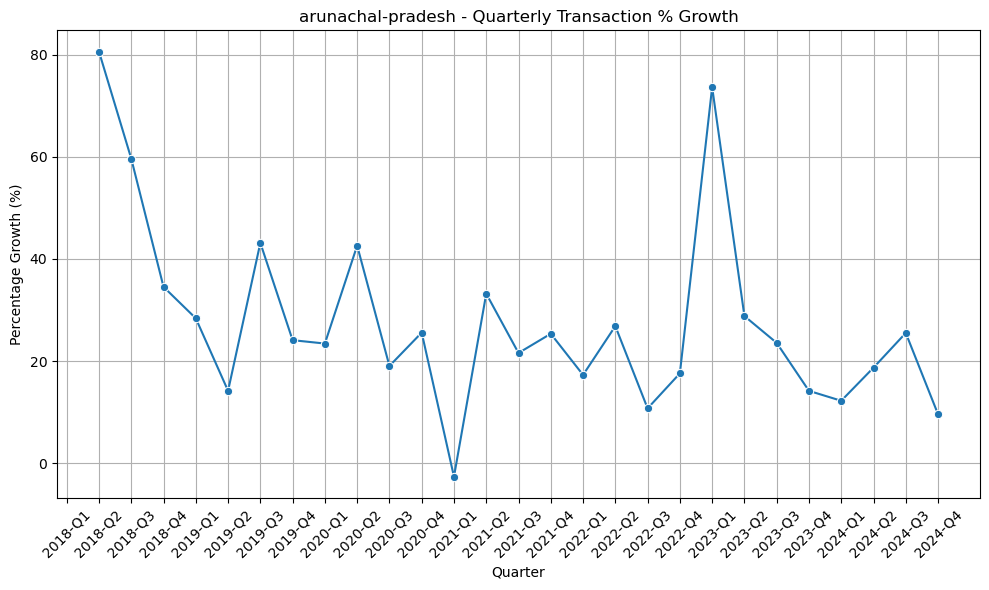

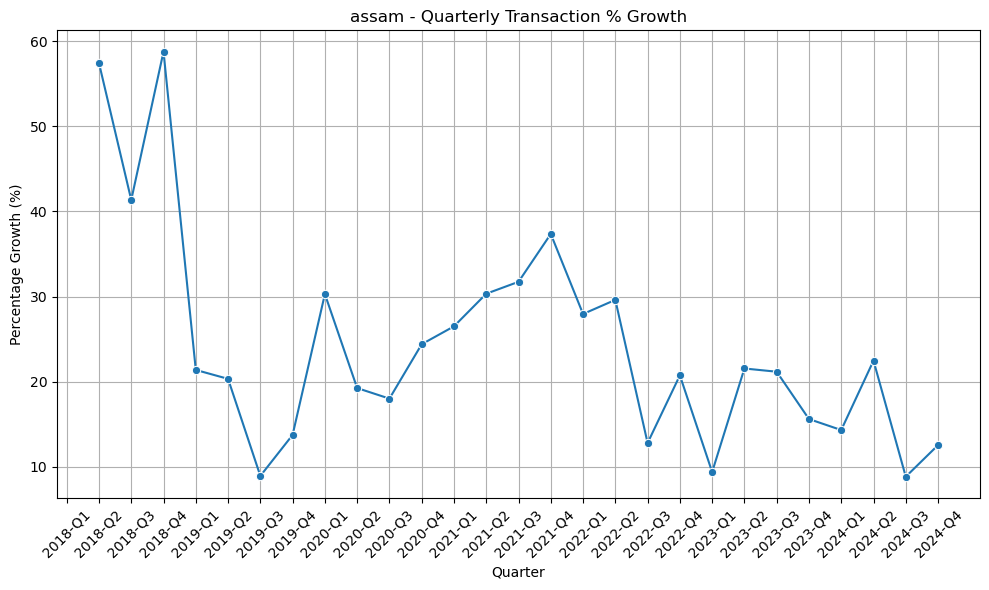

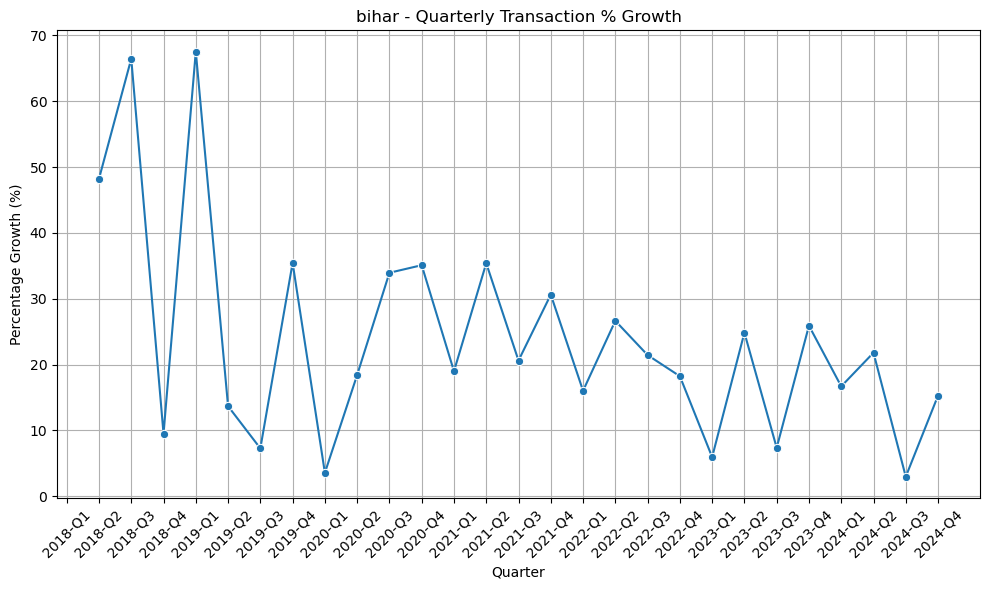

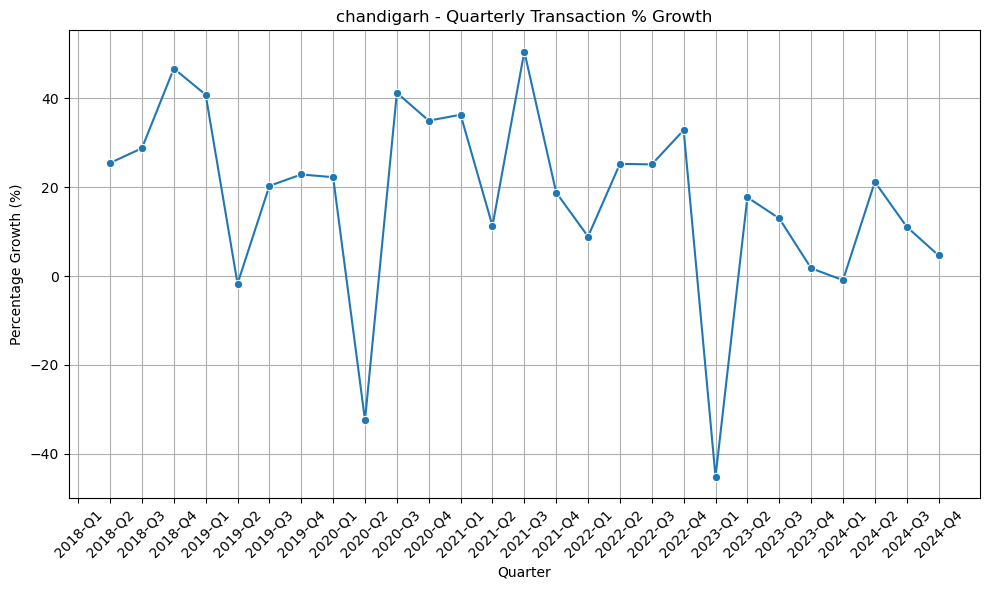

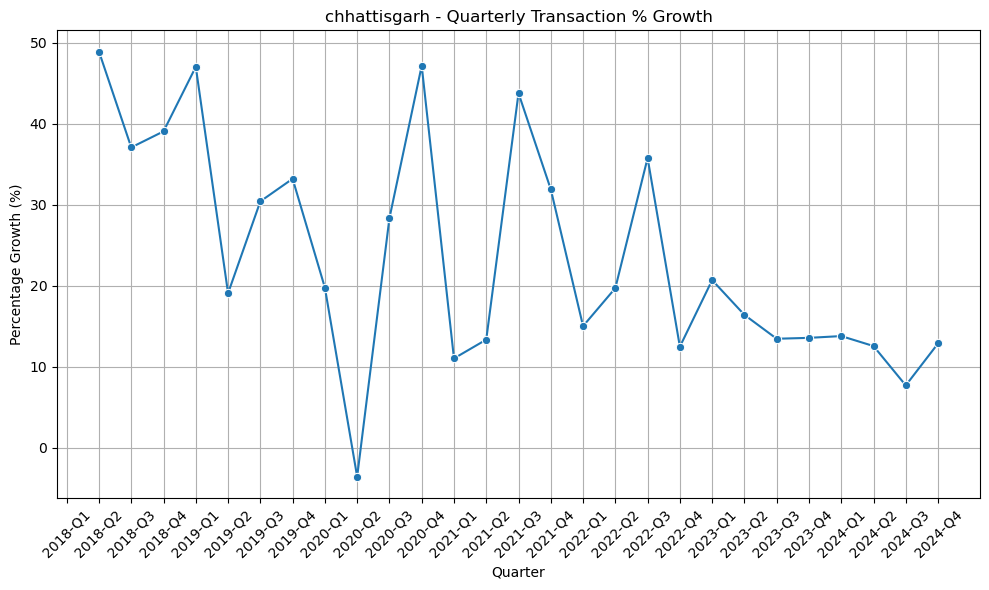

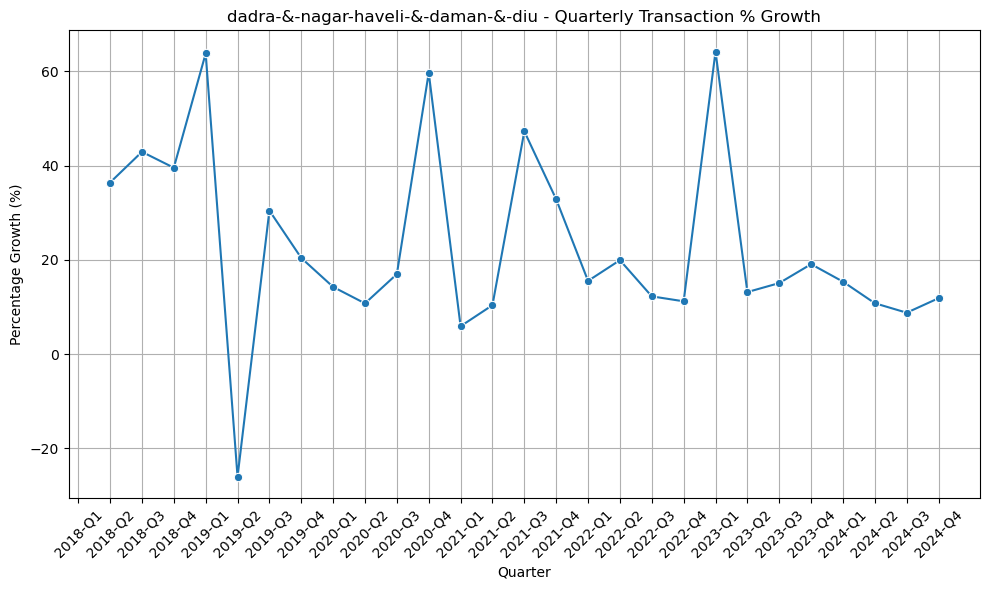

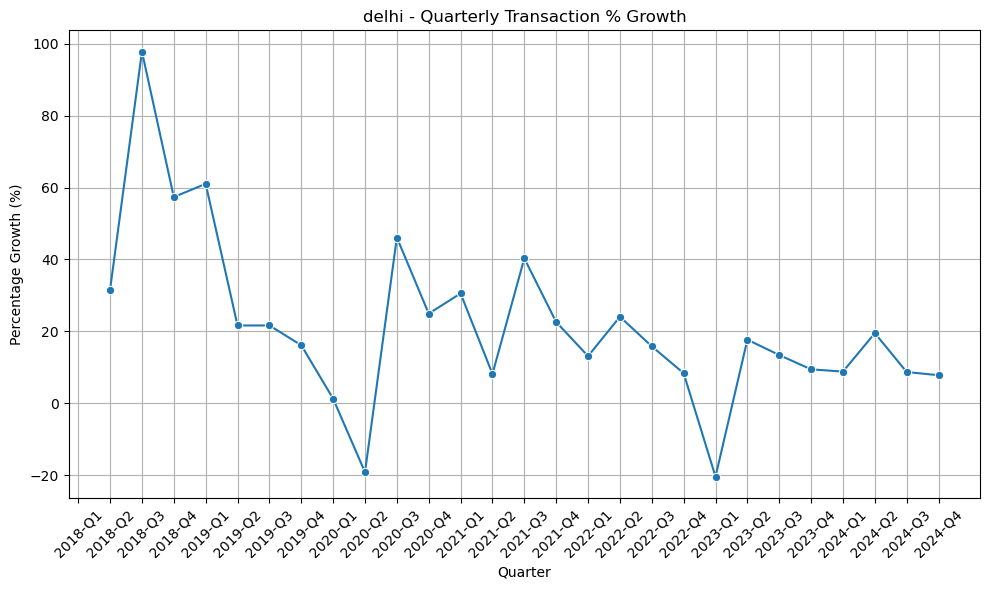

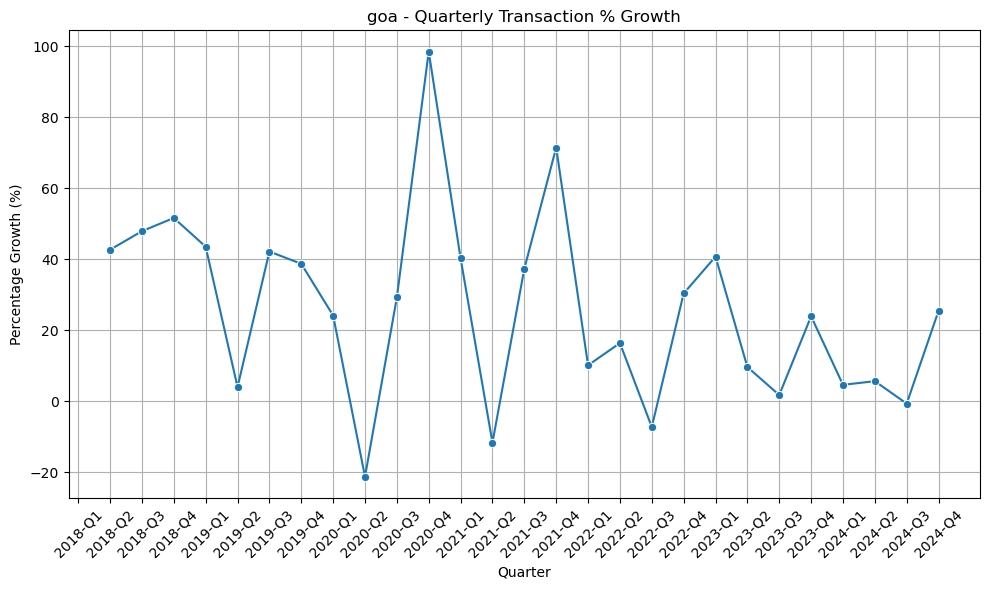

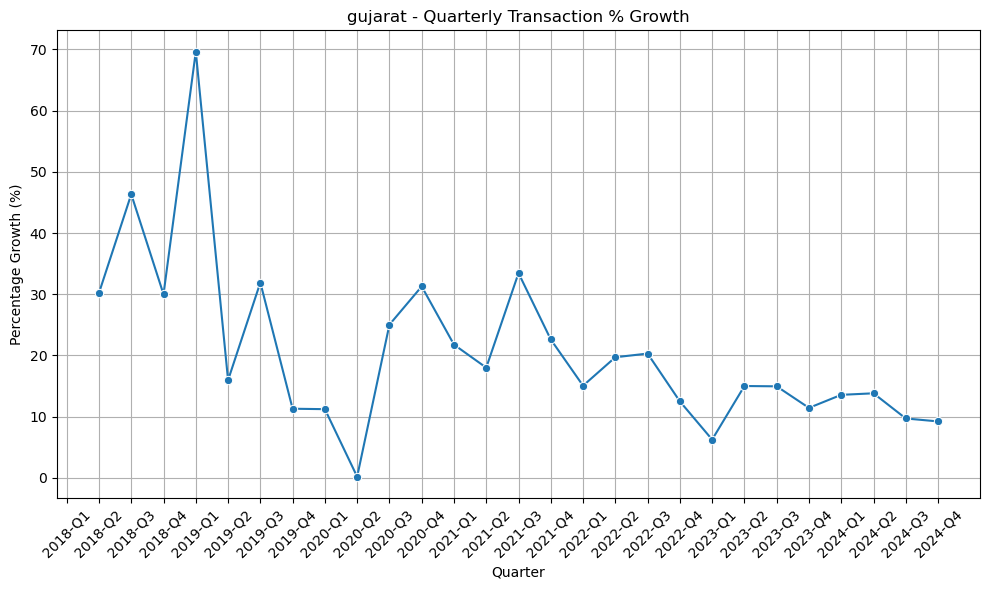

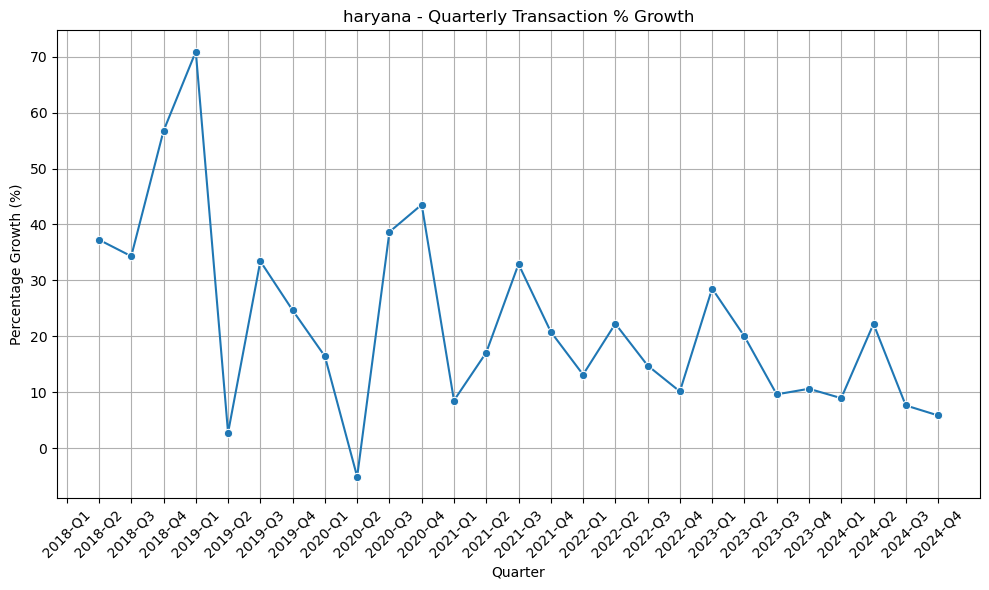

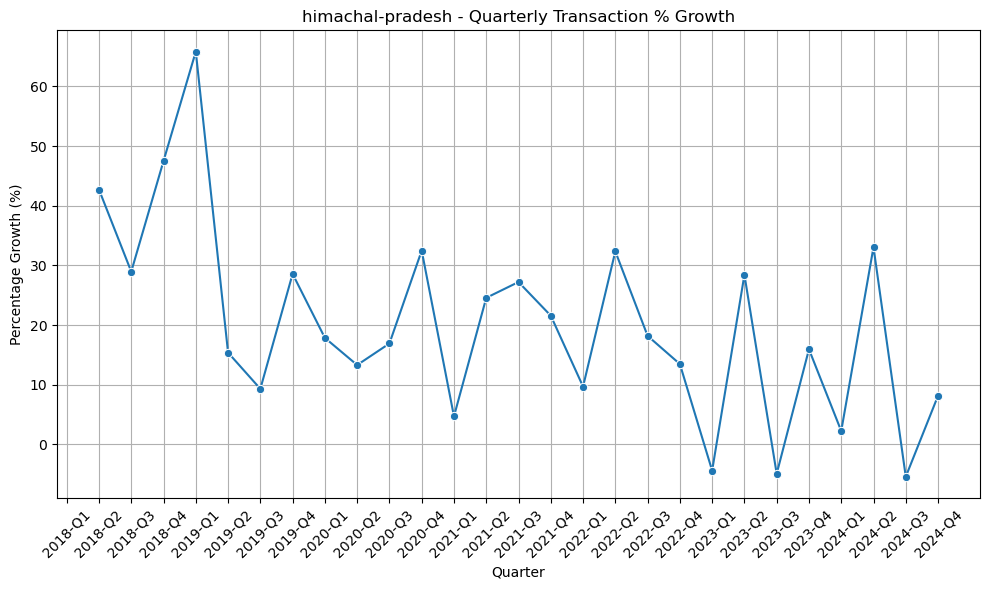

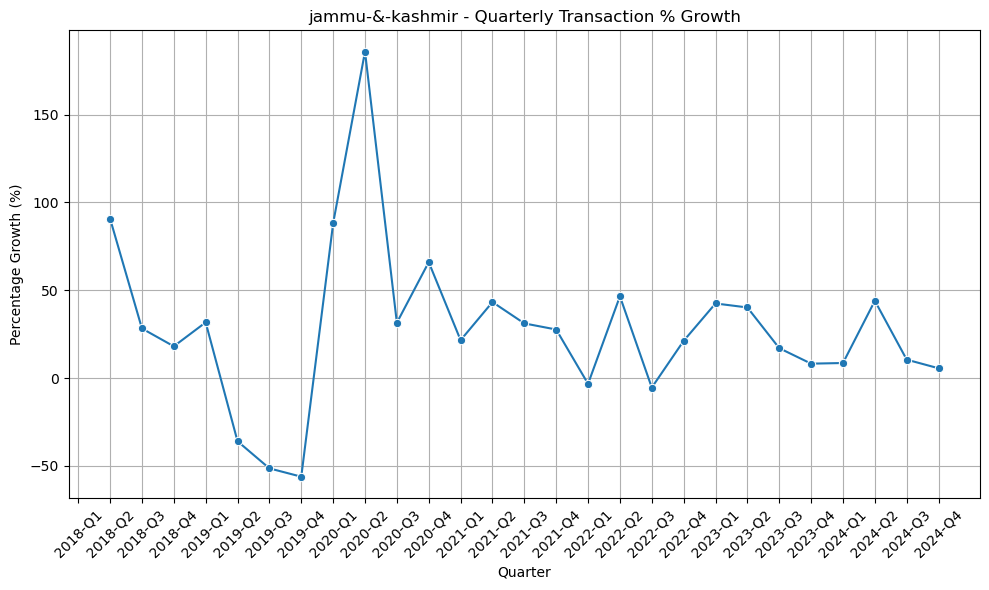

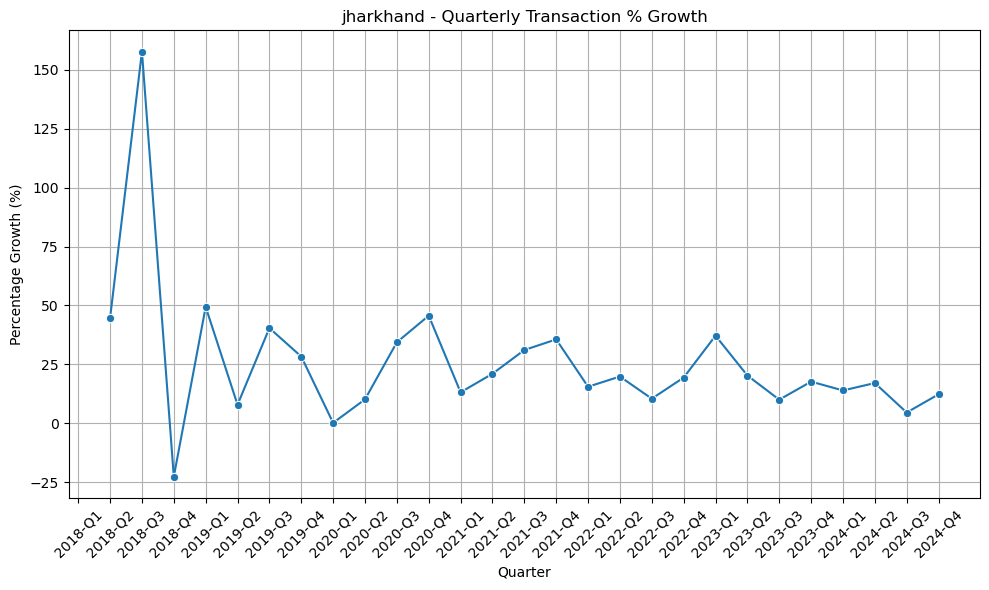

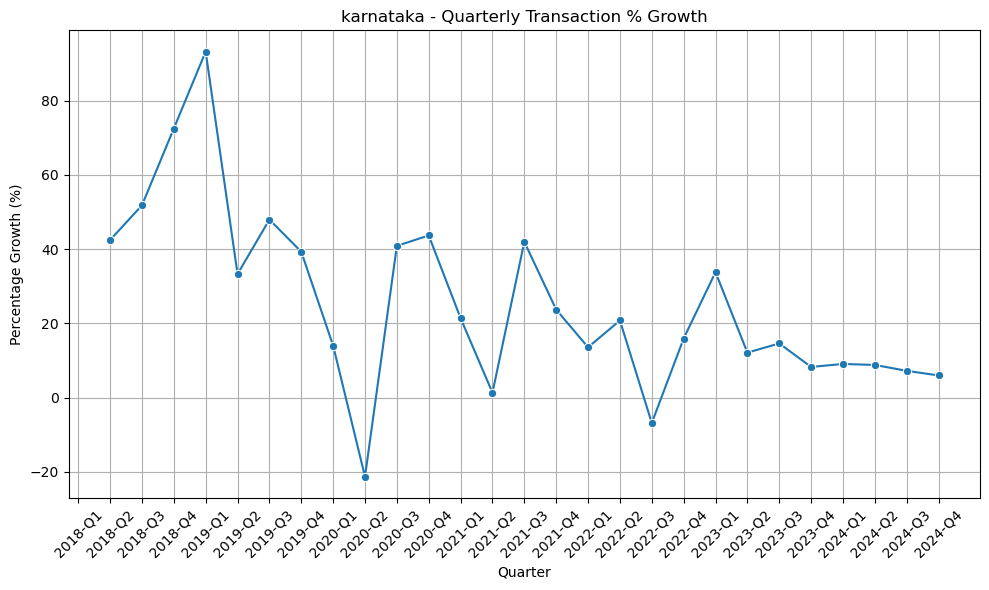

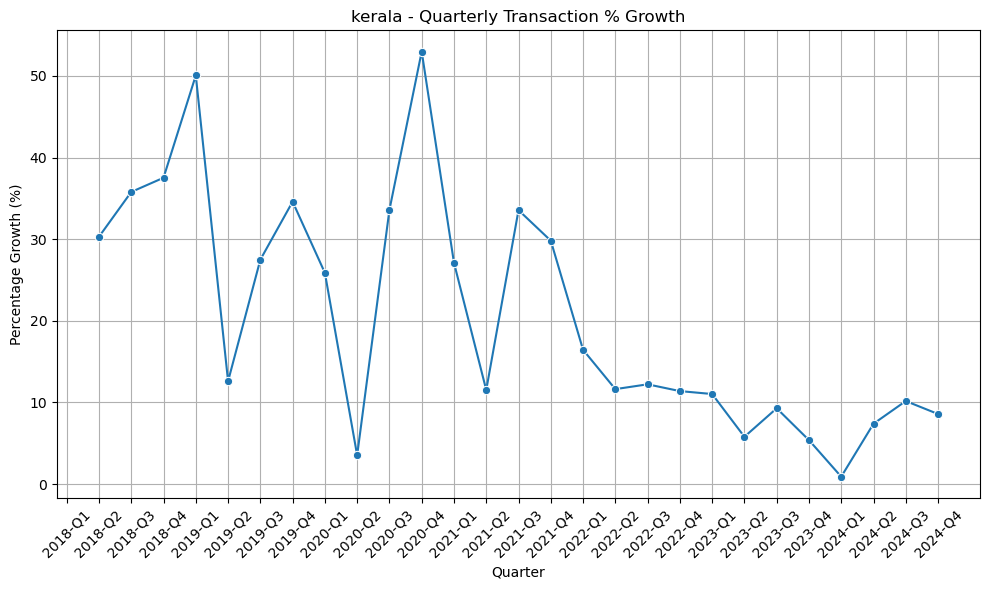

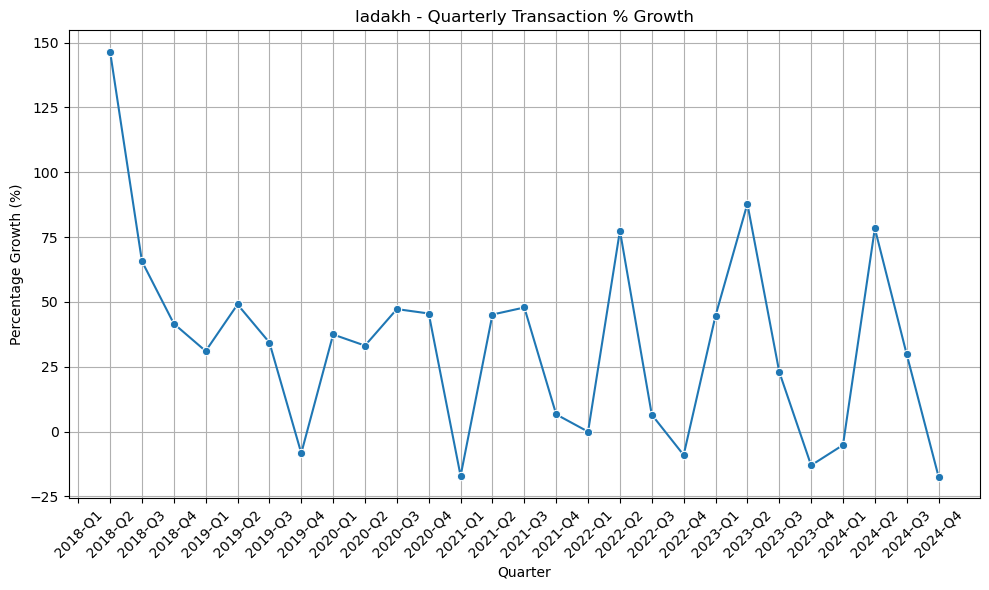

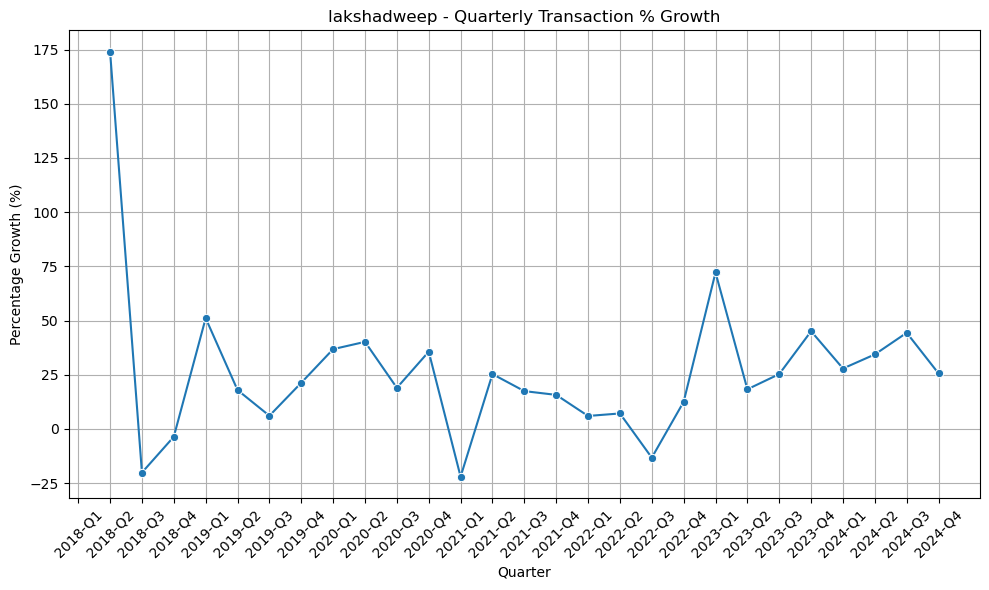

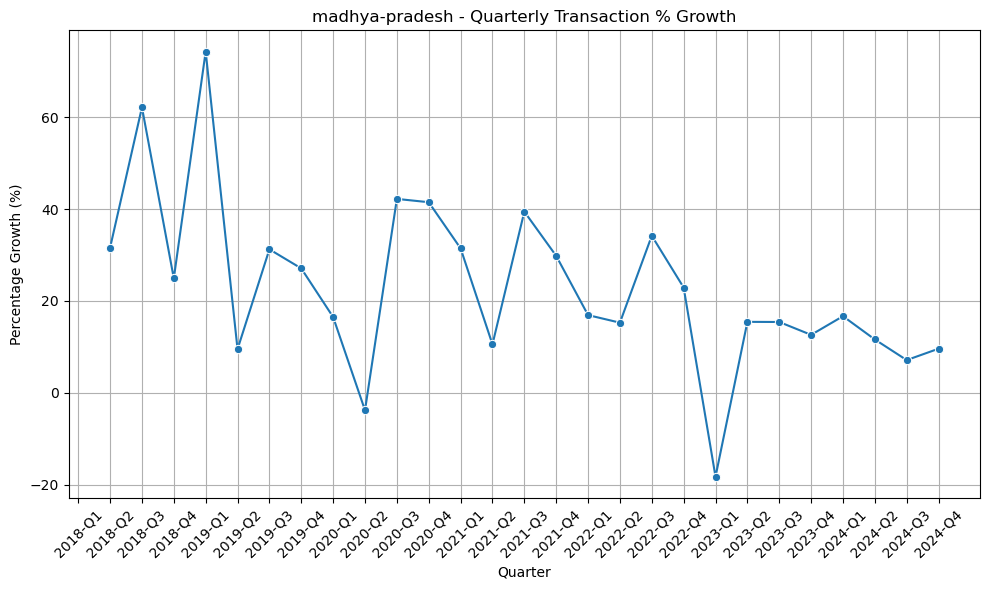

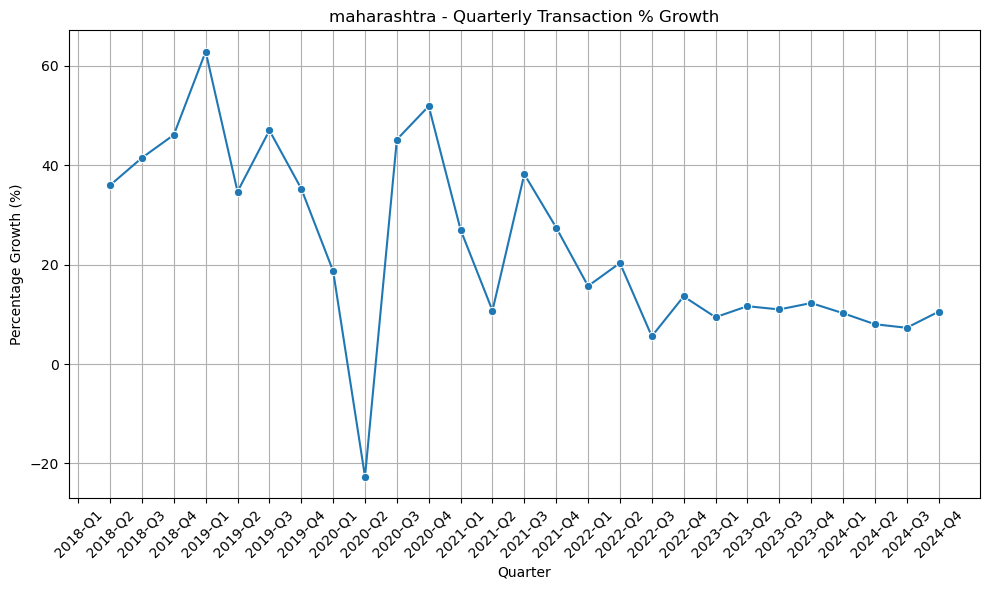

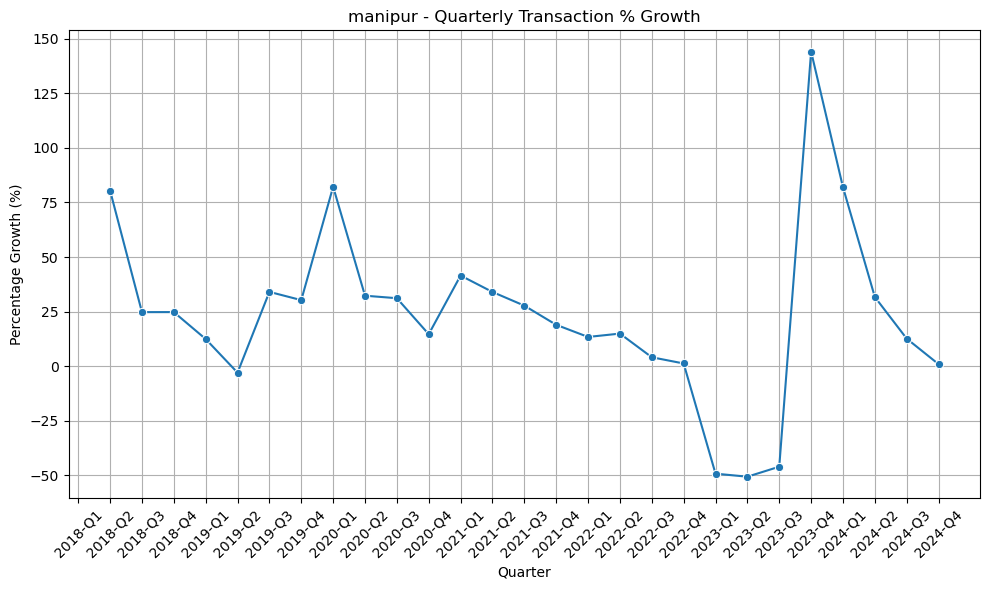

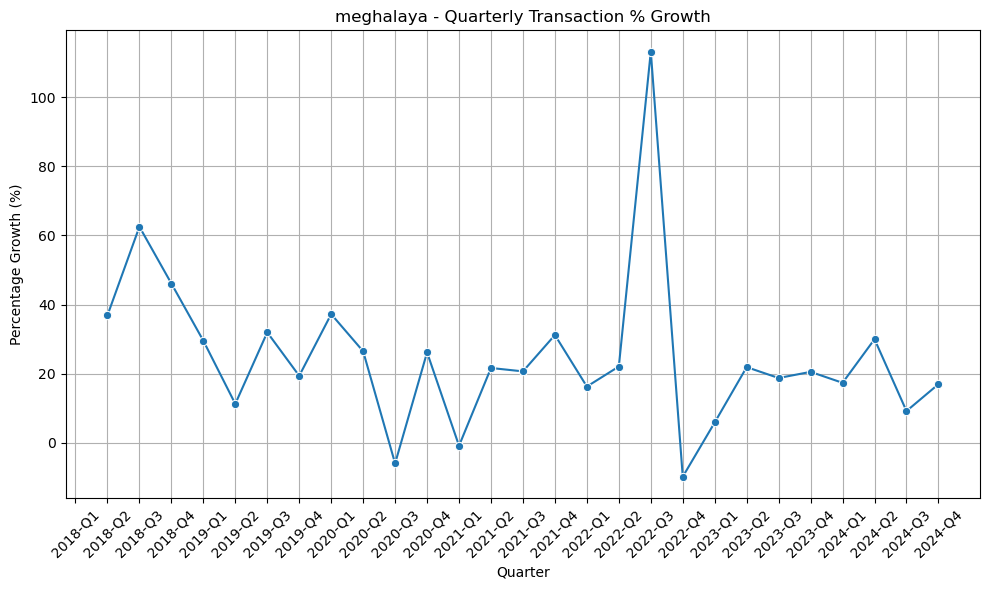

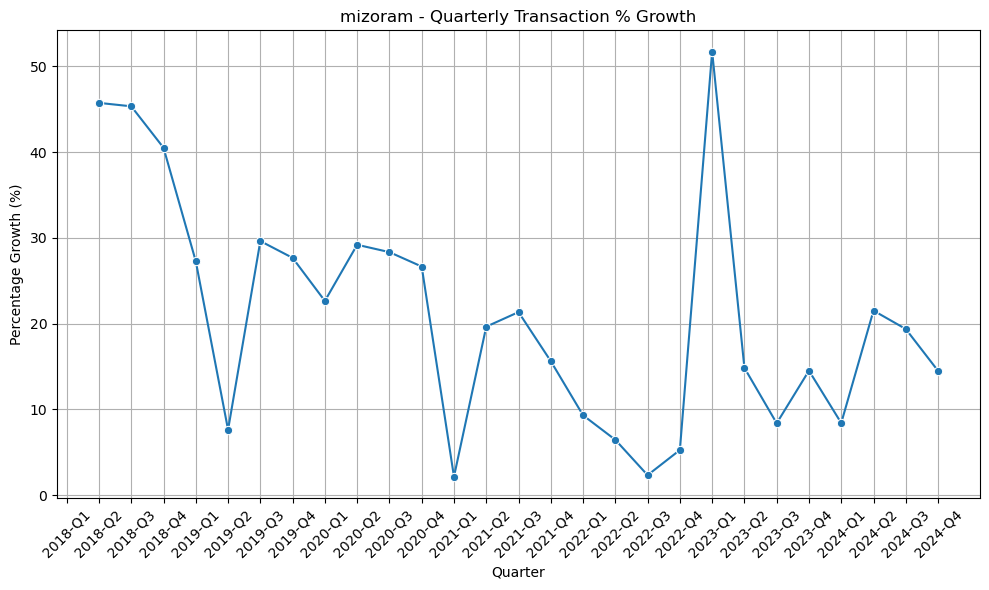

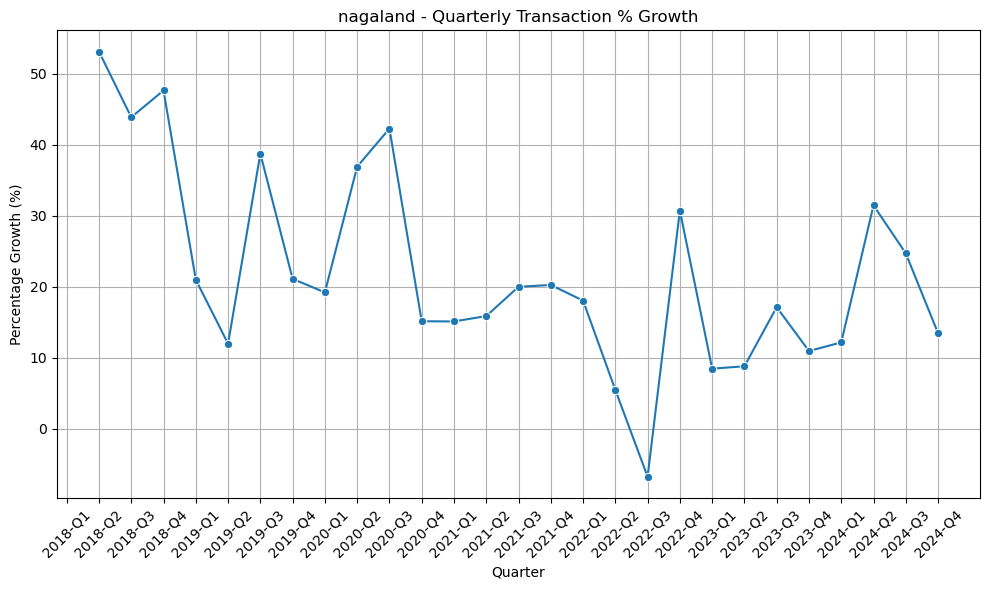

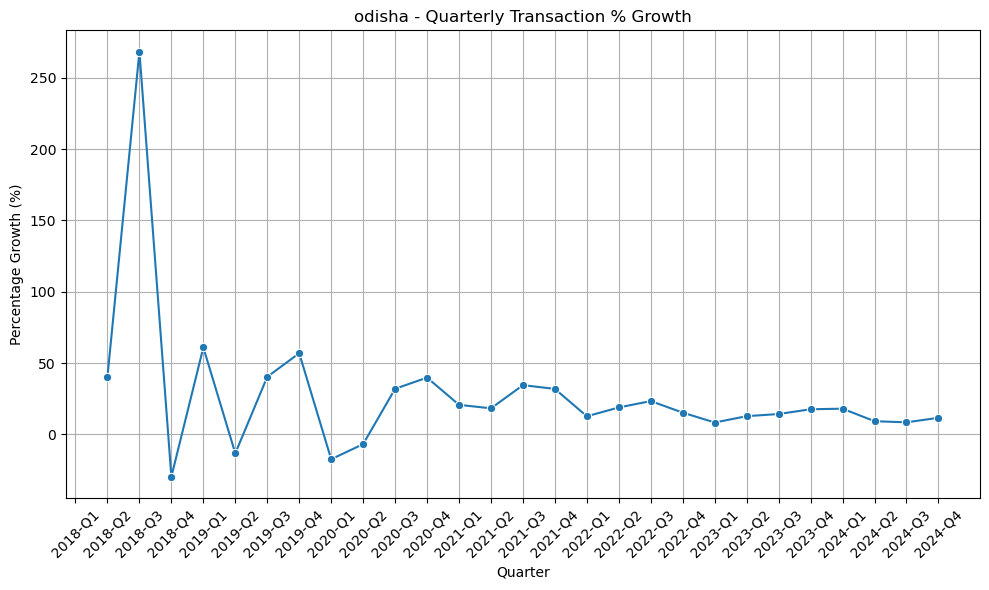

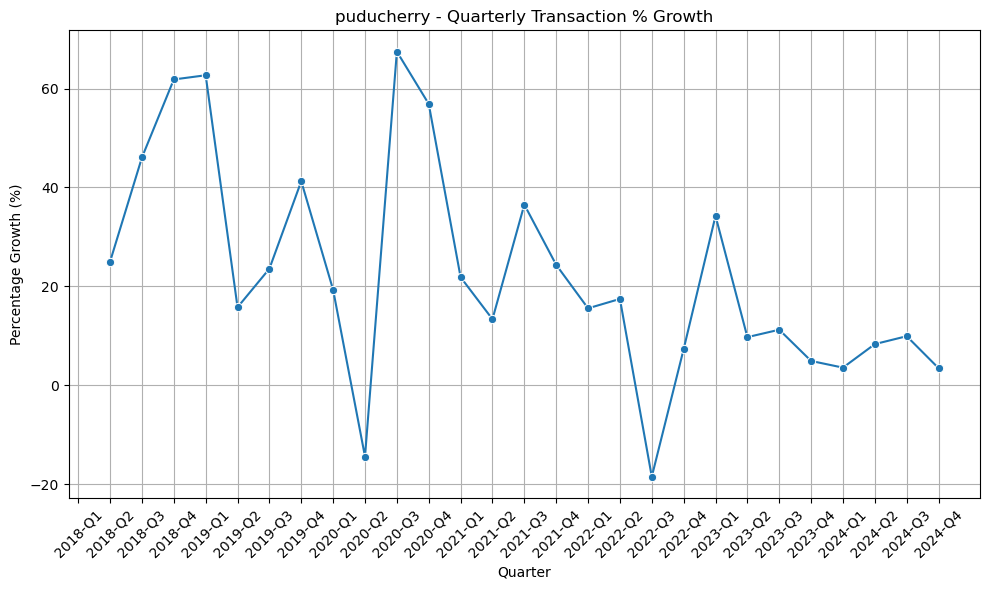

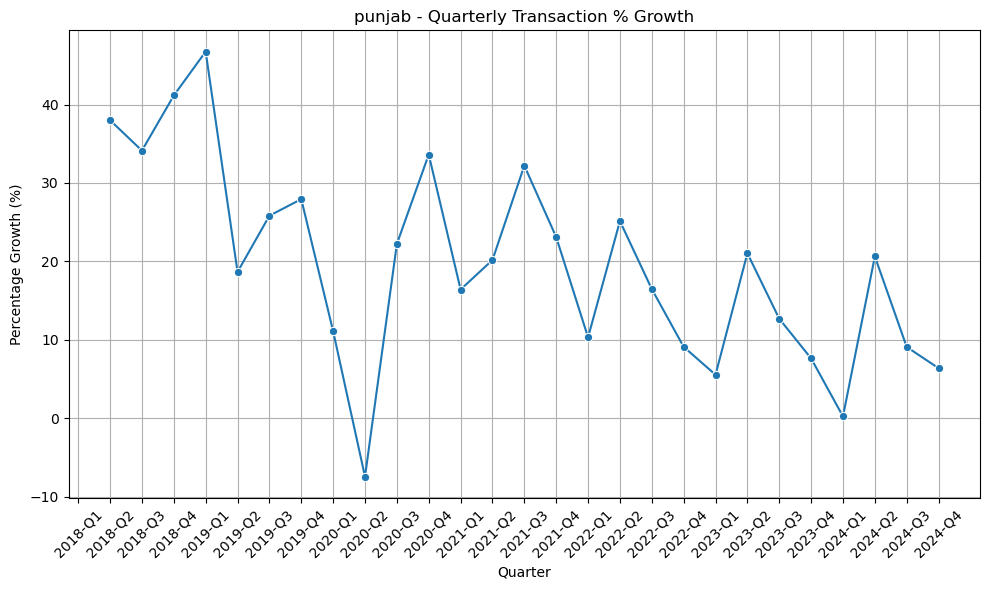

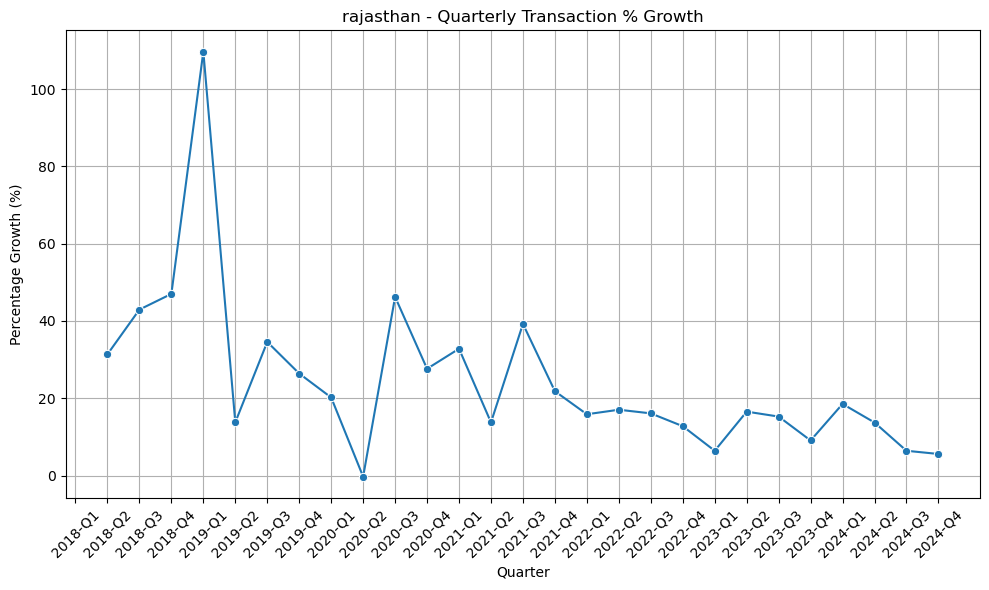

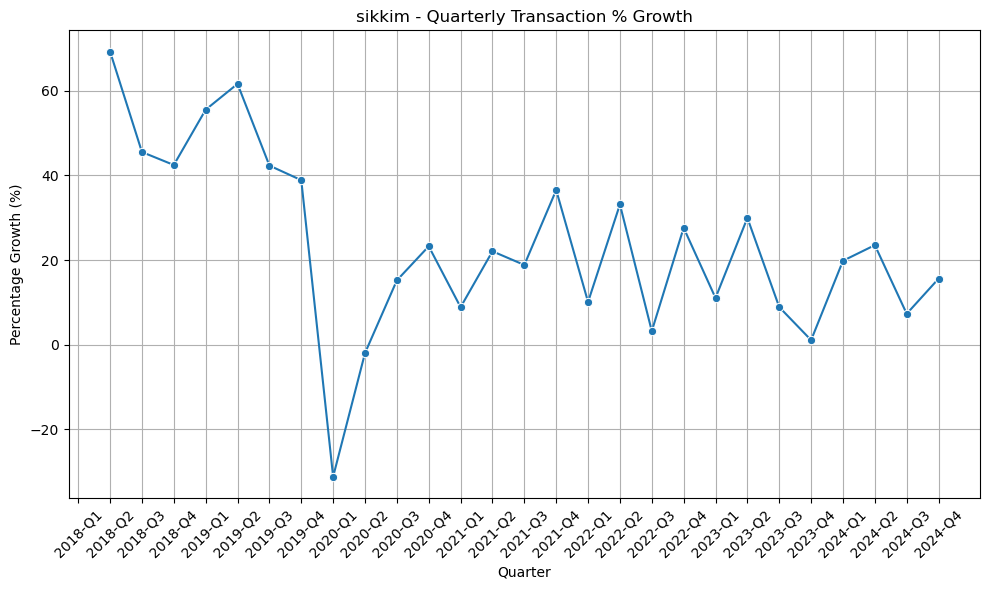

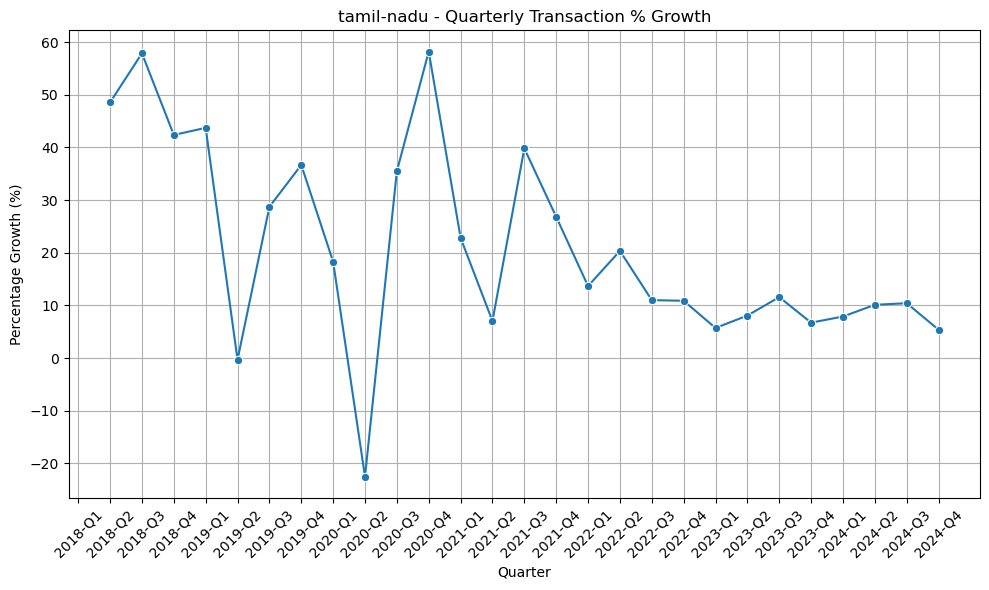

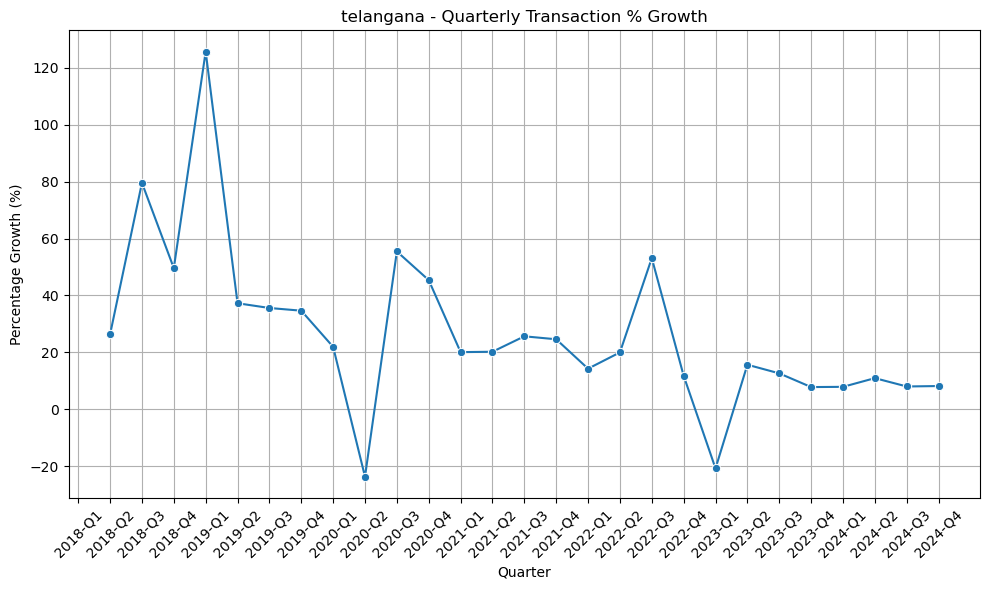

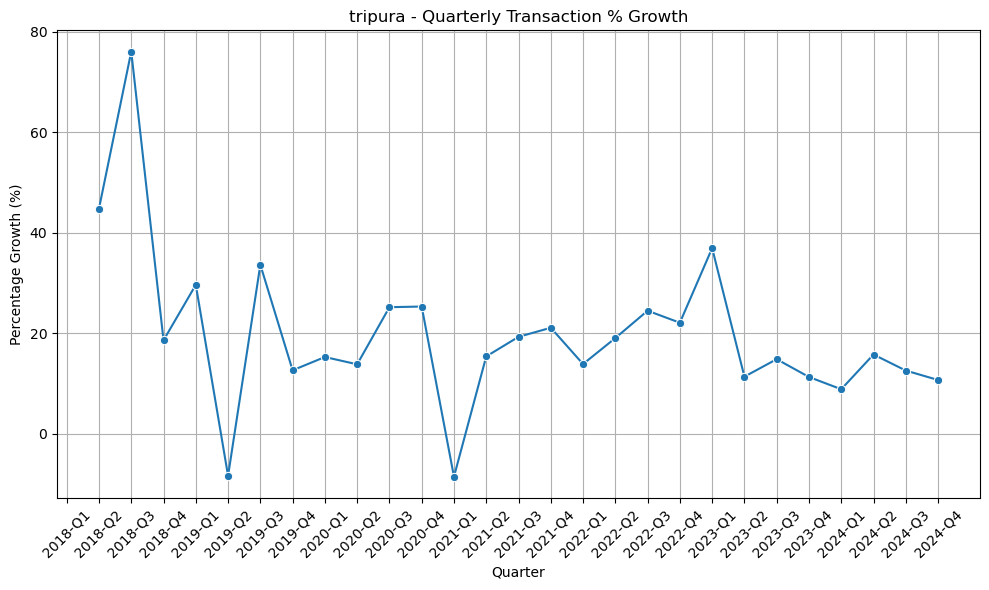

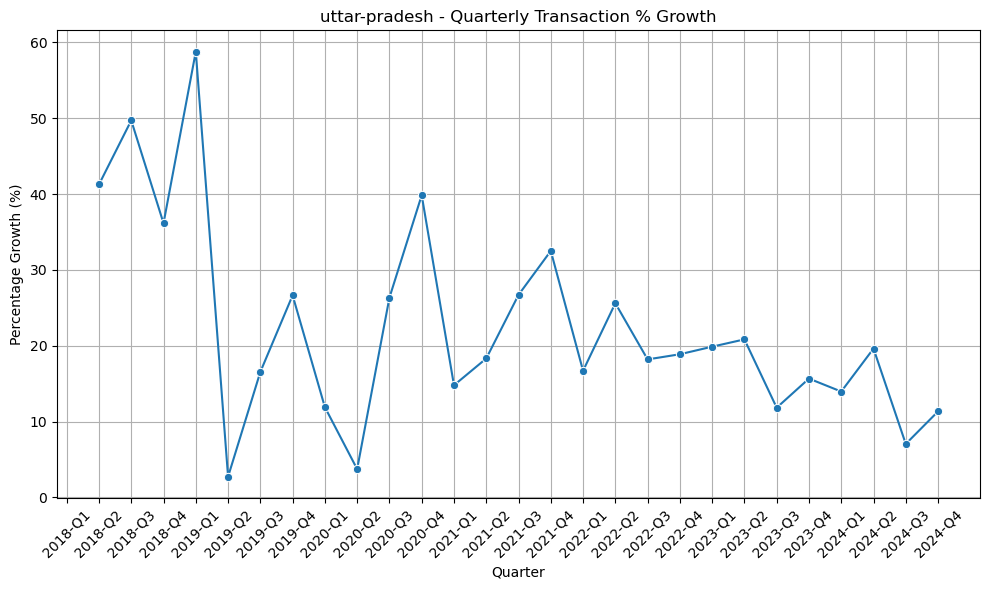

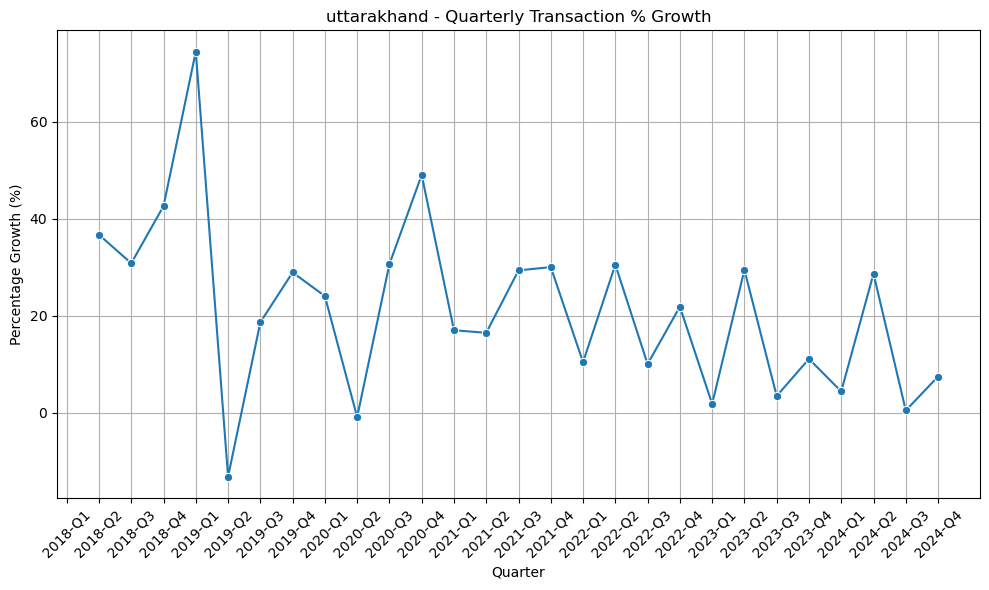

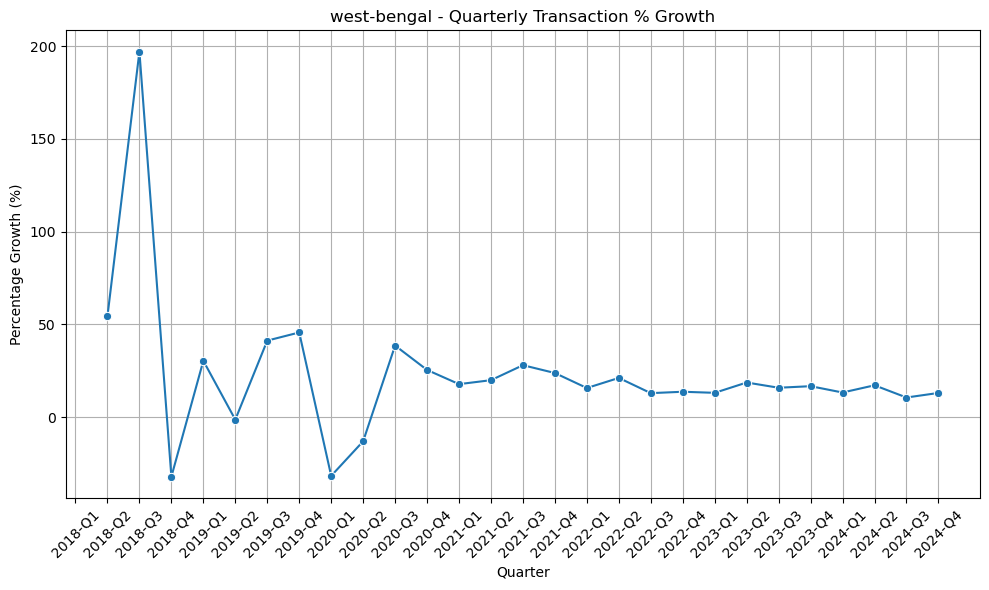

In [168]:

# Create a new column for Quarter label
QuarterGrowth['Quarter_Label'] = QuarterGrowth['Year'].astype(str) + "-Q" + QuarterGrowth['Quarter'].astype(str)

# Loop through each unique state and plot
for state in QuarterGrowth['State'].unique():
    state_data = QuarterGrowth[QuarterGrowth['State'] == state].copy()

    plt.figure(figsize=(10, 6))
    sns.lineplot(
        data=state_data,
        x='Quarter_Label',
        y='percentage_growth',
        marker='o'
    )
    plt.title(f"{state} - Quarterly Transaction % Growth")
    plt.xlabel("Quarter")
    plt.ylabel("Percentage Growth (%)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.show()


In [169]:
# total transaction count and total transaction amount per state
sql = """

SELECT 
    State,
    SUM(TransactionCount) AS total_transaction_count,
    SUM(TransactionAmount) AS total_transaction_amount
FROM aggregated_transaction
GROUP BY State
ORDER BY total_transaction_count DESC;

"""

curr.execute(sql)

In [170]:
TopPerformingStates = pd.DataFrame(curr.fetchall(), columns = ['State','total_transaction_count','total_transaction_amount']).head(10)

In [171]:
TopPerformingStates

State total_transaction_count  total_transaction_amount
0     maharashtra             31985208732              4.037420e+13
1       karnataka             30970946279              4.067872e+13
2       telangana             26174684592              4.165596e+13
3  andhra-pradesh             18918696723              3.466908e+13
4   uttar-pradesh             18523603727              2.688521e+13
5       rajasthan             17108537898              2.634324e+13
6  madhya-pradesh             14072176059              1.912528e+13
7           bihar             10941026824              1.790135e+13
8     west-bengal              9191499687              1.558416e+13
9          odisha              8918527452              1.226398e+13

C:\Users\lap\AppData\Local\Temp\ipykernel_12928\2058599798.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=TopPerformingStates, x='State', y='total_transaction_count',ci=None)


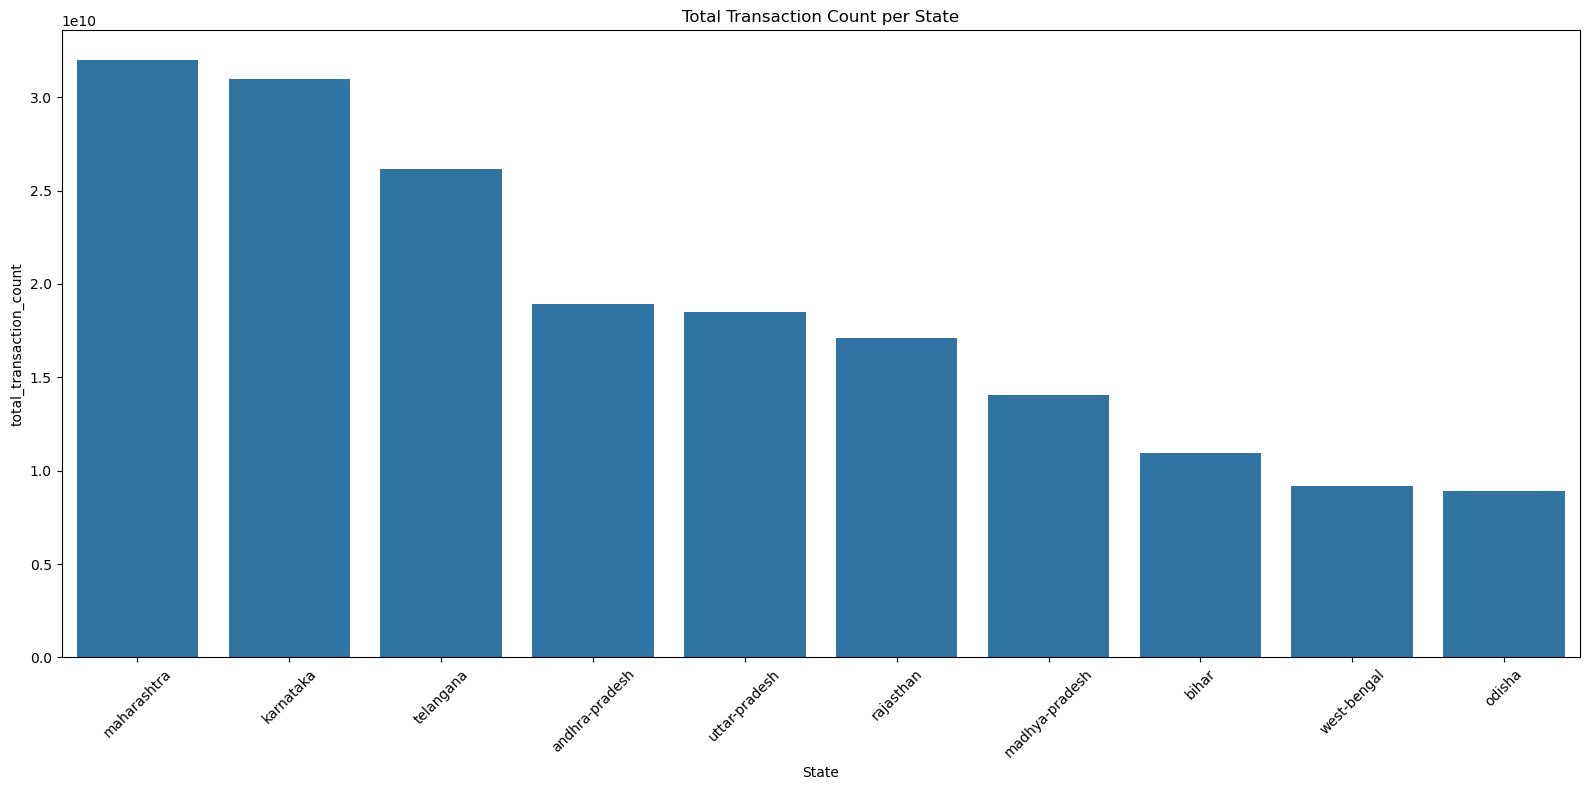

In [172]:
# Total Transaction Count per State



plt.figure(figsize=(16, 8))
sns.barplot(data=TopPerformingStates, x='State', y='total_transaction_count',ci=None)
plt.title('Total Transaction Count per State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\lap\AppData\Local\Temp\ipykernel_12928\1929388021.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=TopPerformingStates, x='State', y='total_transaction_amount',ci=None)


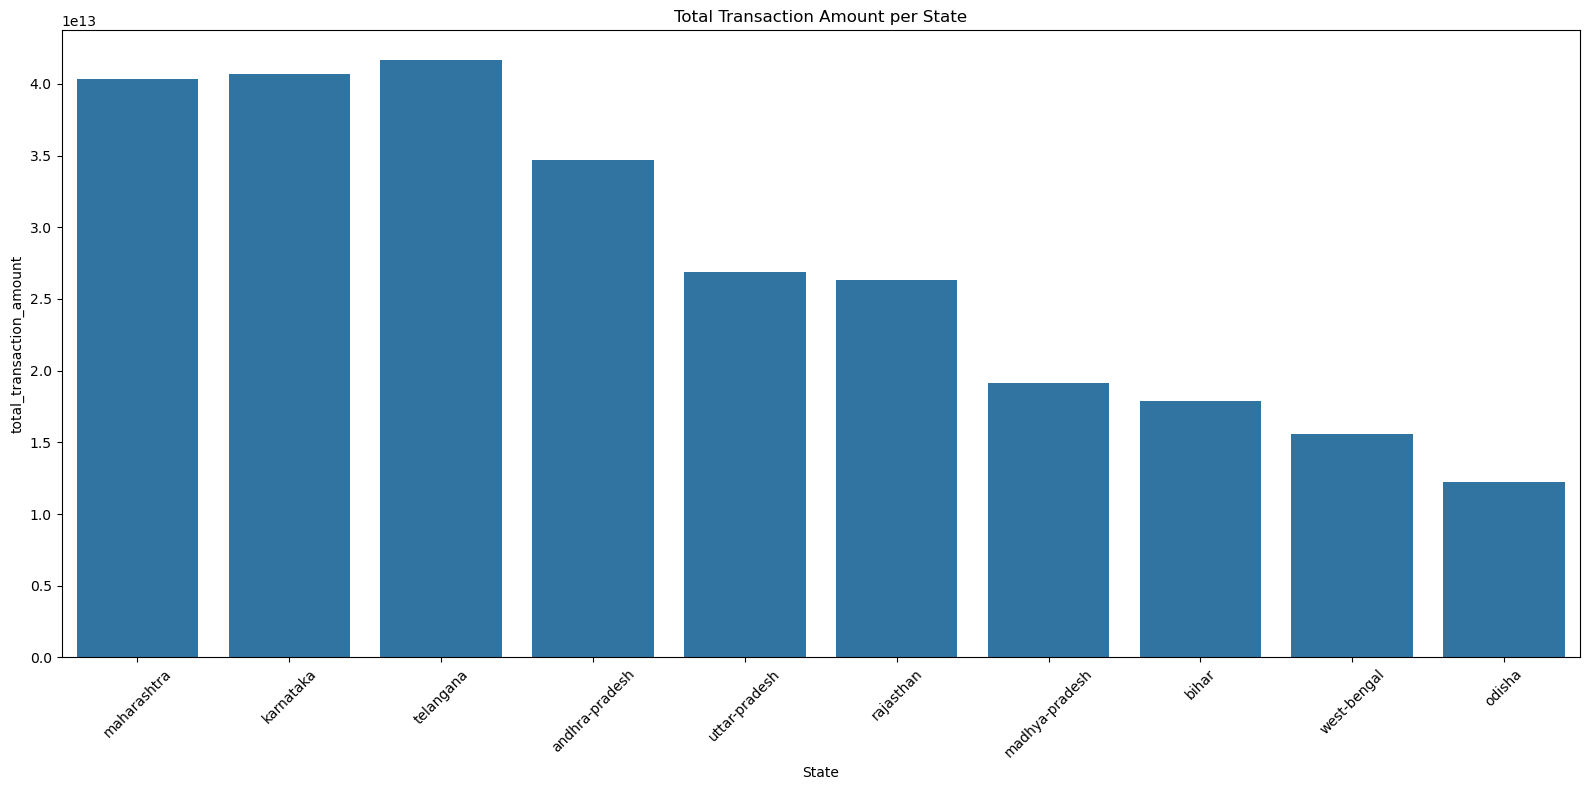

In [173]:
# Total Transaction Amount per State
plt.figure(figsize=(16, 8))
sns.barplot(data=TopPerformingStates, x='State', y='total_transaction_amount',ci=None)
plt.title('Total Transaction Amount per State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [174]:
# total transaction count and total transaction amount per state using district-level data

sql = """

SELECT 
    State,District,
    SUM(Transaction_count) AS total_transaction_count,
    SUM(Transaction_amount) AS total_transaction_amount
FROM top_district_trans
GROUP BY State,District
ORDER BY total_transaction_count DESC;

"""

curr.execute(sql)

In [175]:
TopPerformingDistricts = pd.DataFrame(curr.fetchall(), columns = ['State','District','total_transaction_count','total_transaction_amount']).head(10)

In [176]:
TopPerformingDistricts

State            District total_transaction_count  \
0       karnataka     bengaluru urban             17108133846   
1     maharashtra                pune              9369053544   
2       telangana           hyderabad              7701373666   
3       rajasthan              jaipur              5396870406   
4       telangana          rangareddy              5038415120   
5       telangana  medchal malkajgiri              4107321900   
6  andhra-pradesh       visakhapatnam              2575752191   
7          odisha             khordha              2447746576   
8         haryana            gurugram              2398816248   
9     maharashtra     mumbai suburban              2396700372   

  total_transaction_amount  
0           19937841648192  
1            9730217773958  
2           11906937011997  
3            7854091516462  
4            7155140430405  
5            5758877771328  
6            4198568092579  
7            2992147071370  
8            2399547172350  
9            2898912678195

C:\Users\lap\AppData\Local\Temp\ipykernel_12928\2694601713.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=TopPerformingDistricts, x='State_District', y='total_transaction_count',ci=None)


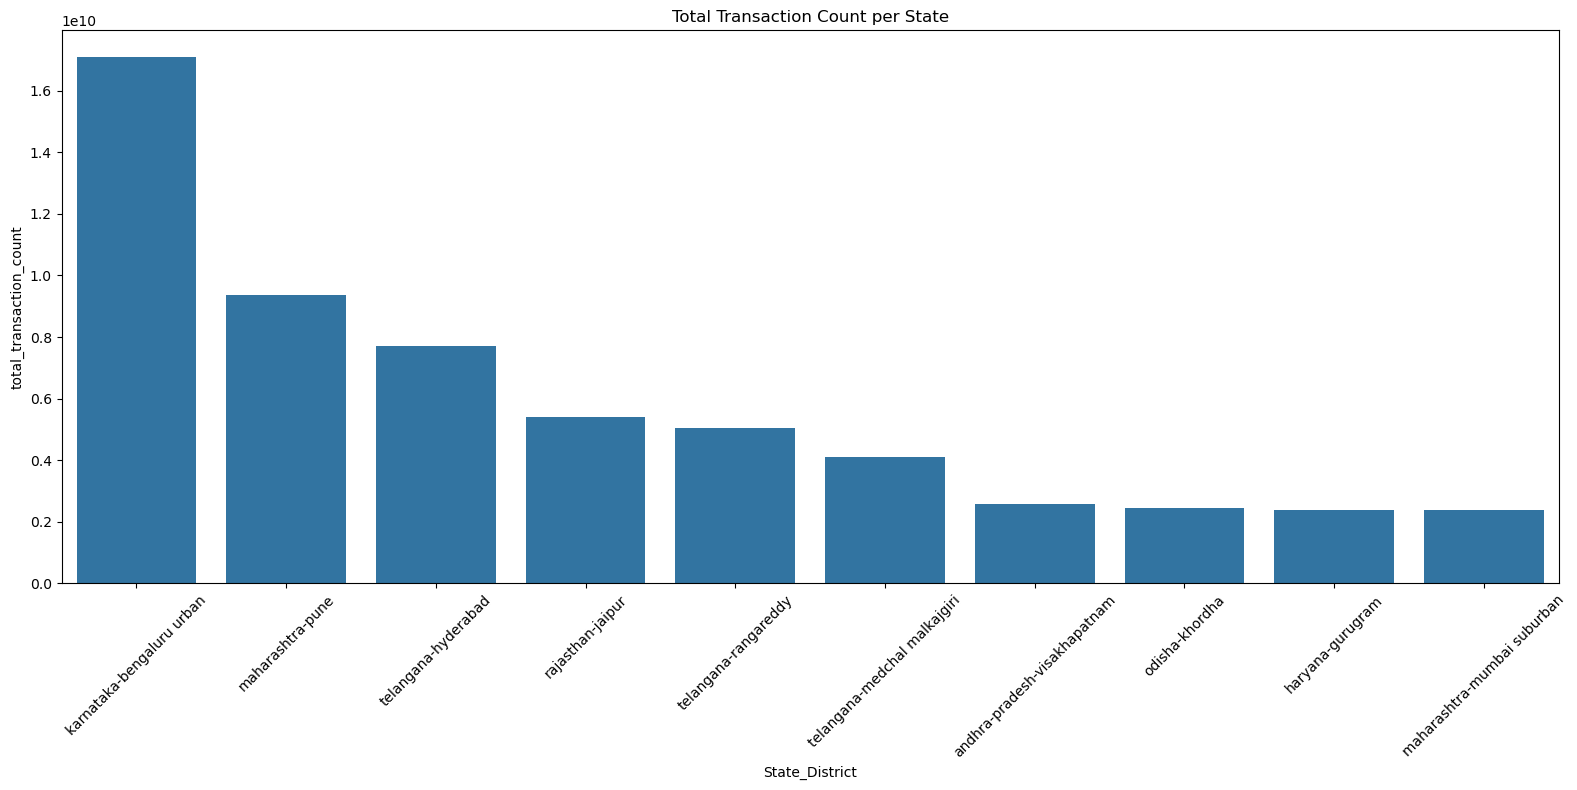

In [177]:
# Total Transaction Count per State using district-level data

# Create a new column
TopPerformingDistricts['State_District'] = TopPerformingDistricts['State'].astype(str) + "-" + TopPerformingDistricts['District'].astype(str)

plt.figure(figsize=(16, 8))
sns.barplot(data=TopPerformingDistricts, x='State_District', y='total_transaction_count',ci=None)
plt.title('Total Transaction Count per State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\lap\AppData\Local\Temp\ipykernel_12928\137912965.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=TopPerformingDistricts, x='State_District', y='total_transaction_amount',ci=None)


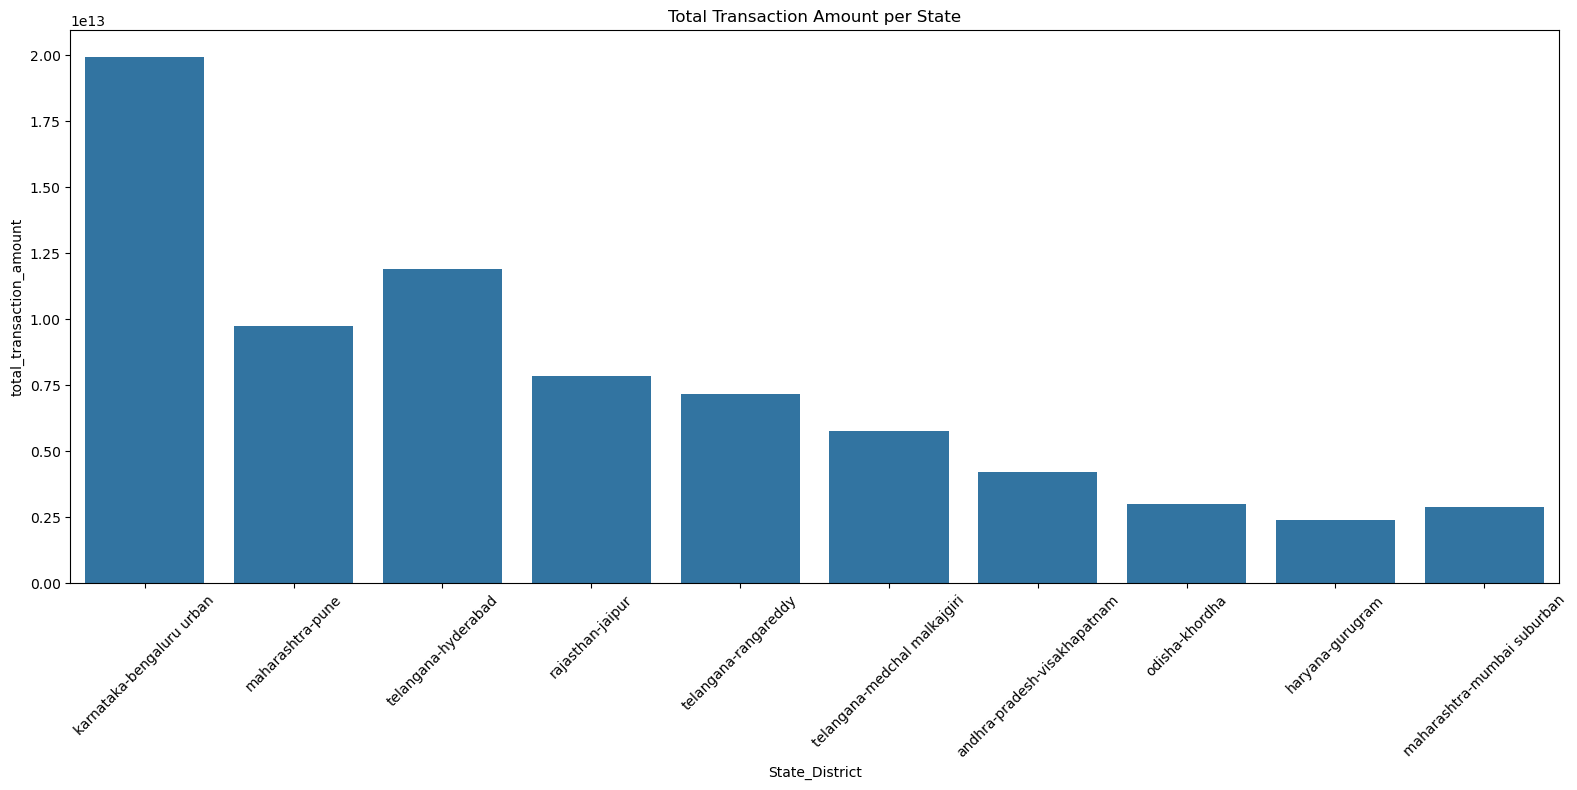

In [178]:
# Total Transaction Amount per State using district-level data

plt.figure(figsize=(16, 8))
sns.barplot(data=TopPerformingDistricts, x='State_District', y='total_transaction_amount',ci=None)
plt.title('Total Transaction Amount per State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Usecase 2

## 2.1 “Top Device Brands by Total Registered User"

In [181]:
sql = """
select State,Brand,sum(UserCount) as total_registered_user from aggregated_user 
group by State,Brand 
Order by total_registered_user DESC;
"""
curr.execute(sql)

In [182]:
TopDeviceBrandsByTotalRegisteredUser = pd.DataFrame(curr.fetchall(), columns =['State','Brand','total_registered_user']).head(10)

In [183]:
TopDeviceBrandsByTotalRegisteredUser

State    Brand total_registered_user
0     maharashtra   Xiaomi             112867939
1     maharashtra  Samsung              96805793
2   uttar-pradesh   Xiaomi              91026031
3     maharashtra     Vivo              80364873
4       karnataka   Xiaomi              74495837
5   uttar-pradesh  Samsung              65570247
6   uttar-pradesh     Vivo              61114756
7     maharashtra     Oppo              60017665
8       karnataka  Samsung              57223423
9  andhra-pradesh   Xiaomi              56579876

In [184]:
# plt.figure(figsize=(10,5))
# sns.barplot(data=TopDeviceBrandsByTotalRegisteredUser,x='Brand',y='total_registered_user',ci=None)
# plt.title('Top Device Brands By Total Registered User')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

C:\Users\lap\AppData\Local\Temp\ipykernel_12928\1421968398.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\lap\AppData\Local\Temp\ipykernel_12928\1421968398.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


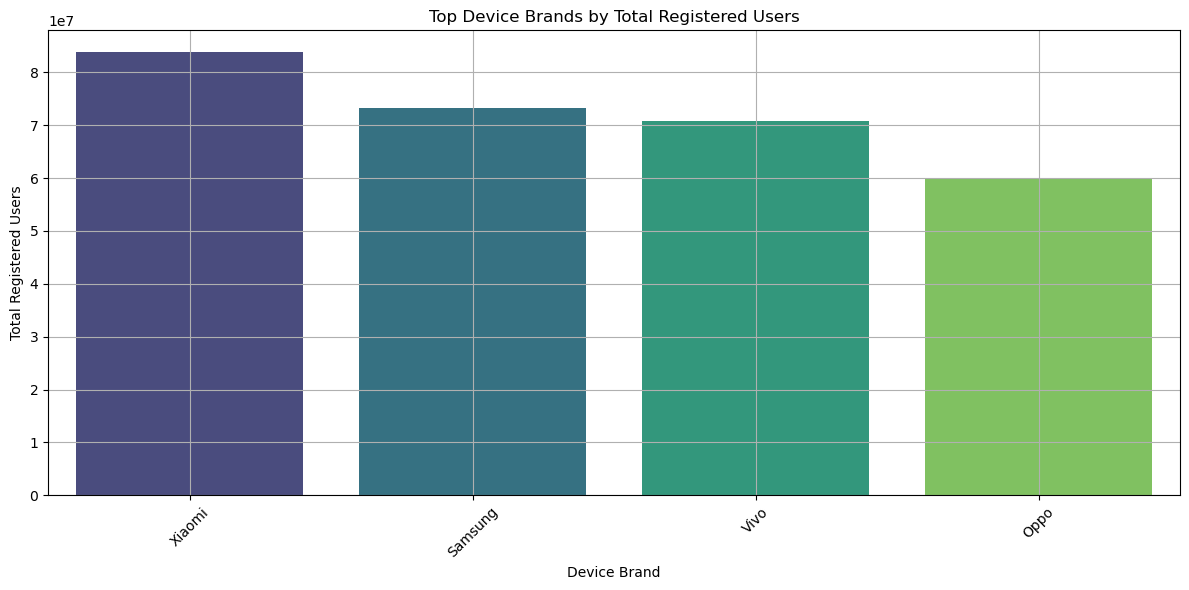

In [185]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=TopDeviceBrandsByTotalRegisteredUser,
    x='Brand',
    y='total_registered_user',
    palette='viridis',
    ci=None
)

plt.title("Top Device Brands by Total Registered Users")
plt.xlabel("Device Brand")
plt.ylabel("Total Registered Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

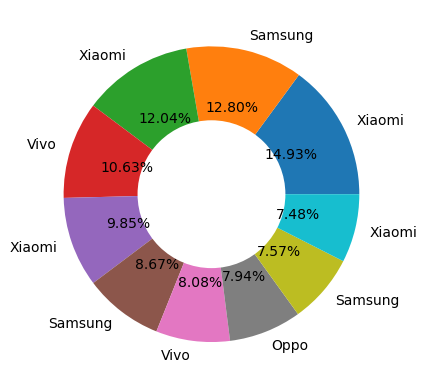

In [186]:
plt.pie(TopDeviceBrandsByTotalRegisteredUser['total_registered_user'],labels=TopDeviceBrandsByTotalRegisteredUser['Brand'], autopct= "%1.2f%%")
circle = plt.Circle((0,0),0.50,fc="white")

curr_plot = plt.gcf() # get current figure
curr_plot.gca().add_artist(circle) # get current axes

plt.show()

C:\Users\lap\AppData\Local\Temp\ipykernel_12928\3799711650.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


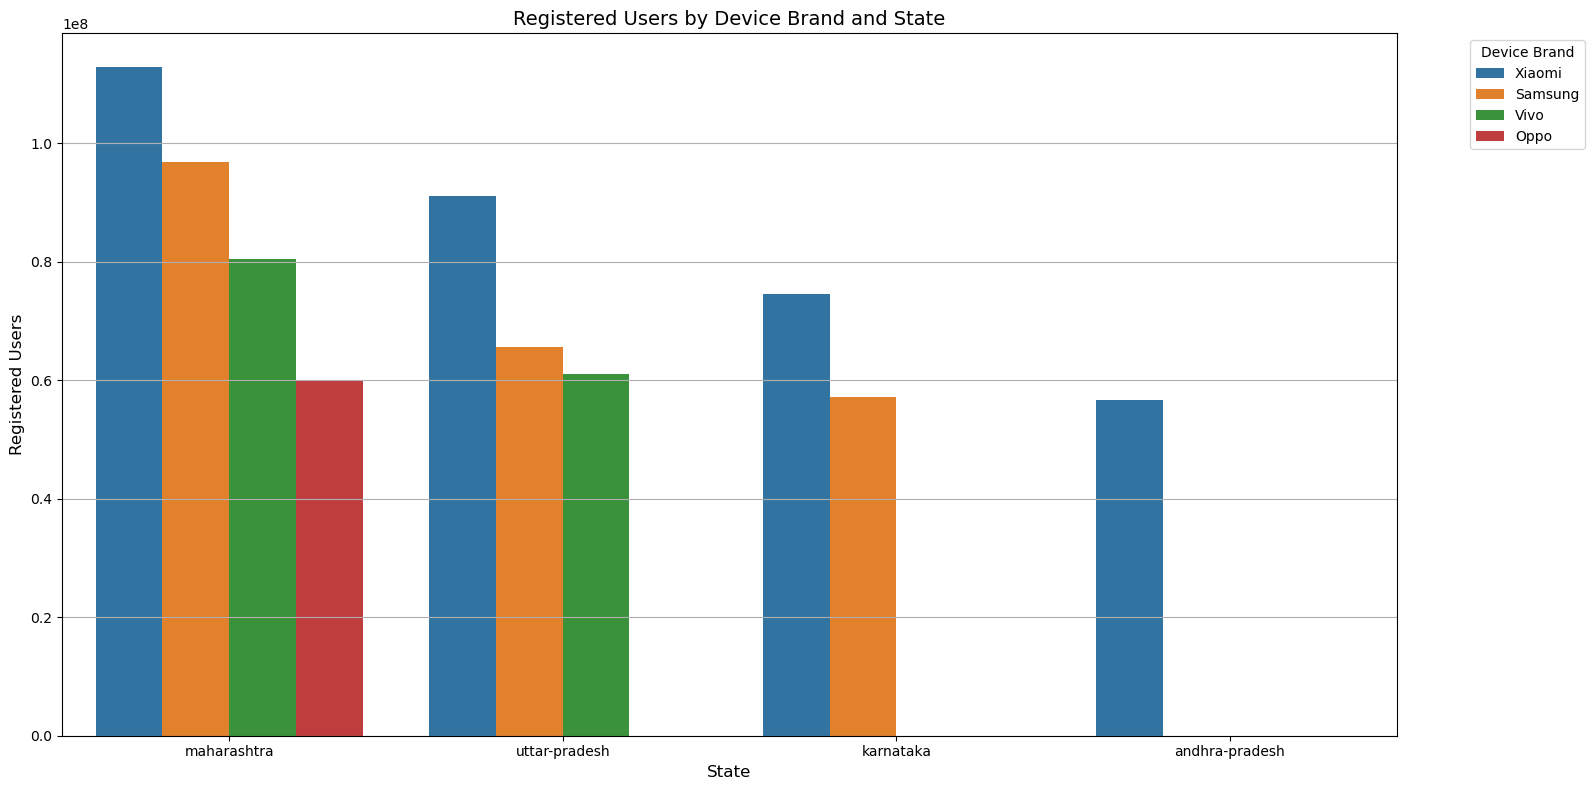

In [187]:

# Assume df is your DataFrame with columns: State, Brand, registeredUsers
plt.figure(figsize=(16, 8))
sns.barplot(
    data=TopDeviceBrandsByTotalRegisteredUser, 
    x='State', 
    y='total_registered_user', 
    hue='Brand',
    ci=None
)

plt.title("Registered Users by Device Brand and State", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("Registered Users", fontsize=12)
plt.legend(title='Device Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


# Usecase 3

## 3.1 Total Insurance Transactions per State

In [190]:
sql = """
SELECT 
    State,
    SUM(InsuranceCount) AS total_insurance_count,
    SUM(InsuranceAmount) AS total_insurance_amount
FROM aggregated_insurance
GROUP BY State
ORDER BY total_insurance_count DESC;
"""

curr.execute(sql)

In [191]:
TotalInsuranceTransactionsPerState = pd.DataFrame(curr.fetchall(), columns = ['State','total_insurance_count','total_insurance_amount'])

In [192]:
TotalInsuranceTransactionsPerState

State total_insurance_count  \
0                            karnataka               1957404   
1                          maharashtra               1815539   
2                           tamil-nadu               1215269   
3                        uttar-pradesh               1139153   
4                            telangana                894342   
5                          west-bengal                839715   
6                               kerala                824235   
7                       andhra-pradesh                697769   
8                                delhi                652514   
9                            rajasthan                639684   
10                             haryana                573738   
11                             gujarat                562595   
12                               bihar                536592   
13                      madhya-pradesh                487180   
14                              odisha                318769   
15                               assam                262818   
16                           jharkhand                260827   
17                        chhattisgarh                189517   
18                              punjab                180011   
19                         uttarakhand                124374   
20                     jammu-&-kashmir                 78375   
21                    himachal-pradesh                 61790   
22                                 goa                 59872   
23                          puducherry                 27940   
24                             tripura                 25192   
25                          chandigarh                 22079   
26  dadra-&-nagar-haveli-&-daman-&-diu                 13792   
27           andaman-&-nicobar-islands                 12997   
28                           meghalaya                 10461   
29                   arunachal-pradesh                 10214   
30                              sikkim                  4896   
31                            nagaland                  4745   
32                             manipur                  3731   
33                             mizoram                  3724   
34                              ladakh                  3338   
35                         lakshadweep                   496   

    total_insurance_amount  
0             2.743155e+09  
1             2.363129e+09  
2             1.555507e+09  
3             1.740346e+09  
4             1.171060e+09  
5             1.052463e+09  
6             1.313719e+09  
7             8.122230e+08  
8             8.153652e+08  
9             9.596539e+08  
10            8.309812e+08  
11            7.292334e+08  
12            6.710568e+08  
13            7.111535e+08  
14            4.165592e+08  
15            4.118310e+08  
16            3.486714e+08  
17            2.743449e+08  
18            3.130858e+08  
19            2.007066e+08  
20            1.539231e+08  
21            1.172891e+08  
22            8.373000e+07  
23            3.712085e+07  
24            3.374246e+07  
25            3.328588e+07  
26            1.799241e+07  
27            1.938679e+07  
28            2.035736e+07  
29            2.342076e+07  
30            1.088338e+07  
31            9.156617e+06  
32            7.150454e+06  
33            5.462592e+06  
34            7.808333e+06  
35            6.240370e+05

C:\Users\lap\AppData\Local\Temp\ipykernel_12928\1946779582.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


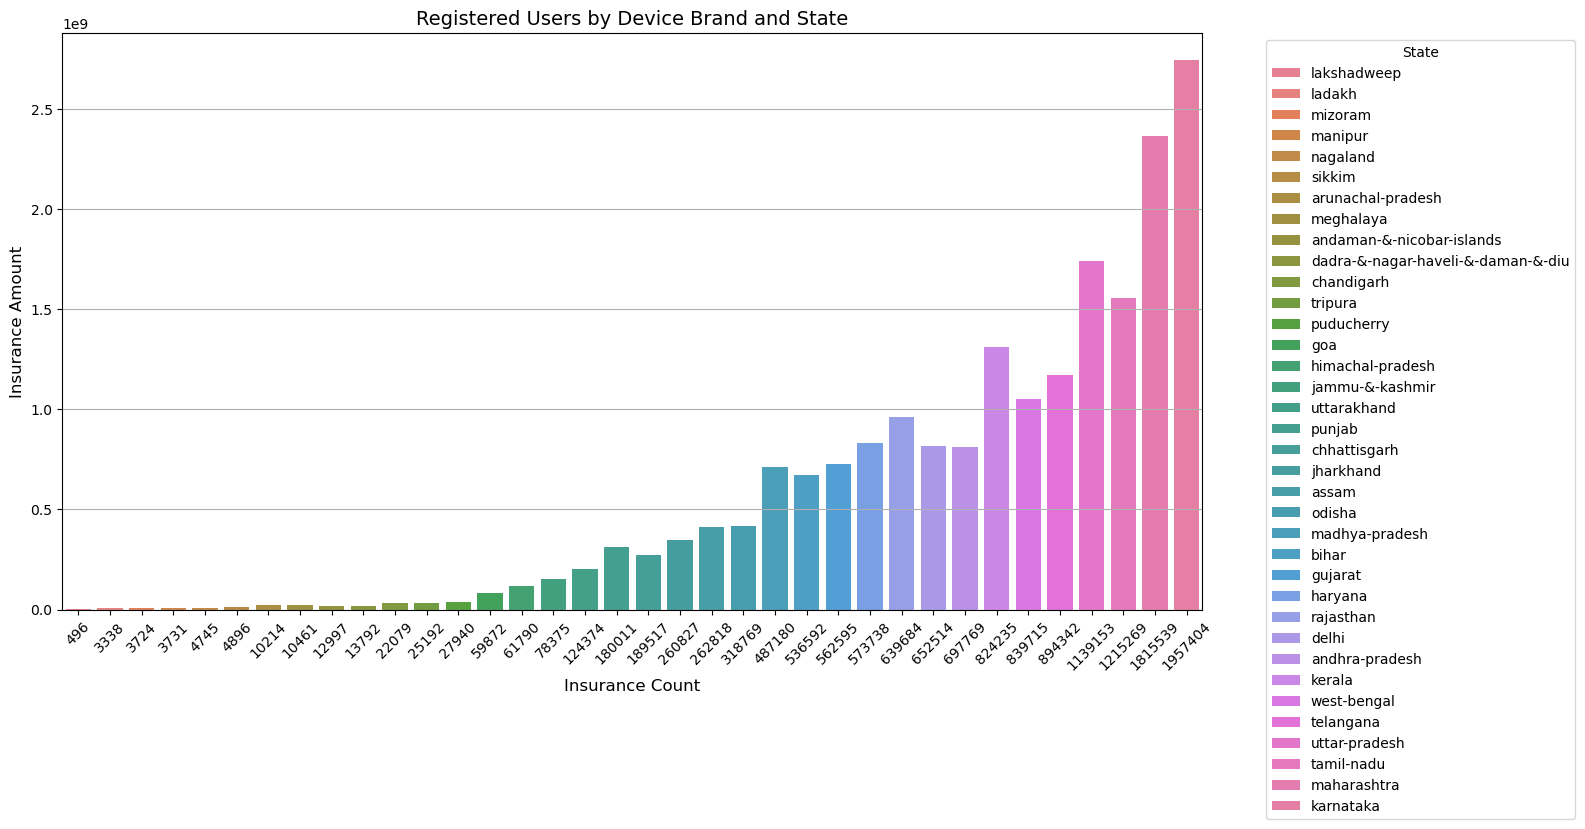

In [193]:

plt.figure(figsize=(16, 8))
sns.barplot(
    data=TotalInsuranceTransactionsPerState, 
    x='total_insurance_count', 
    y='total_insurance_amount', 
    hue='State',
    ci=None
)

plt.title("Registered Users by Device Brand and State", fontsize=14)
plt.xlabel("Insurance Count", fontsize=12)
plt.ylabel("Insurance Amount", fontsize=12)
plt.legend(title='State', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


## 3.2  Low Insurance Penetration States

In [195]:
sql = """
SELECT 
    au.State,
    SUM(au.UserCount) AS total_users,
    COALESCE(SUM(ai.InsuranceCount), 0) AS total_insurance_transactions
FROM aggregated_user au
LEFT JOIN aggregated_insurance ai
    ON au.State = ai.State AND au.Year = ai.Year AND au.Quarter = ai.Quarter
GROUP BY au.State
ORDER BY total_insurance_transactions ASC;
"""

curr.execute(sql)

In [196]:
LowInsuranceStates = pd.DataFrame(curr.fetchall(),columns=['State','total_users','total_insurance_transactions'])

In [197]:
LowInsuranceStates

State total_users  \
0                          lakshadweep       51138   
1                               ladakh      840584   
2                             nagaland     2218657   
3                              manipur     3479129   
4                              mizoram      929959   
5                               sikkim     1870915   
6                            meghalaya     2155644   
7                    arunachal-pradesh     2805570   
8            andaman-&-nicobar-islands      623446   
9   dadra-&-nagar-haveli-&-daman-&-diu     3896519   
10                          chandigarh     5335570   
11                             tripura     5299920   
12                          puducherry     4052989   
13                                 goa     6844584   
14                    himachal-pradesh    19411836   
15                     jammu-&-kashmir    14122428   
16                         uttarakhand    34161100   
17                              punjab    66429452   
18                        chhattisgarh    54136914   
19                               assam    39481411   
20                           jharkhand    64541996   
21                              odisha   114580607   
22                      madhya-pradesh   180662446   
23                             haryana   121872882   
24                               bihar   167266170   
25                             gujarat   180731308   
26                              kerala    76662576   
27                           rajasthan   215645588   
28                               delhi   133679039   
29                         west-bengal   206129775   
30                          tamil-nadu   193665028   
31                      andhra-pradesh   225414835   
32                           telangana   211907753   
33                       uttar-pradesh   355969633   
34                           karnataka   291372780   
35                         maharashtra   452075011   

   total_insurance_transactions  
0                          1196  
1                          8288  
2                         13465  
3                         13481  
4                         14264  
5                         14266  
6                         22761  
7                         26314  
8                         35877  
9                         46282  
10                        55329  
11                        59442  
12                        67750  
13                       154552  
14                       170870  
15                       195825  
16                       365844  
17                       518061  
18                       558407  
19                       676578  
20                       718637  
21                       962039  
22                      1502100  
23                      1591058  
24                      1637152  
25                      1705315  
26                      1807975  
27                      1907014  
28                      1995564  
29                      2350455  
30                      2811689  
31                      2969189  
32                      3192142  
33                      3323823  
34                      6046544  
35                      6867289

C:\Users\lap\AppData\Local\Temp\ipykernel_12928\2111305738.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


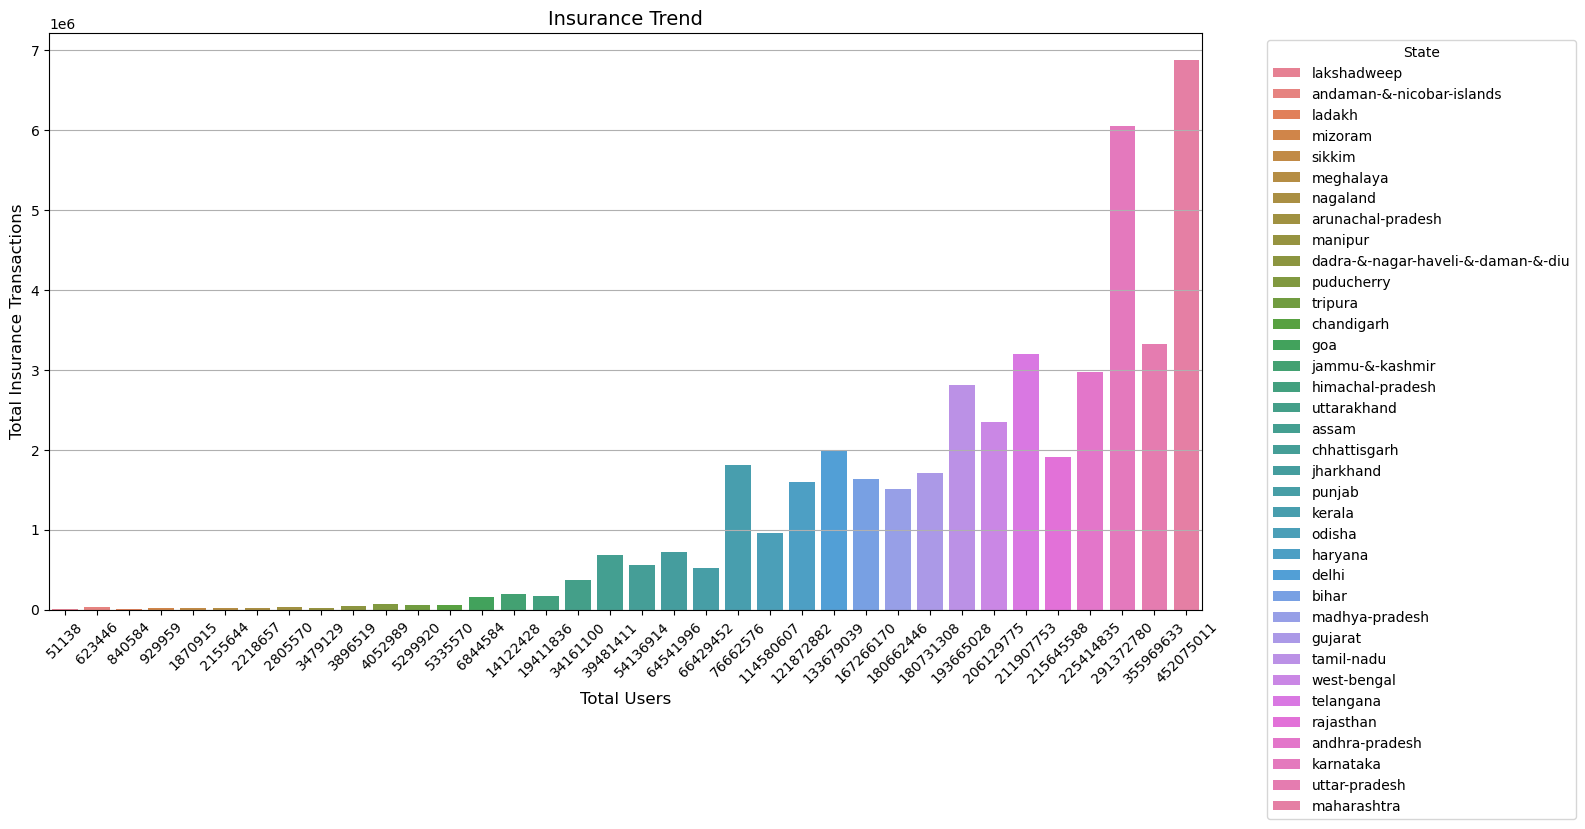

In [198]:

plt.figure(figsize=(16, 8))
sns.barplot(
    data=LowInsuranceStates, 
    x='total_users', 
    y='total_insurance_transactions', 
    hue='State',
    ci=None
)

plt.title("Insurance Trend", fontsize=14)
plt.xlabel("Total Users", fontsize=12)
plt.ylabel("Total Insurance Transactions", fontsize=12)
plt.legend(title='State', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


# Usecase 4

# Usecase 5

## 5.1 Which states have the highest number of registered users?

In [202]:
sql = """
SELECT 
    State,
    SUM(RegisteredUsers) AS total_registered_users
FROM map_user
GROUP BY State
ORDER BY total_registered_users DESC;
"""

curr.execute(sql)

In [203]:
MaximumRegisteredUserStateWise = pd.DataFrame(curr.fetchall(), columns = ['State','total_registered_users'])

In [204]:
MaximumRegisteredUserStateWise

State total_registered_users
0                          maharashtra             1140138243
1                        uttar-pradesh              942334146
2                            karnataka              733674236
3                       andhra-pradesh              556747126
4                            rajasthan              555774493
5                          west-bengal              524964358
6                            telangana              524620520
7                           tamil-nadu              506486772
8                       madhya-pradesh              470663624
9                              gujarat              459154666
10                               bihar              446115282
11                               delhi              324608095
12                             haryana              306022101
13                              odisha              290005345
14                              kerala              204758075
15                              punjab              171432251
16                           jharkhand              169283936
17                        chhattisgarh              142291017
18                               assam              111842317
19                         uttarakhand               86930925
20                    himachal-pradesh               49799825
21                     jammu-&-kashmir               40162530
22                                 goa               17437286
23                             tripura               13862627
24                          chandigarh               12855589
25                          puducherry               10407148
26  dadra-&-nagar-haveli-&-daman-&-diu               10080195
27                             manipur                9389131
28                   arunachal-pradesh                8046446
29                            nagaland                6297675
30                           meghalaya                6185282
31                              sikkim                4868004
32                             mizoram                2701061
33                              ladakh                2271369
34           andaman-&-nicobar-islands                1842465
35                         lakshadweep                 142697

C:\Users\lap\AppData\Local\Temp\ipykernel_12928\700676873.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


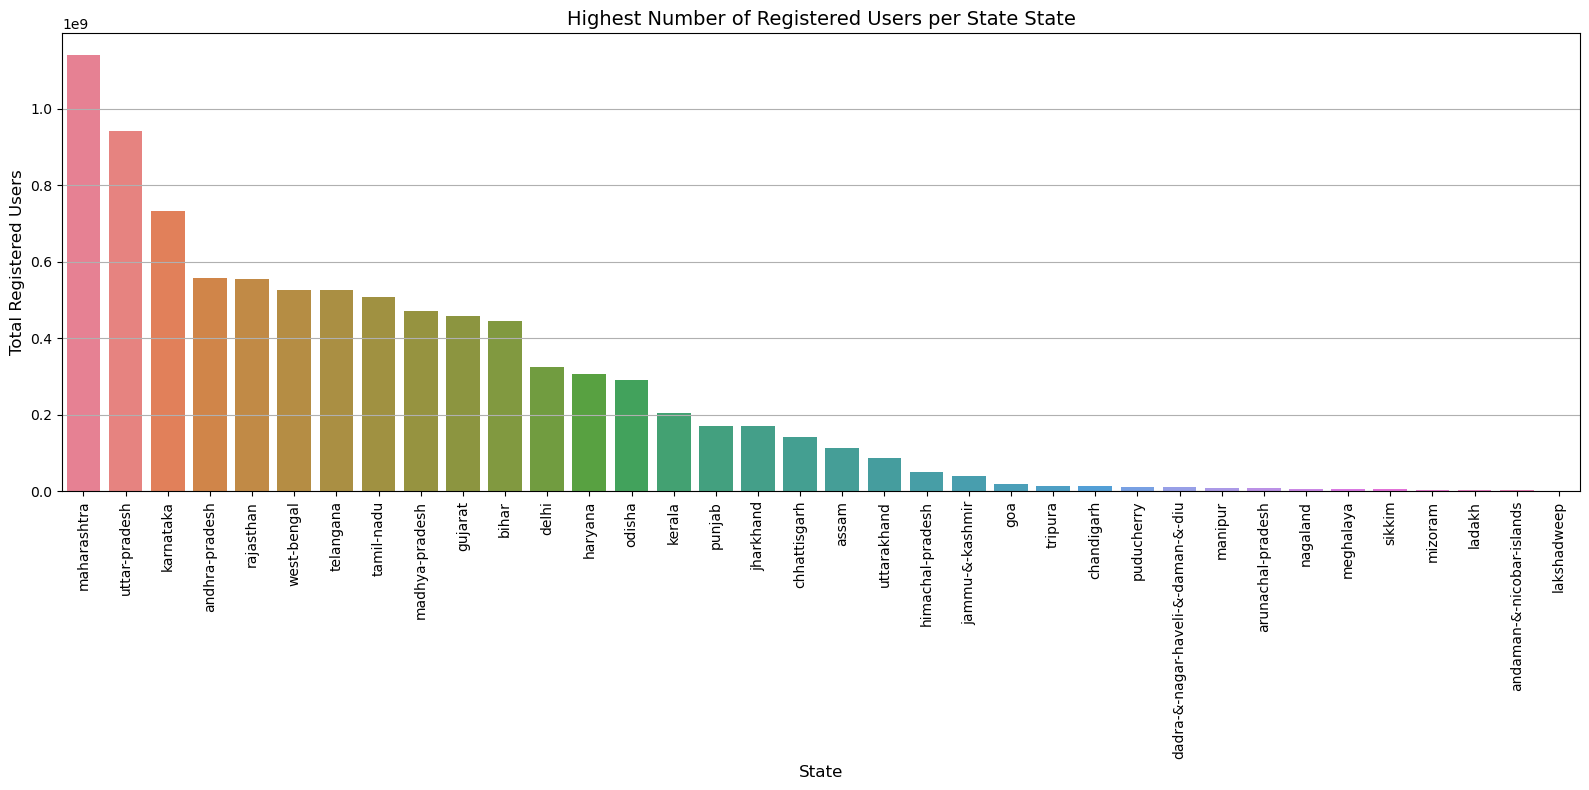

In [205]:

plt.figure(figsize=(16, 8))
sns.barplot(
    data=MaximumRegisteredUserStateWise, 
    x='State', 
    y='total_registered_users', 
    hue='State',
    ci=None
)

plt.title("Highest Number of Registered Users per State State", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("Total Registered Users", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


## 5.2 Which states or districts have high users but low engagement?

In [207]:
sql = """
SELECT 
    State,
    Brand,
    SUM(UserCount) AS total_users,
    AVG(Percentage) AS avg_engagement_percentage
FROM aggregated_user
GROUP BY State, Brand
ORDER BY total_users DESC;
"""

curr.execute(sql)

StateWithHighUserButLowEngagement = pd.DataFrame(curr.fetchall(), columns = ['State','Brand','total_users','avg_engagement_percentage']).head(10)
StateWithHighUserButLowEngagement


State    Brand total_users  avg_engagement_percentage
0     maharashtra   Xiaomi   112867939                   0.253975
1     maharashtra  Samsung    96805793                   0.217019
2   uttar-pradesh   Xiaomi    91026031                   0.257715
3     maharashtra     Vivo    80364873                   0.165524
4       karnataka   Xiaomi    74495837                   0.258140
5   uttar-pradesh  Samsung    65570247                   0.188566
6   uttar-pradesh     Vivo    61114756                   0.160201
7     maharashtra     Oppo    60017665                   0.126258
8       karnataka  Samsung    57223423                   0.198934
9  andhra-pradesh   Xiaomi    56579876                   0.252174

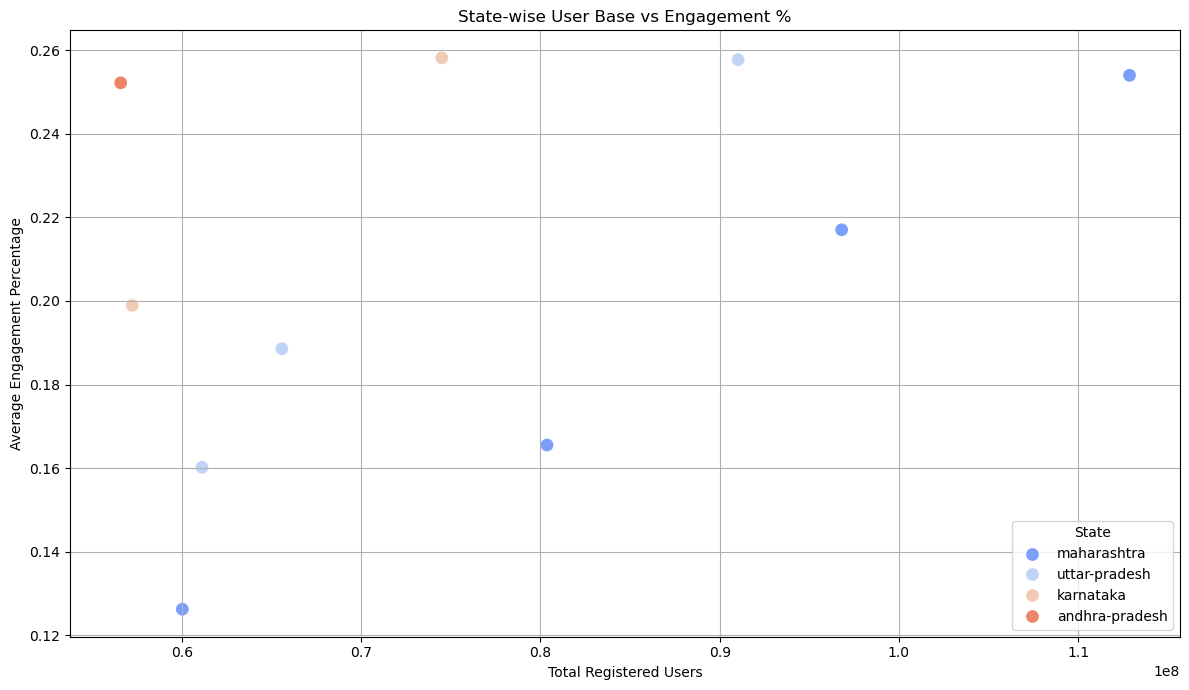

In [208]:
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=StateWithHighUserButLowEngagement,
    x='total_users',
    y='avg_engagement_percentage',
    hue='State',
    s=100,
    palette='coolwarm'
)

plt.title("State-wise User Base vs Engagement %")
plt.xlabel("Total Registered Users")
plt.ylabel("Average Engagement Percentage")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\lap\AppData\Local\Temp\ipykernel_12928\1368732652.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


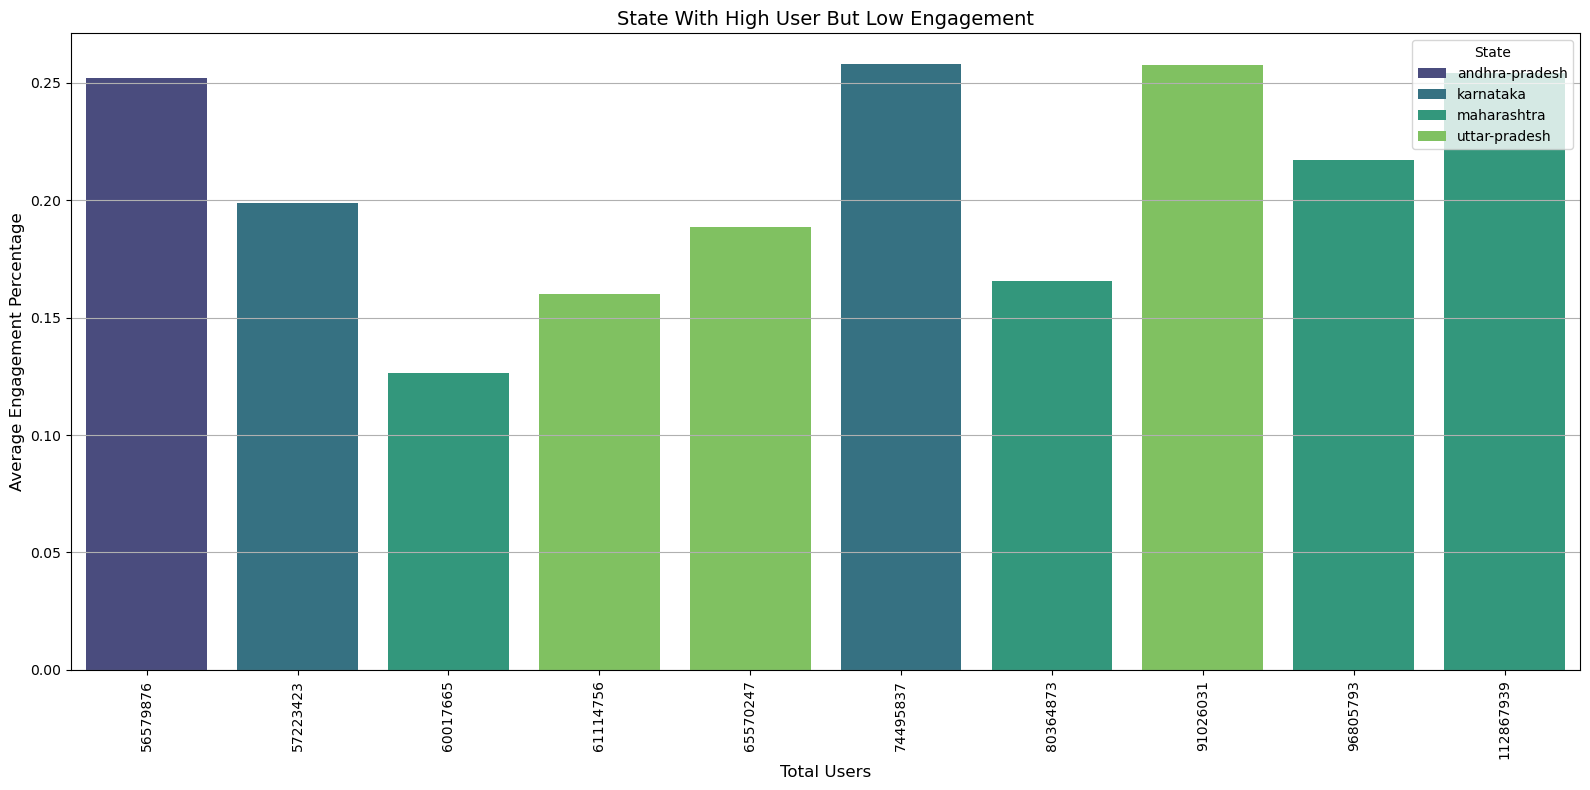

In [209]:

plt.figure(figsize=(16, 8))
sns.barplot(
    data=StateWithHighUserButLowEngagement.head(10), 
    x='total_users', 
    y='avg_engagement_percentage', 
    hue='State',
    palette='viridis',
    ci=None
)

plt.title("State With High User But Low Engagement", fontsize=14)
plt.xlabel("Total Users", fontsize=12)
plt.ylabel("Average Engagement Percentage", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


## 5.3 What is the brand-wise user engagement pattern across regions?

In [211]:
sql="""
SELECT 
    State,
    Brand,
    SUM(UserCount) AS total_users,
    AVG(Percentage) AS avg_engagement_percentage
FROM aggregated_user
GROUP BY State, Brand
ORDER BY State, total_users DESC;
"""
curr.execute(sql)
BrandWiseUserEngagementStateWise = pd.DataFrame(curr.fetchall(), columns=['State','Brand','total_users','avg_engagement_percentage'])
BrandWiseUserEngagementStateWise

State     Brand total_users  \
0    andaman-&-nicobar-islands    Xiaomi      148752   
1    andaman-&-nicobar-islands      Vivo      141104   
2    andaman-&-nicobar-islands   Samsung      114622   
3    andaman-&-nicobar-islands      Oppo       54448   
4    andaman-&-nicobar-islands    Others       47353   
..                         ...       ...         ...   
504                west-bengal  Micromax     1981032   
505                west-bengal     Apple      697651   
506                west-bengal   Infinix      539471   
507                west-bengal    Gionee      206751   
508                west-bengal      None           0   

     avg_engagement_percentage  
0                     0.240610  
1                     0.207831  
2                     0.189019  
3                     0.085990  
4                     0.082472  
..                         ...  
504                   0.017717  
505                   0.011727  
506                   0.012665  
507                   0.018511  
508                   0.000000  

[509 rows x 4 columns]

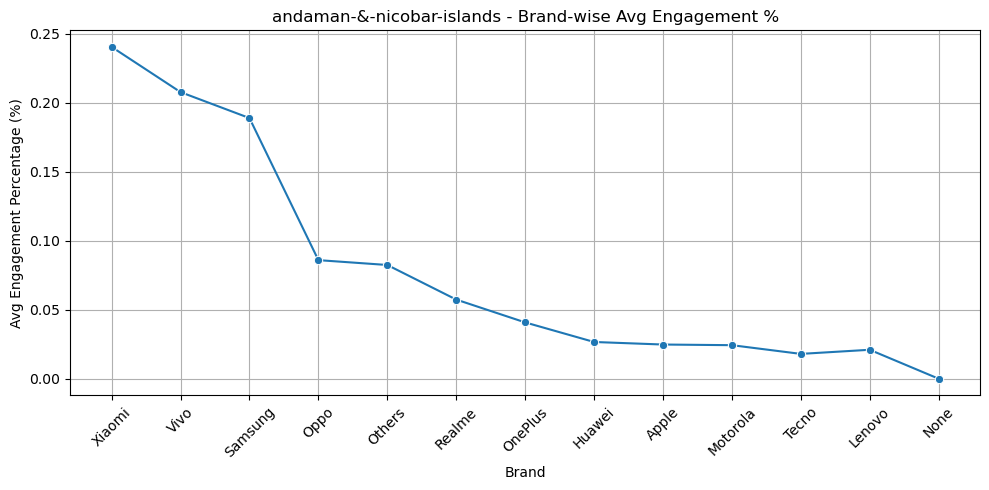

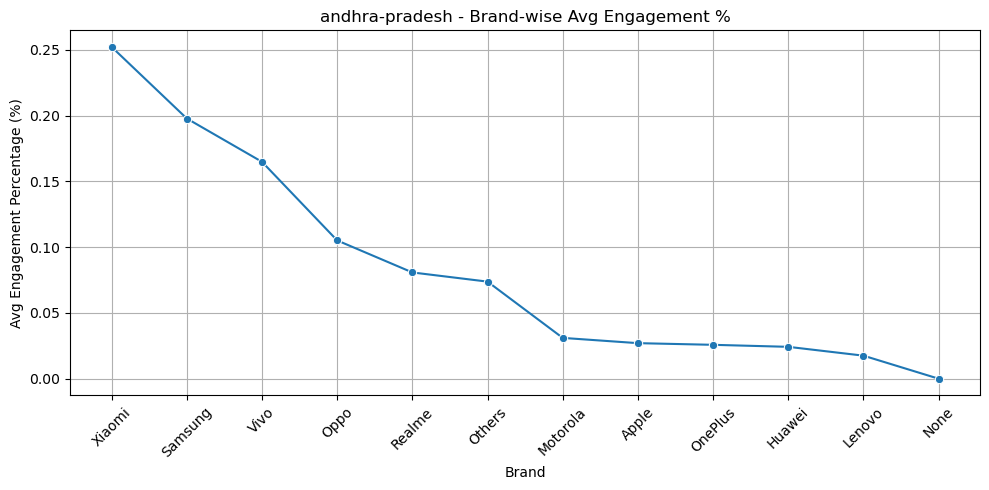

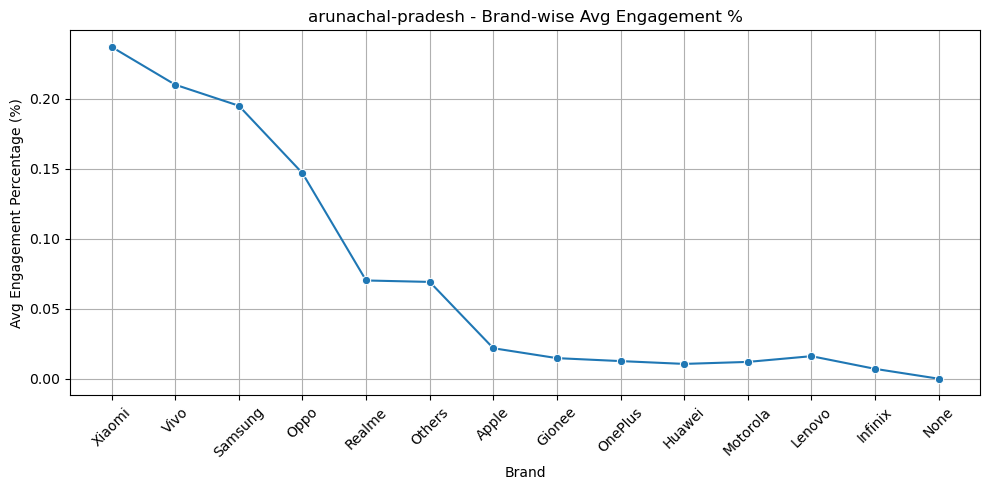

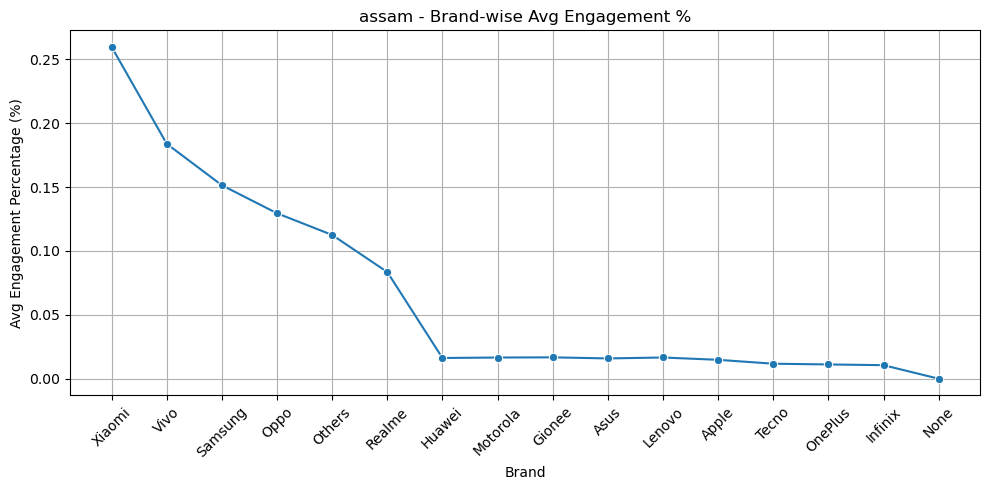

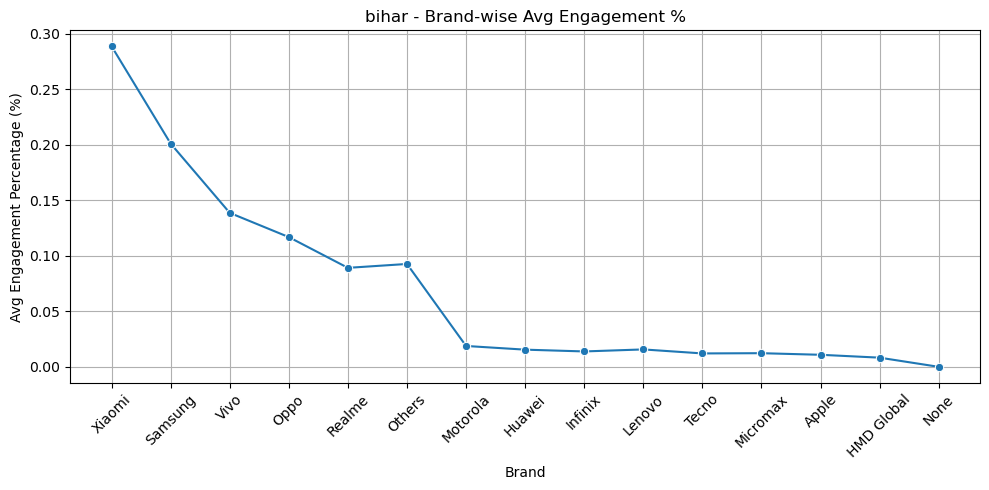

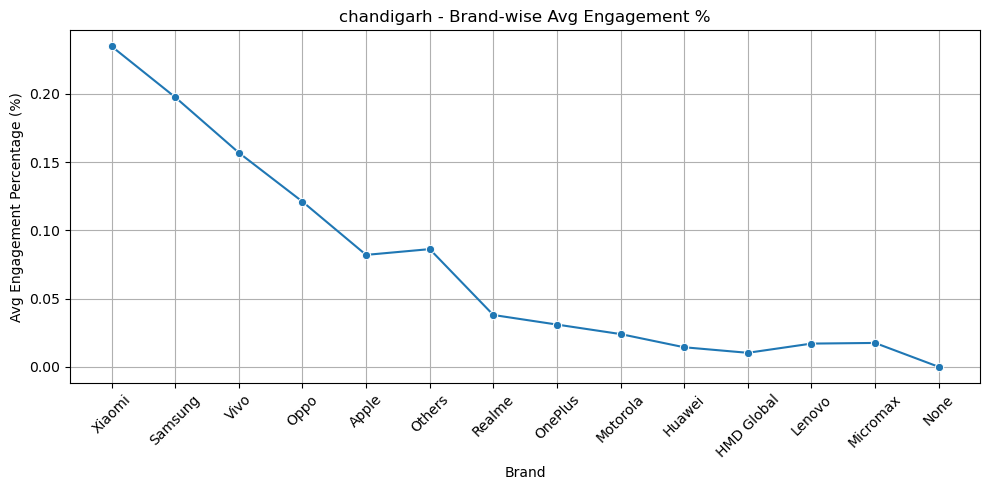

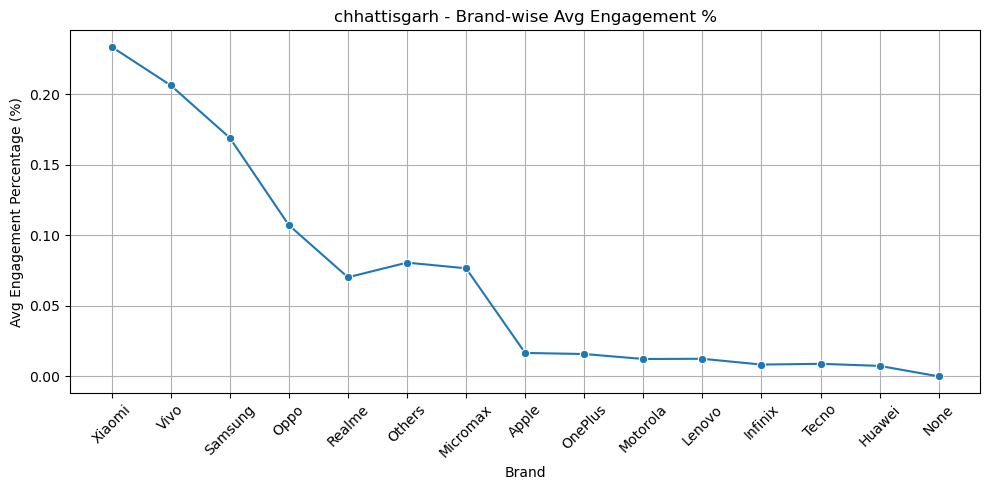

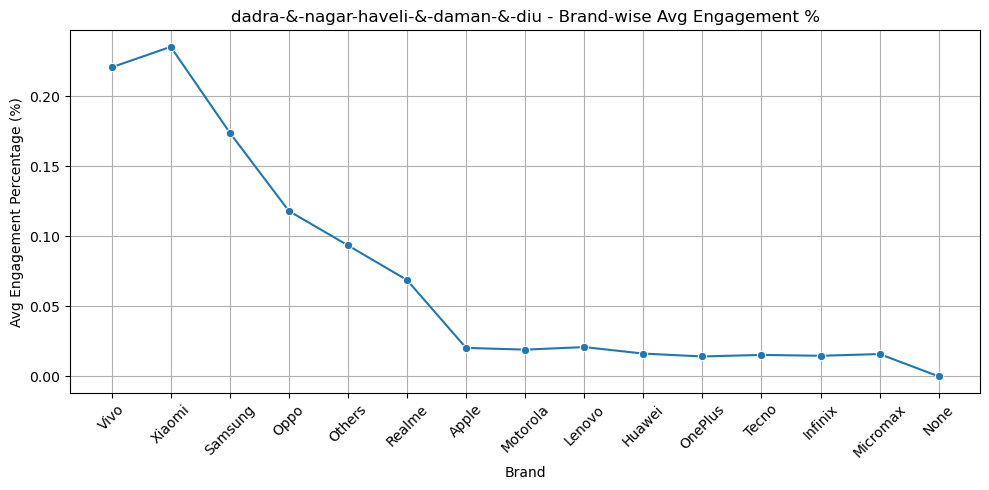

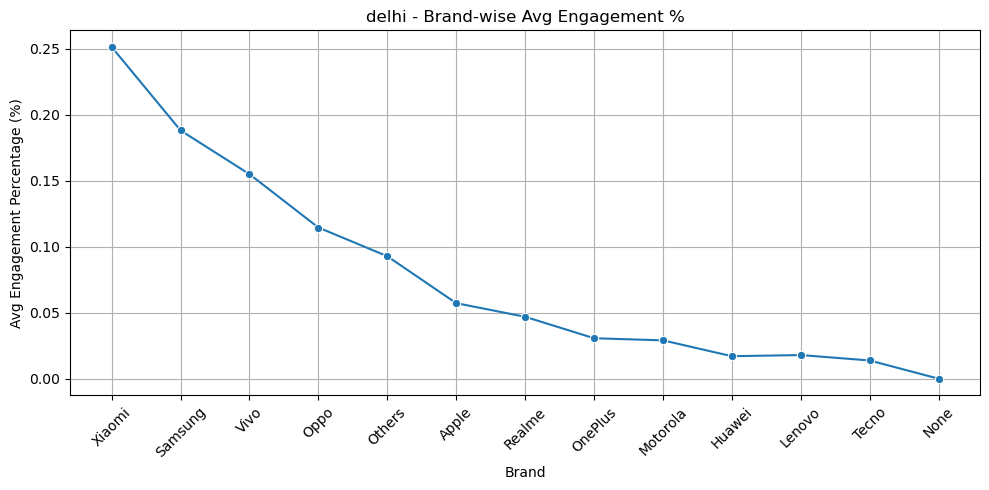

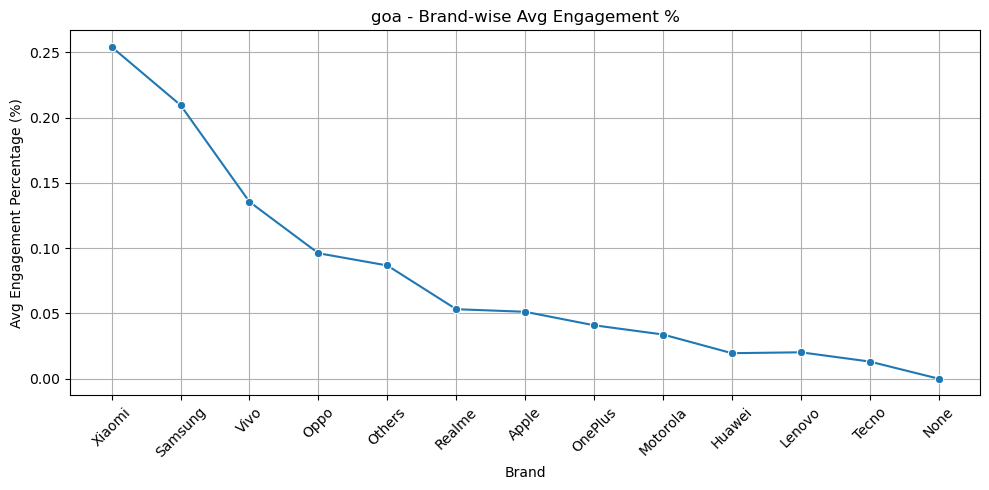

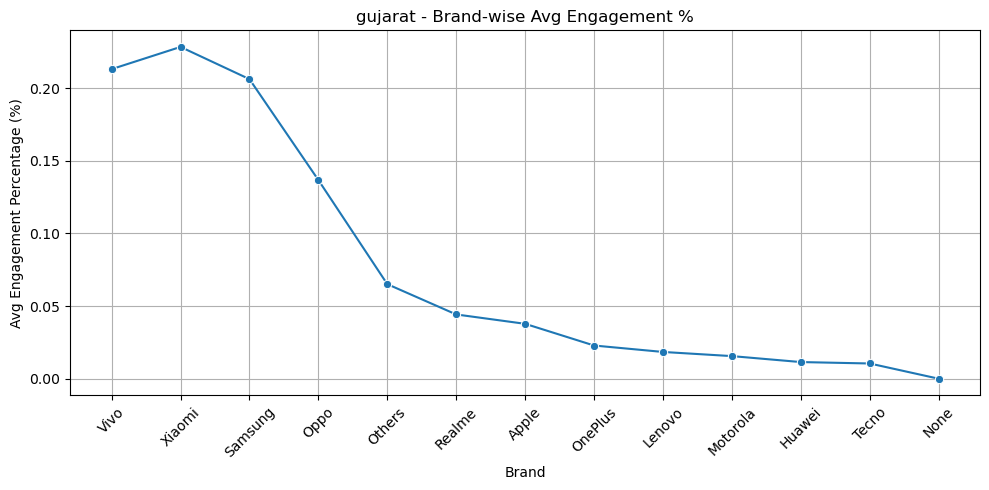

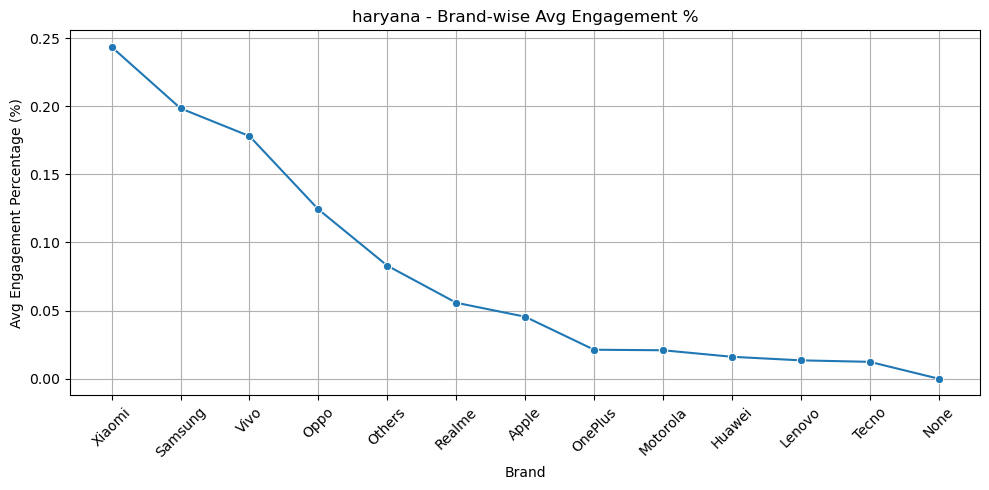

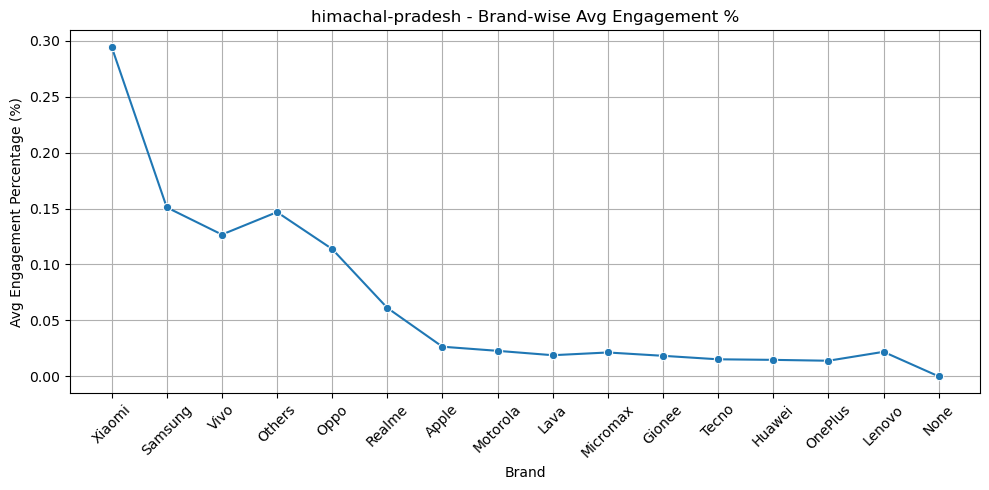

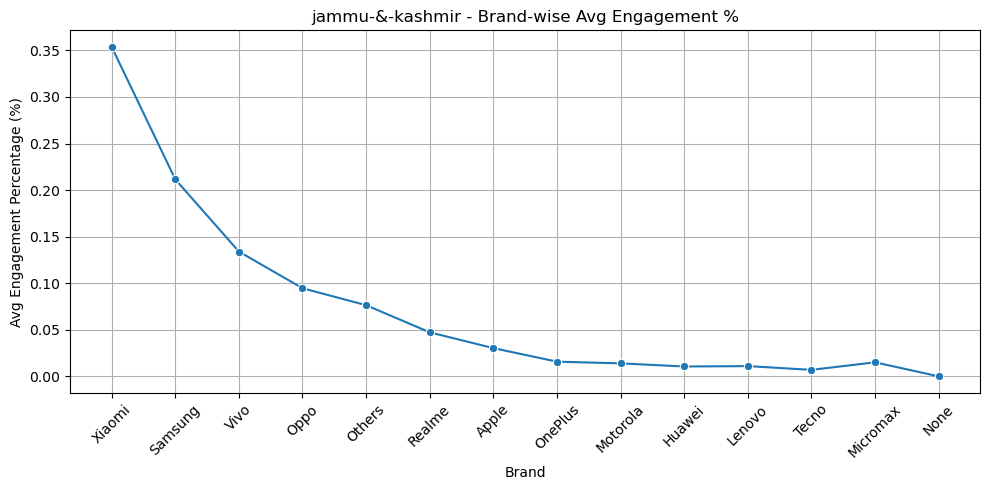

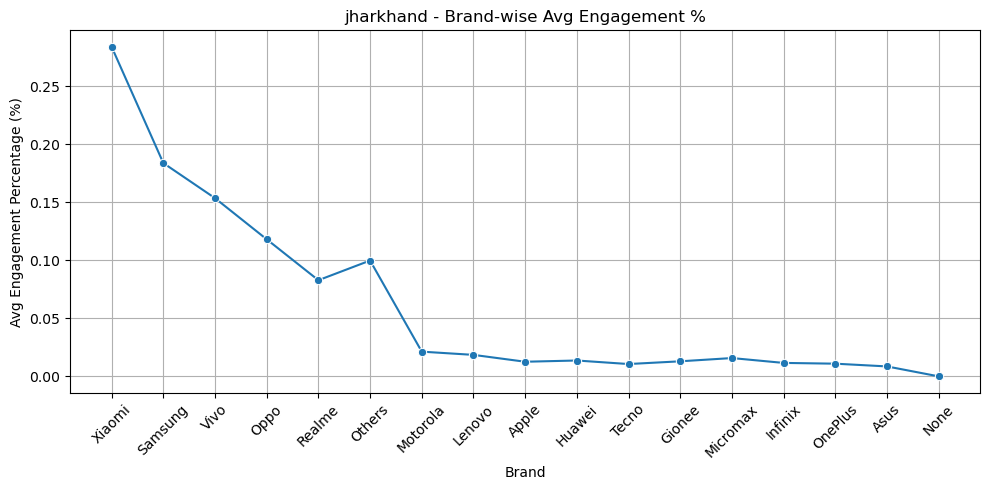

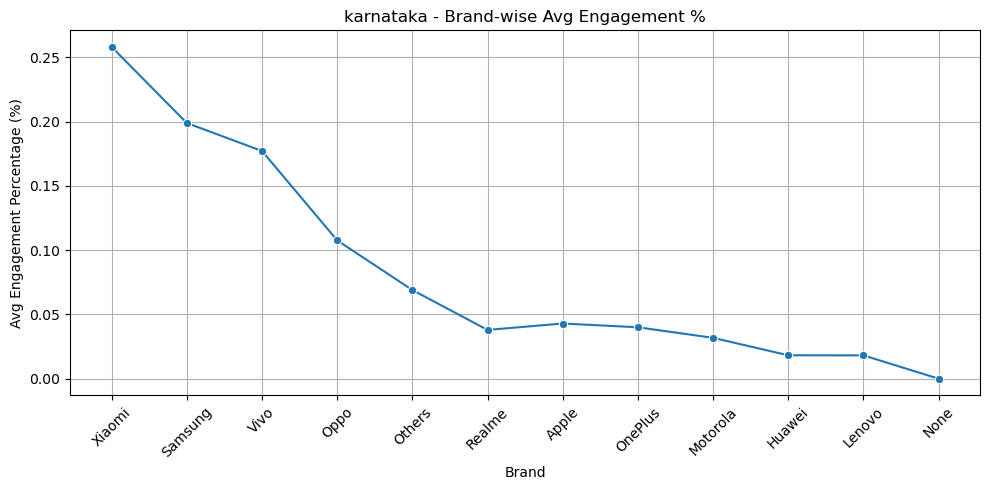

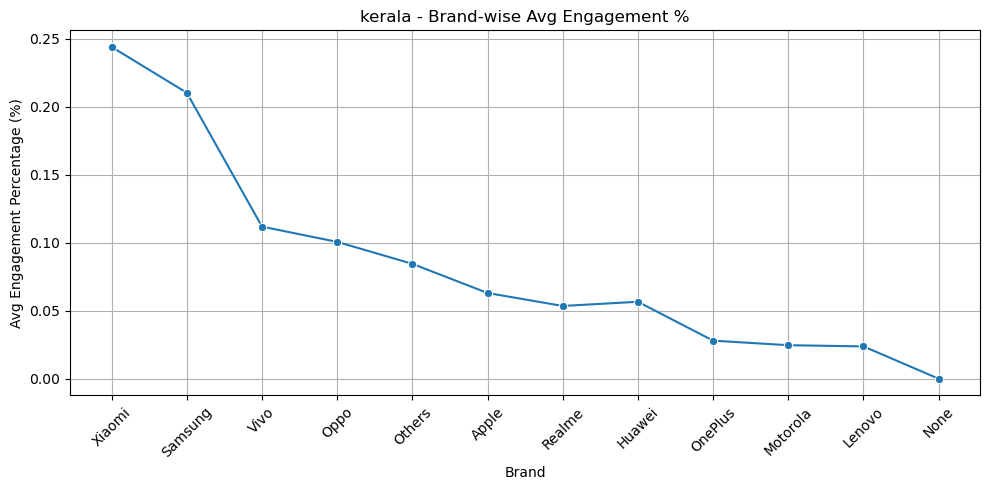

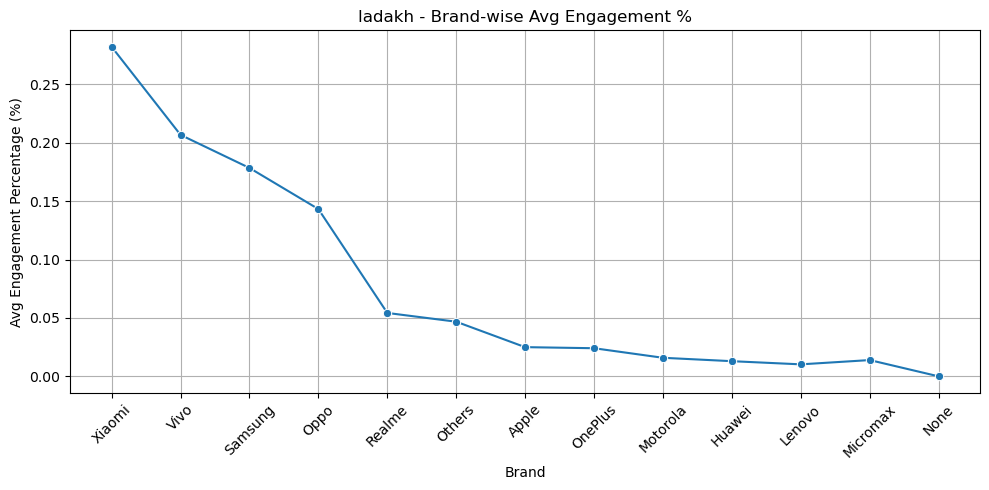

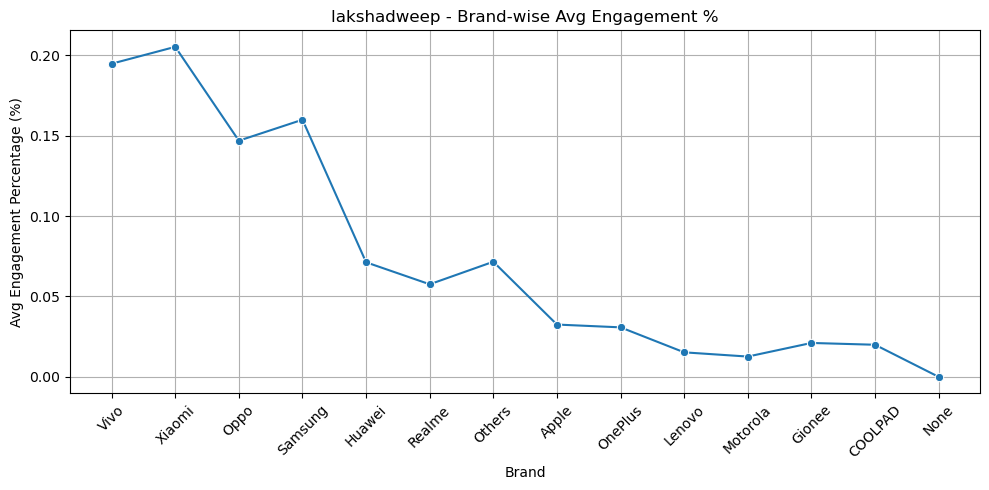

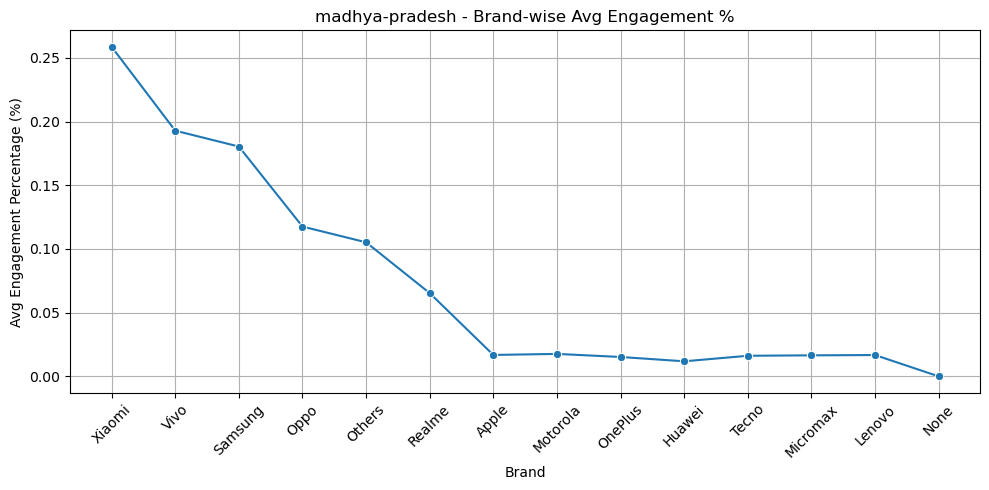

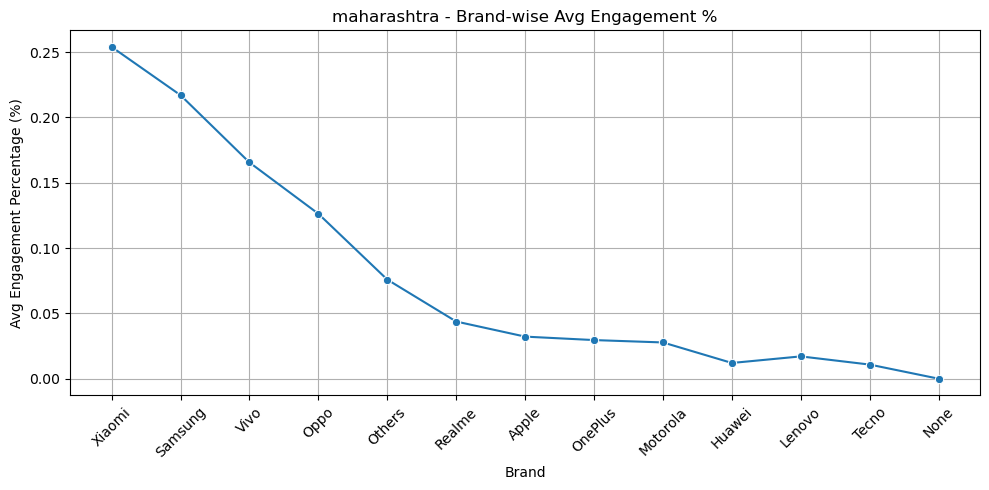

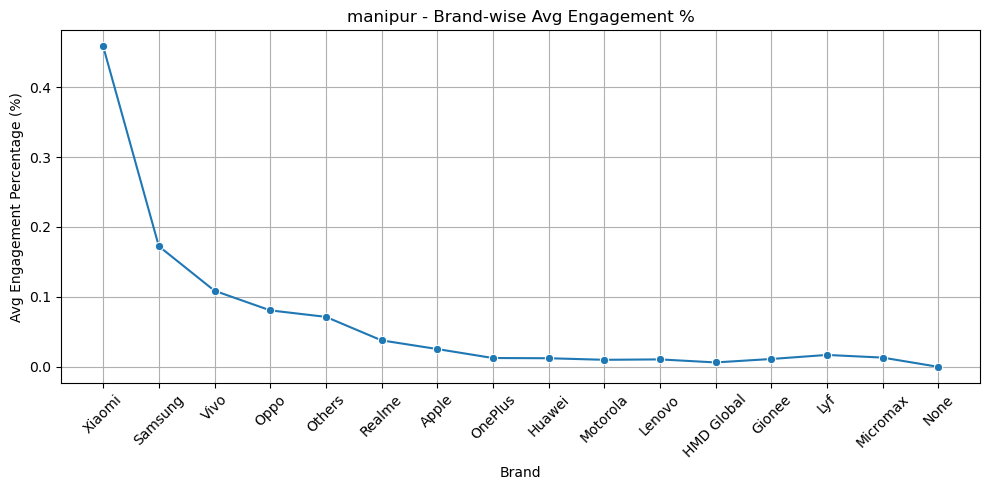

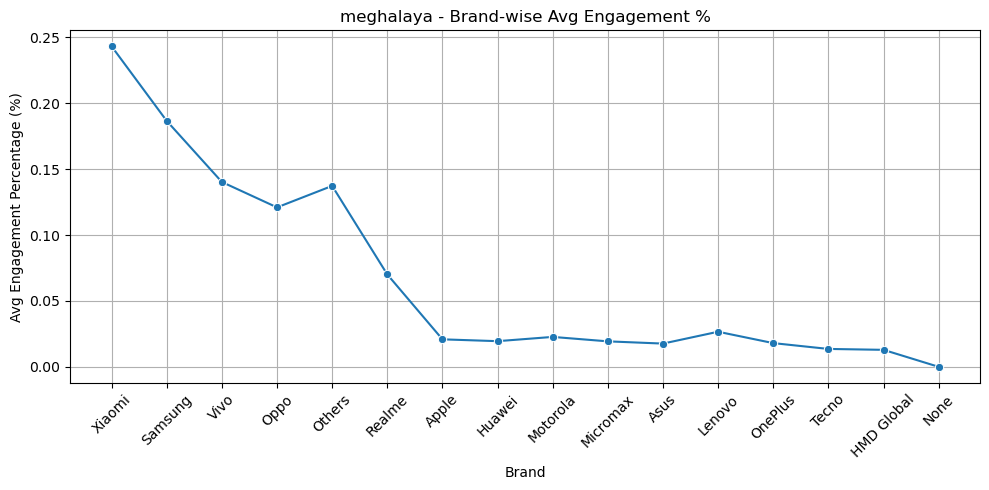

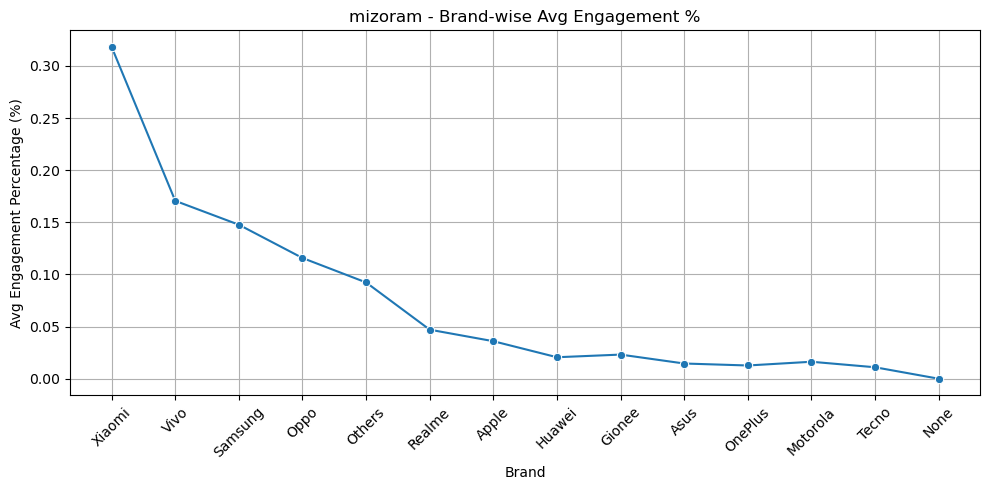

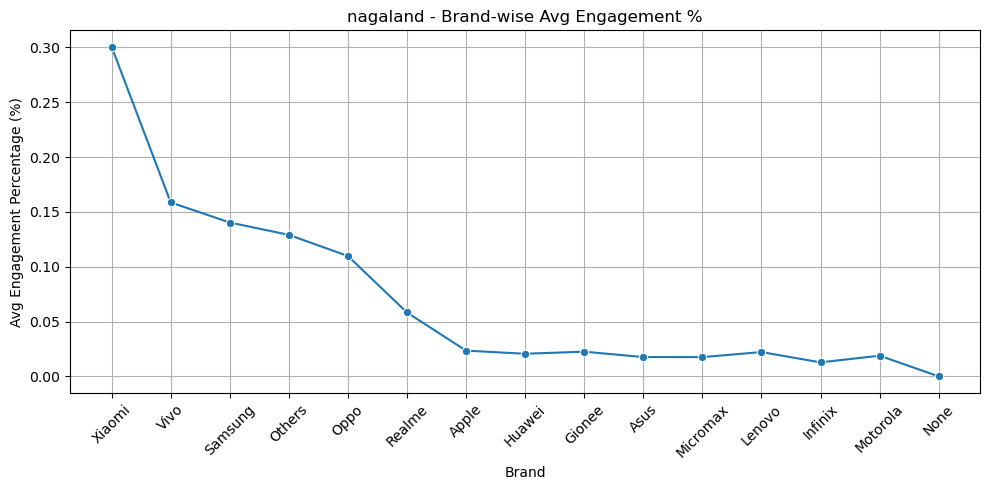

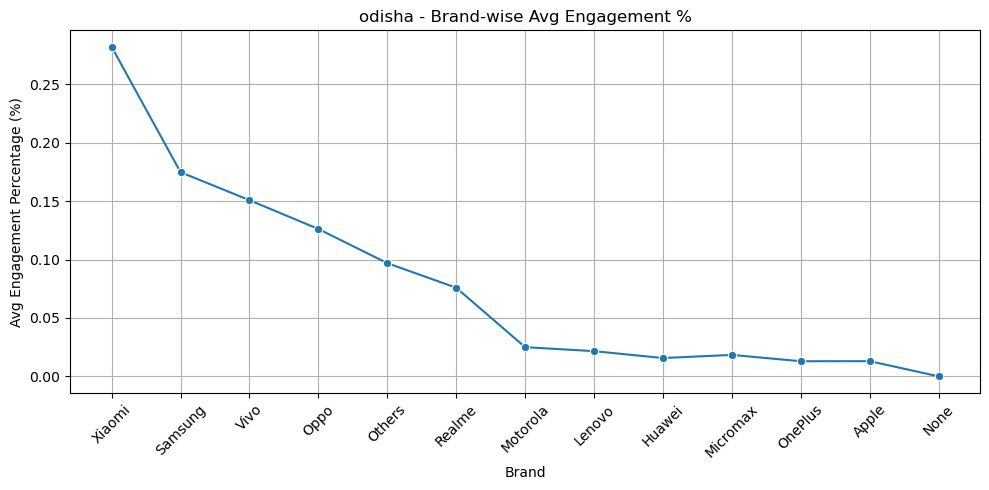

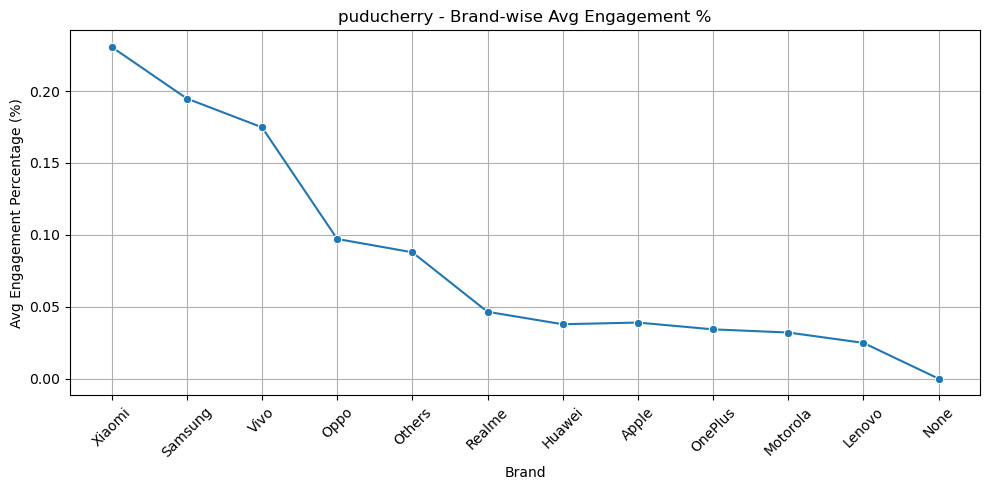

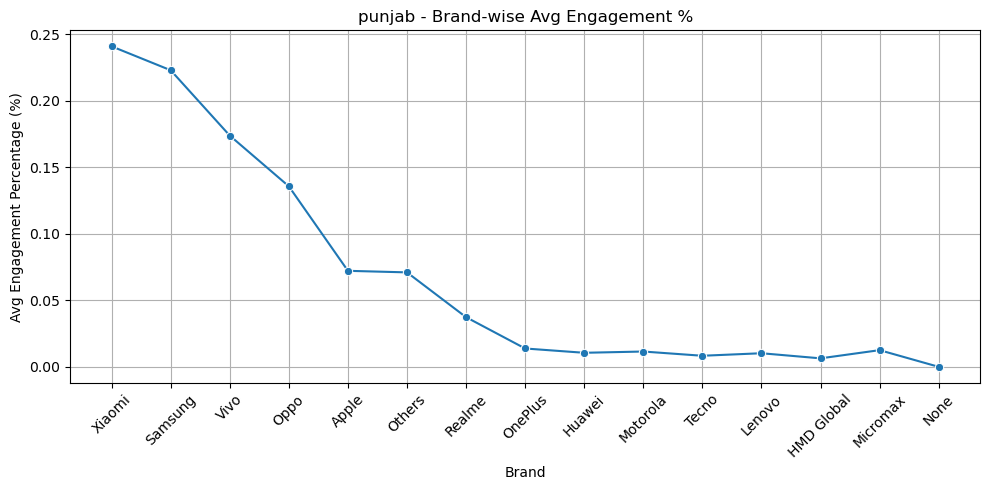

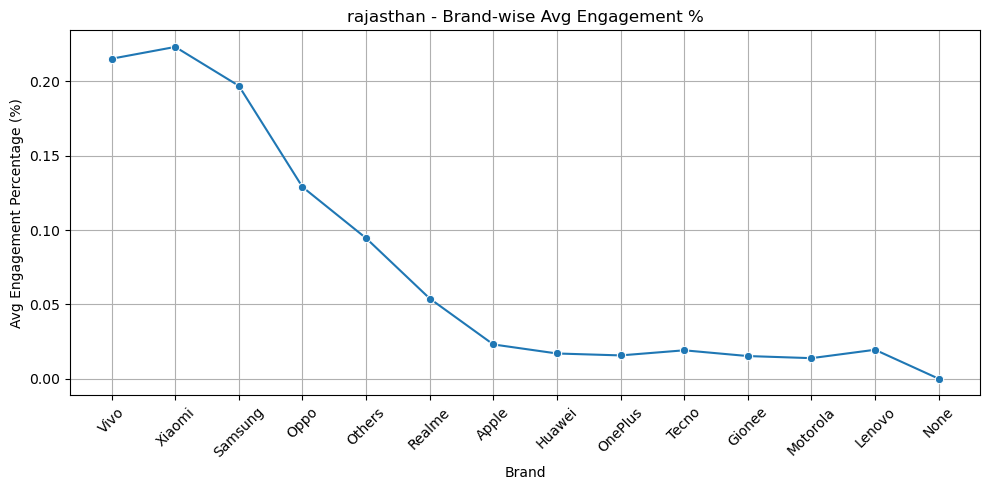

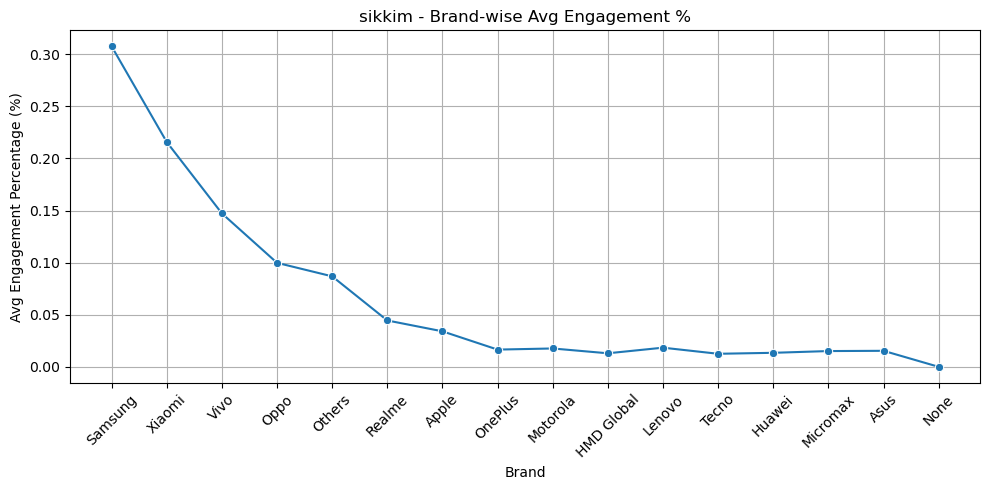

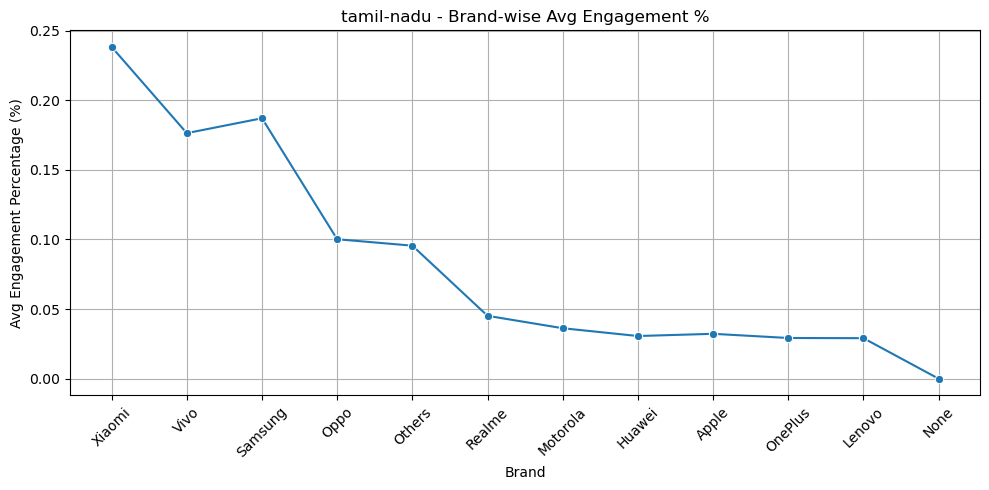

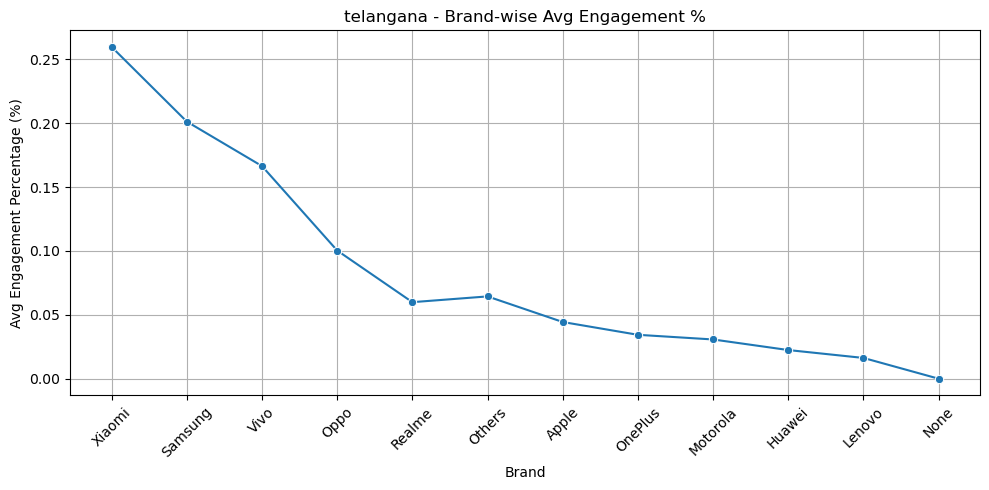

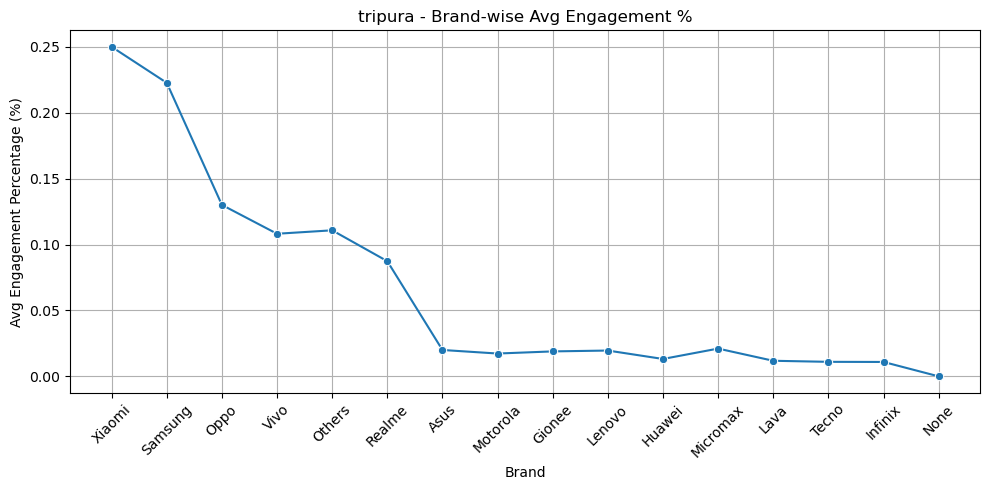

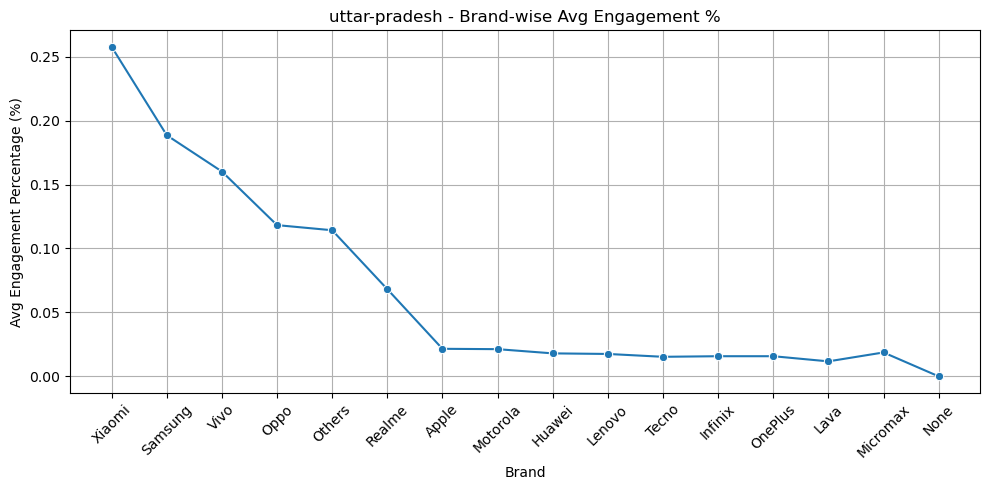

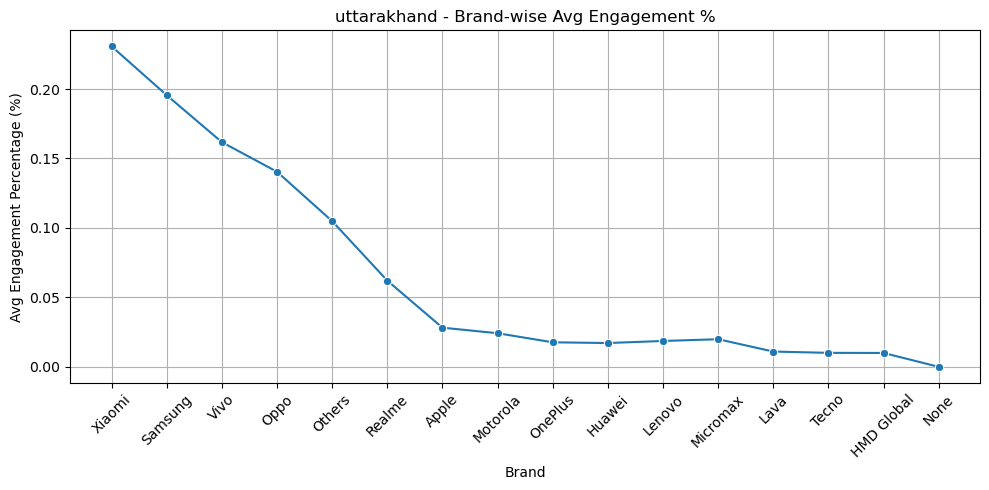

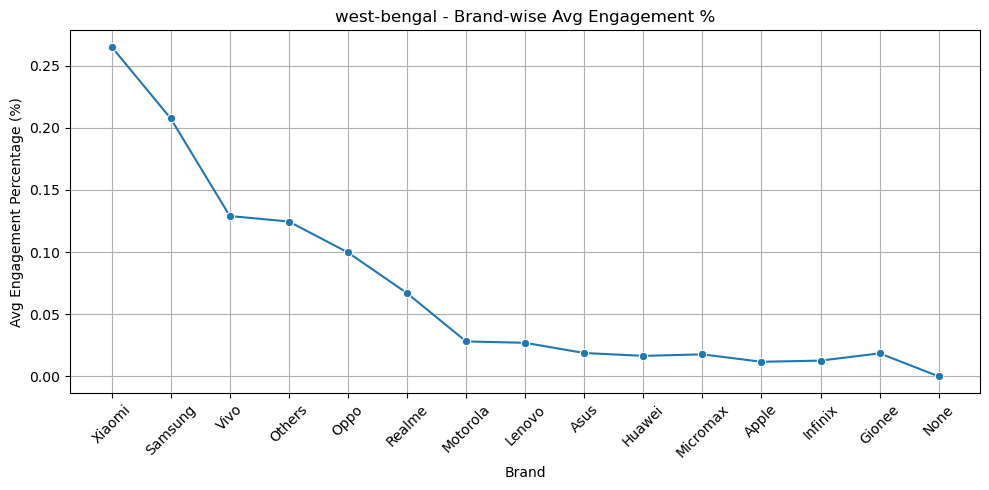

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through each state and plot brand engagement
for state in BrandWiseUserEngagementStateWise['State'].unique():
    state_data = BrandWiseUserEngagementStateWise[BrandWiseUserEngagementStateWise['State'] == state].copy()

    plt.figure(figsize=(10, 5))
    sns.lineplot(
        data=state_data,
        x='Brand',
        y='avg_engagement_percentage',
        marker='o'
    )
    plt.title(f"{state} - Brand-wise Avg Engagement %")
    plt.xlabel("Brand")
    plt.ylabel("Avg Engagement Percentage (%)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.show()


# Usecase 9

## 9.1 Underperforming States (Users vs Insurance)

In [215]:
sql="""
SELECT 
    au.State,
    SUM(au.UserCount) AS total_users,
    COALESCE(SUM(ai.InsuranceCount), 0) AS total_insurance_transactions
FROM aggregated_user au
LEFT JOIN aggregated_insurance ai
    ON au.State = ai.State AND au.Year = ai.Year AND au.Quarter = ai.Quarter
GROUP BY au.State
ORDER BY total_users DESC;
"""
curr.execute(sql)
UnderPerformingState = pd.DataFrame(curr.fetchall(), columns=['State','total_users','total_insurance_transactions'])
UnderPerformingState

State total_users  \
0                          maharashtra   452075011   
1                        uttar-pradesh   355969633   
2                            karnataka   291372780   
3                       andhra-pradesh   225414835   
4                            rajasthan   215645588   
5                            telangana   211907753   
6                          west-bengal   206129775   
7                           tamil-nadu   193665028   
8                              gujarat   180731308   
9                       madhya-pradesh   180662446   
10                               bihar   167266170   
11                               delhi   133679039   
12                             haryana   121872882   
13                              odisha   114580607   
14                              kerala    76662576   
15                              punjab    66429452   
16                           jharkhand    64541996   
17                        chhattisgarh    54136914   
18                               assam    39481411   
19                         uttarakhand    34161100   
20                    himachal-pradesh    19411836   
21                     jammu-&-kashmir    14122428   
22                                 goa     6844584   
23                          chandigarh     5335570   
24                             tripura     5299920   
25                          puducherry     4052989   
26  dadra-&-nagar-haveli-&-daman-&-diu     3896519   
27                             manipur     3479129   
28                   arunachal-pradesh     2805570   
29                            nagaland     2218657   
30                           meghalaya     2155644   
31                              sikkim     1870915   
32                             mizoram      929959   
33                              ladakh      840584   
34           andaman-&-nicobar-islands      623446   
35                         lakshadweep       51138   

   total_insurance_transactions  
0                       6867289  
1                       3323823  
2                       6046544  
3                       2969189  
4                       1907014  
5                       3192142  
6                       2350455  
7                       2811689  
8                       1705315  
9                       1502100  
10                      1637152  
11                      1995564  
12                      1591058  
13                       962039  
14                      1807975  
15                       518061  
16                       718637  
17                       558407  
18                       676578  
19                       365844  
20                       170870  
21                       195825  
22                       154552  
23                        55329  
24                        59442  
25                        67750  
26                        46282  
27                        13481  
28                        26314  
29                        13465  
30                        22761  
31                        14266  
32                        14264  
33                         8288  
34                        35877  
35                         1196

C:\Users\lap\AppData\Local\Temp\ipykernel_12928\3824492268.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


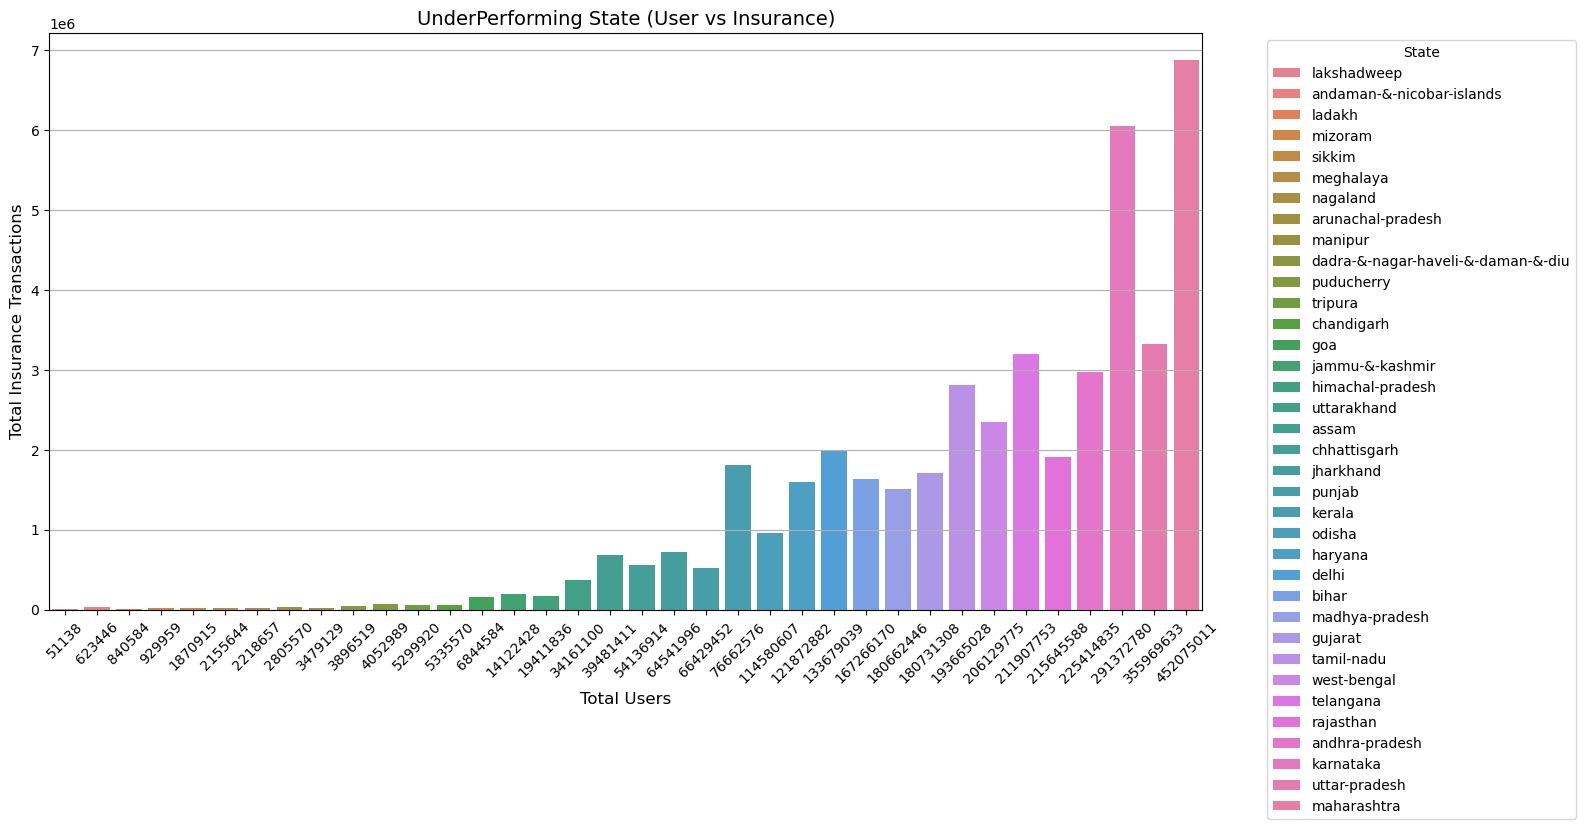

In [216]:

plt.figure(figsize=(16, 8))
sns.barplot(
    data=UnderPerformingState, 
    x='total_users', 
    y='total_insurance_transactions', 
    hue='State',
    ci=None
)

plt.title("UnderPerforming State (User vs Insurance)", fontsize=14)
plt.xlabel("Total Users", fontsize=12)
plt.ylabel("Total Insurance Transactions", fontsize=12)
plt.legend(title='State', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


# Usecase 8

## 8.1 Top States by Registered Users

In [219]:
sql="""
SELECT 
    au.State,
    SUM(au.UserCount) AS total_users,
    COALESCE(SUM(ai.InsuranceCount), 0) AS total_insurance_transactions
FROM aggregated_user au
LEFT JOIN aggregated_insurance ai
    ON au.State = ai.State AND au.Year = ai.Year AND au.Quarter = ai.Quarter
GROUP BY au.State
ORDER BY total_users DESC;
"""
curr.execute(sql)
UnderPerformingState = pd.DataFrame(curr.fetchall(), columns=['State','total_users','total_insurance_transactions'])
UnderPerformingState

State total_users  \
0                          maharashtra   452075011   
1                        uttar-pradesh   355969633   
2                            karnataka   291372780   
3                       andhra-pradesh   225414835   
4                            rajasthan   215645588   
5                            telangana   211907753   
6                          west-bengal   206129775   
7                           tamil-nadu   193665028   
8                              gujarat   180731308   
9                       madhya-pradesh   180662446   
10                               bihar   167266170   
11                               delhi   133679039   
12                             haryana   121872882   
13                              odisha   114580607   
14                              kerala    76662576   
15                              punjab    66429452   
16                           jharkhand    64541996   
17                        chhattisgarh    54136914   
18                               assam    39481411   
19                         uttarakhand    34161100   
20                    himachal-pradesh    19411836   
21                     jammu-&-kashmir    14122428   
22                                 goa     6844584   
23                          chandigarh     5335570   
24                             tripura     5299920   
25                          puducherry     4052989   
26  dadra-&-nagar-haveli-&-daman-&-diu     3896519   
27                             manipur     3479129   
28                   arunachal-pradesh     2805570   
29                            nagaland     2218657   
30                           meghalaya     2155644   
31                              sikkim     1870915   
32                             mizoram      929959   
33                              ladakh      840584   
34           andaman-&-nicobar-islands      623446   
35                         lakshadweep       51138   

   total_insurance_transactions  
0                       6867289  
1                       3323823  
2                       6046544  
3                       2969189  
4                       1907014  
5                       3192142  
6                       2350455  
7                       2811689  
8                       1705315  
9                       1502100  
10                      1637152  
11                      1995564  
12                      1591058  
13                       962039  
14                      1807975  
15                       518061  
16                       718637  
17                       558407  
18                       676578  
19                       365844  
20                       170870  
21                       195825  
22                       154552  
23                        55329  
24                        59442  
25                        67750  
26                        46282  
27                        13481  
28                        26314  
29                        13465  
30                        22761  
31                        14266  
32                        14264  
33                         8288  
34                        35877  
35                         1196